In [ ]:
run_gridsearch = False
hyperparam_csv_file = "guerneville_hourly_hyperparams.csv"

In [1]:
import sys
import os
import itertools
import pandas as pd
current_dir = os.getcwd()
print(current_dir)

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all


In [2]:
library_path = os.path.join('..', '..', '..','..','UCB-USACE-LSTMs')
sys.path.insert(0, library_path)
print(sys.path)

['../../../../UCB-USACE-LSTMs', '/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all', '/Users/canruso/Desktop', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python310.zip', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10/lib-dynload', '', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10/site-packages', '/Users/canruso/miniforge3/envs/ESDL_LSTM/lib/python3.10/site-packages/setuptools/_vendor']


In [3]:
from pathlib import Path
from neuralhydrology.evaluation.metrics import *
from UCB_training.UCB_train import UCB_trainer
from UCB_training.UCB_utils import combinedPlot
from UCB_training.UCB_utils import fancyCombinedPlot

In [4]:
current_path = os.getcwd()
library_path = current_path.split('UCB-USACE-LSTMs')[0] + 'UCB-USACE-LSTMs'

target_path = os.path.join(library_path, 'UCB_training', 'models', 'guerneville_all')

if os.path.exists(target_path):
    os.chdir(target_path)
    print("Current Working Directory:", os.getcwd())
    print("Train Basin File Exists:", os.path.exists("guerneville")) 
else:
    print(f"Error: The target path '{target_path}' does not exist.")

Current Working Directory: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all
Train Basin File Exists: True


In [5]:
path_to_csv = Path(library_path +'/russian_river_data')
path_to_yaml = Path("guerneville_gage_nlayer.yaml")
path_to_physics_data = Path(library_path + "/russian_river_data/Guerneville_hourly.csv")

In [6]:
features_with_physics = [
    "BIG SULPHUR CR ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "DRY CREEK 10 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "EF RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "GREEN VALLEY ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "LAGUNA ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 30 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 40 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 50 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 60 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "RUSSIAN 70 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "SANTA ROSA CR 10 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "SANTA ROSA CR 20 ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "WF RUSSIAN ET-POTENTIAL RUN:BASIN AVERAGE 60 YR",
    "BIG SULPHUR CR PRECIP-INC SCREENED",
    "DRY CREEK 10 PRECIP-INC SCREENED",
    "EF RUSSIAN 20 PRECIP-INC SCREENED",
    "GREEN VALLEY PRECIP-INC SCREENED",
    "LAGUNA PRECIP-INC SCREENED",
    "RUSSIAN 20 PRECIP-INC SCREENED",
    "RUSSIAN 30 PRECIP-INC SCREENED",
    "RUSSIAN 40 PRECIP-INC SCREENED",
    "RUSSIAN 50 PRECIP-INC SCREENED",
    "RUSSIAN 60 PRECIP-INC SCREENED",
    "RUSSIAN 70 PRECIP-INC SCREENED",
    "SANTA ROSA CR 10 PRECIP-INC SCREENED",
    "SANTA ROSA CR 20 PRECIP-INC SCREENED",
    "WF RUSSIAN PRECIP-INC SCREENED",
    "UKIAH CA HUMIDITY USAF-NOAA",
    "UKIAH CA SOLAR RADIATION USAF-NOAA",
    "UKIAH CA TEMPERATURE USAF-NOAA",
    "UKIAH CA WINDSPEED USAF-NOAA",
    "SANTA ROSA CA HUMIDITY USAF-NOAA",
    "SANTA ROSA CA SOLAR RADIATION USAF-NOAA",
    "SANTA ROSA CA TEMPERATURE USAF-NOAA",
    "SANTA ROSA CA WINDSPEED USAF-NOAA",
    "UKIAH CA FLOW USGS-MERGED",
    "GEYSERVILLE CA FLOW USGS-MERGED",
    "Guerneville Gage FLOW",
    "Big Sulphur Cr ET-POTENTIAL",
    "Big Sulphur Cr FLOW",
    "Big Sulphur Cr FLOW-BASE",
    "Big Sulphur Cr INFILTRATION",
    "Big Sulphur Cr PERC-SOIL",
    "Big Sulphur Cr SATURATION FRACTION",
    "Dry Creek 10 ET-POTENTIAL",
    "Dry Creek 10 FLOW",
    "Dry Creek 10 FLOW-BASE",
    "Dry Creek 10 INFILTRATION",
    "Dry Creek 10 PERC-SOIL",
    "Dry Creek 10 SATURATION FRACTION",
    "Green Valley ET-POTENTIAL",
    "Green Valley FLOW",
    "Green Valley FLOW-BASE",
    "Green Valley INFILTRATION",
    "Green Valley PERC-SOIL",
    "Green Valley SATURATION FRACTION",
    "Laguna ET-POTENTIAL",
    "Laguna FLOW",
    "Laguna FLOW-BASE",
    "Laguna INFILTRATION",
    "Laguna PERC-SOIL",
    "Laguna SATURATION FRACTION",
    "Russian 20 ET-POTENTIAL",
    "Russian 20 FLOW",
    "Russian 20 FLOW-BASE",
    "Russian 20 INFILTRATION",
    "Russian 20 PERC-SOIL",
    "Russian 20 SATURATION FRACTION",
    "Russian 30 ET-POTENTIAL",
    "Russian 30 FLOW",
    "Russian 30 FLOW-BASE",
    "Russian 30 INFILTRATION",
    "Russian 30 PERC-SOIL",
    "Russian 30 SATURATION FRACTION",
    "Russian 40 ET-POTENTIAL",
    "Russian 40 FLOW",
    "Russian 40 FLOW-BASE",
    "Russian 40 INFILTRATION",
    "Russian 40 PERC-SOIL",
    "Russian 40 SATURATION FRACTION",
    "Russian 50 ET-POTENTIAL",
    "Russian 50 FLOW",
    "Russian 50 FLOW-BASE",
    "Russian 50 INFILTRATION",
    "Russian 50 PERC-SOIL",
    "Russian 50 SATURATION FRACTION",
    "Russian 60 ET-POTENTIAL",
    "Russian 60 FLOW",
    "Russian 60 FLOW-BASE",
    "Russian 60 INFILTRATION",
    "Russian 60 PERC-SOIL",
    "Russian 60 SATURATION FRACTION",
    "Russian 70 ET-POTENTIAL",
    "Russian 70 FLOW",
    "Russian 70 FLOW-BASE",
    "Russian 70 INFILTRATION",
    "Russian 70 PERC-SOIL",
    "Russian 70 SATURATION FRACTION",
    "Santa Rosa Cr 10 ET-POTENTIAL",
    "Santa Rosa Cr 10 FLOW",
    "Santa Rosa Cr 10 FLOW-BASE",
    "Santa Rosa Cr 10 INFILTRATION",
    "Santa Rosa Cr 10 PERC-SOIL",
    "Santa Rosa Cr 10 SATURATION FRACTION",
    "Santa Rosa Cr 20 ET-POTENTIAL",
    "Santa Rosa Cr 20 FLOW",
    "Santa Rosa Cr 20 FLOW-BASE",
    "Santa Rosa Cr 20 INFILTRATION",
    "Santa Rosa Cr 20 PERC-SOIL",
    "Santa Rosa Cr 20 SATURATION FRACTION",
    "WF Russian ET-POTENTIAL",
    "WF Russian FLOW",
    "WF Russian FLOW-BASE",
    "WF Russian INFILTRATION",
    "WF Russian PERC-SOIL",
    "WF Russian SATURATION FRACTION"
]


In [7]:
hyperparam_space = {
    "hidden_size": [64, 128, 256],
    "seq_length": [90, 168, 336],
    "num_layers": [1],
    "epochs": [16, 32]
}
fixed_dropout = 0.4
no_physics_results = []
physics_results = []

NoPhysics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:50:39,240: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215039/output.log initialized.
2025-02-12 21:50:39,240: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215039
2025-02-12 21:50:39,241: ### Run configurations for testing_run
2025-02-12 21:50:39,241: experiment_name: testing_run
2025-02-12 21:50:39,241: train_basin_file: guerneville
2025-02-12 21:50:39,241: validation_basin_file: guerneville
2025-02-12 21:50:39,242: test_basin_file: guerneville
2025-02-12 21:50:39,242: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:50:39,242: train_end_date: 2002-09-30 00:00:00
2025-02-12 21:50:39,242: validation_start_date: 2002-10-01 00:00:00
2025-02-12 21:50:39,242: validation_end_date: 2005-09-30 00:00:00


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]
2025-02-12 21:50:59,651: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215039/validation/model_epoch016/validation_metrics.csv
2025-02-12 21:50:59,652: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215039/validation/model_epoch016/validation_results.p
got predictions


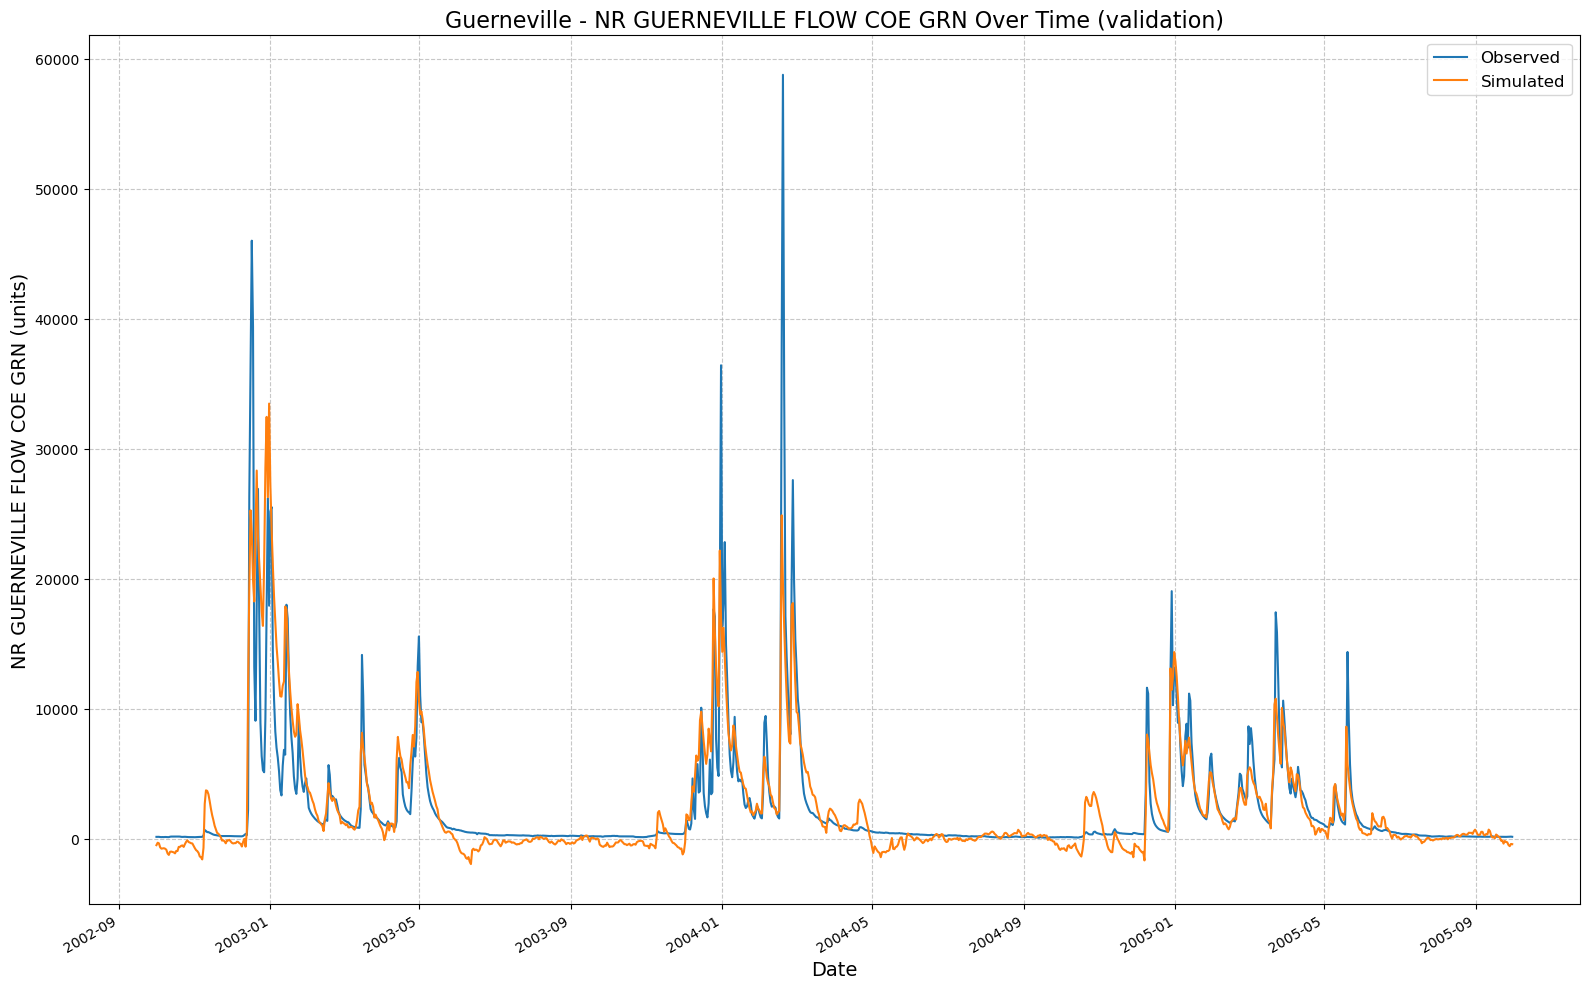

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215039/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:50:59,890: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215059/output.log initialized.
2025-02-12 21:50:59,890: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215059
2025-02-12 21:50:59,890: ### Run configurations for testing_run
2025-02-12 21:50:59,891: experiment_name: testing_run
2025-02-12 21:50:59,891: train_basin_file: guerneville
2025-02-12 21:50:59,891: validation_basin_file: guerneville
2025-02-12 21:50:59,892: test_basin_file: guerneville
2025-02-12 21:50:59,892: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:50:59,892: train_en

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 11.68it/s]
2025-02-12 21:50:59,996: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1319.38it/s]
2025-02-12 21:51:00,002: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 11.68it/s, Loss: 0.0000]
2025-02-12 21:51:01,053: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00, 10.95it/s, Loss: 0.0000]
2025-02-12 21:51:02,060: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 12.52it/s, Loss: 0.0000]
2025-02-12 21:51:02,940: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 12.25it/s, Loss: 0.0000]
2025-02-12 21:51:03,840: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 13.08it/s, Loss: 0.0000]
2025-02-12 21:51:04,683: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.60it/s]
2025-02-12 21:51:29,817: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215059/validation/model_epoch032/validation_metrics.csv
2025-02-12 21:51:29,817: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215059/validation/model_epoch032/validation_results.p
got predictions


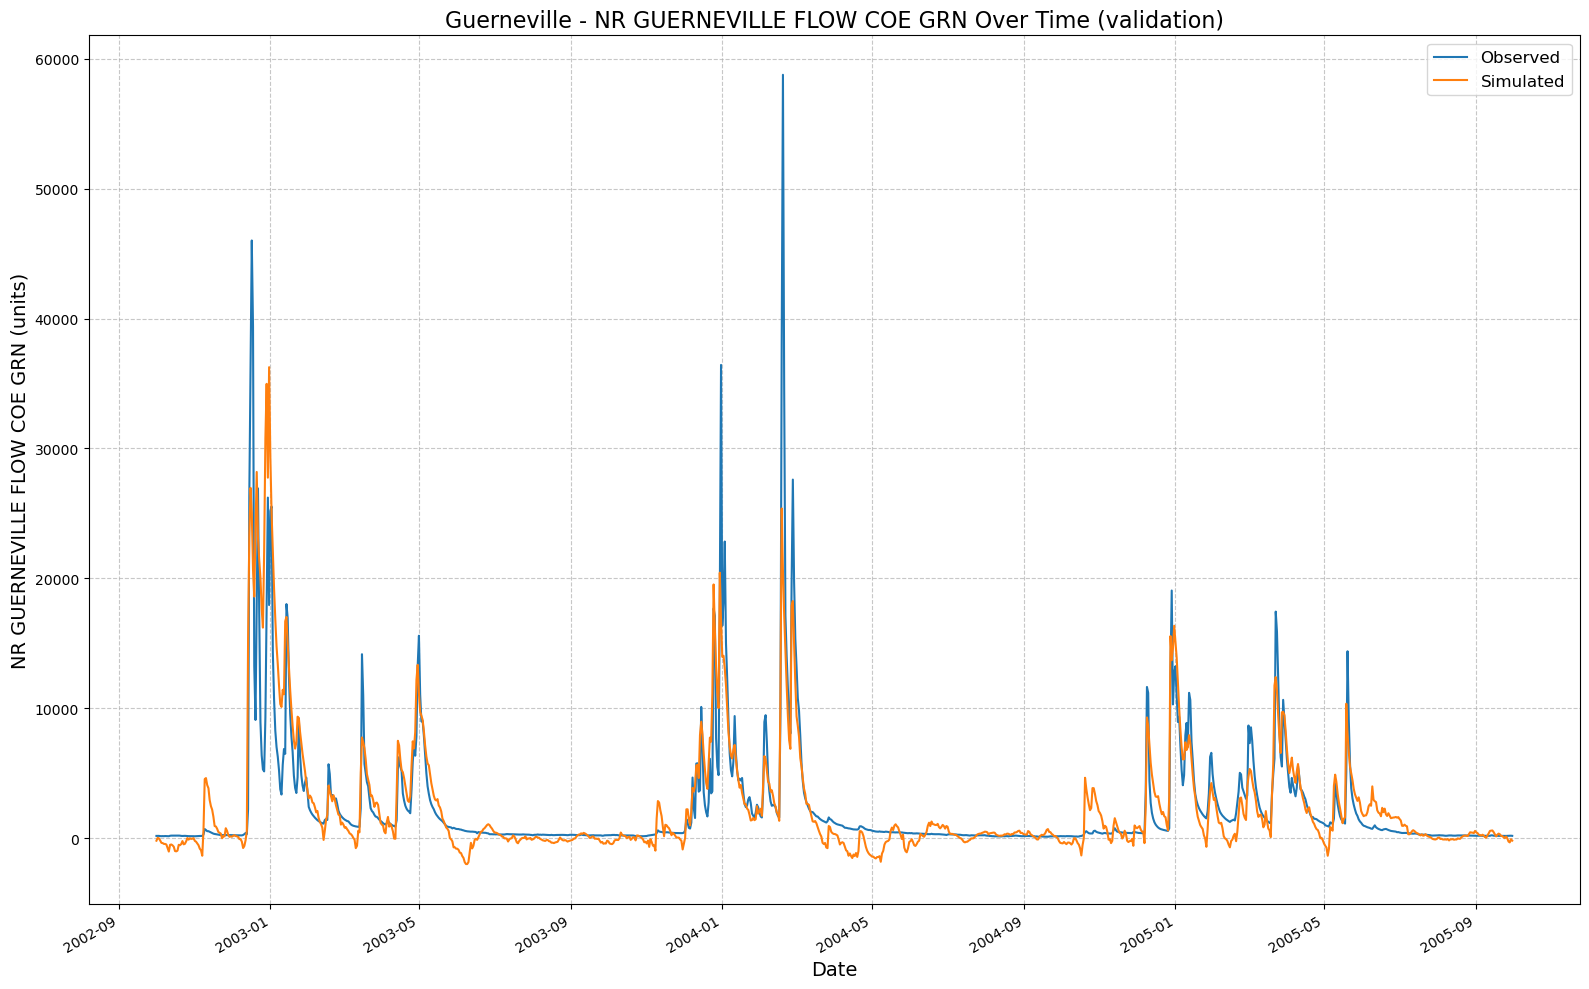

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215059/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:51:29,993: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215129/output.log initialized.
2025-02-12 21:51:29,993: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215129
2025-02-12 21:51:29,993: ### Run configurations for testing_run
2025-02-12 21:51:29,994: experiment_name: testing_run
2025-02-12 21:51:29,994: train_basin_file: guerneville
2025-02-12 21:51:29,994: validation_basin_file: guerneville
2025-02-12 21:51:29,995: test_basin_file: guerneville
2025-02-12 21:51:29,995: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:51:29,995: train_en

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 11.59it/s]
2025-02-12 21:51:30,100: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1399.03it/s]
2025-02-12 21:51:30,106: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 12.70it/s, Loss: 0.0000]
2025-02-12 21:51:31,081: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 12.93it/s, Loss: 0.0000]
2025-02-12 21:51:31,933: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 13.20it/s, Loss: 0.0000]
2025-02-12 21:51:32,769: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 13.20it/s, Loss: 0.0000]
2025-02-12 21:51:33,604: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 12.99it/s, Loss: 0.0000]
2025-02-12 21:51:34,453: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]
2025-02-12 21:51:45,203: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215129/validation/model_epoch016/validation_metrics.csv
2025-02-12 21:51:45,203: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215129/validation/model_epoch016/validation_results.p
got predictions


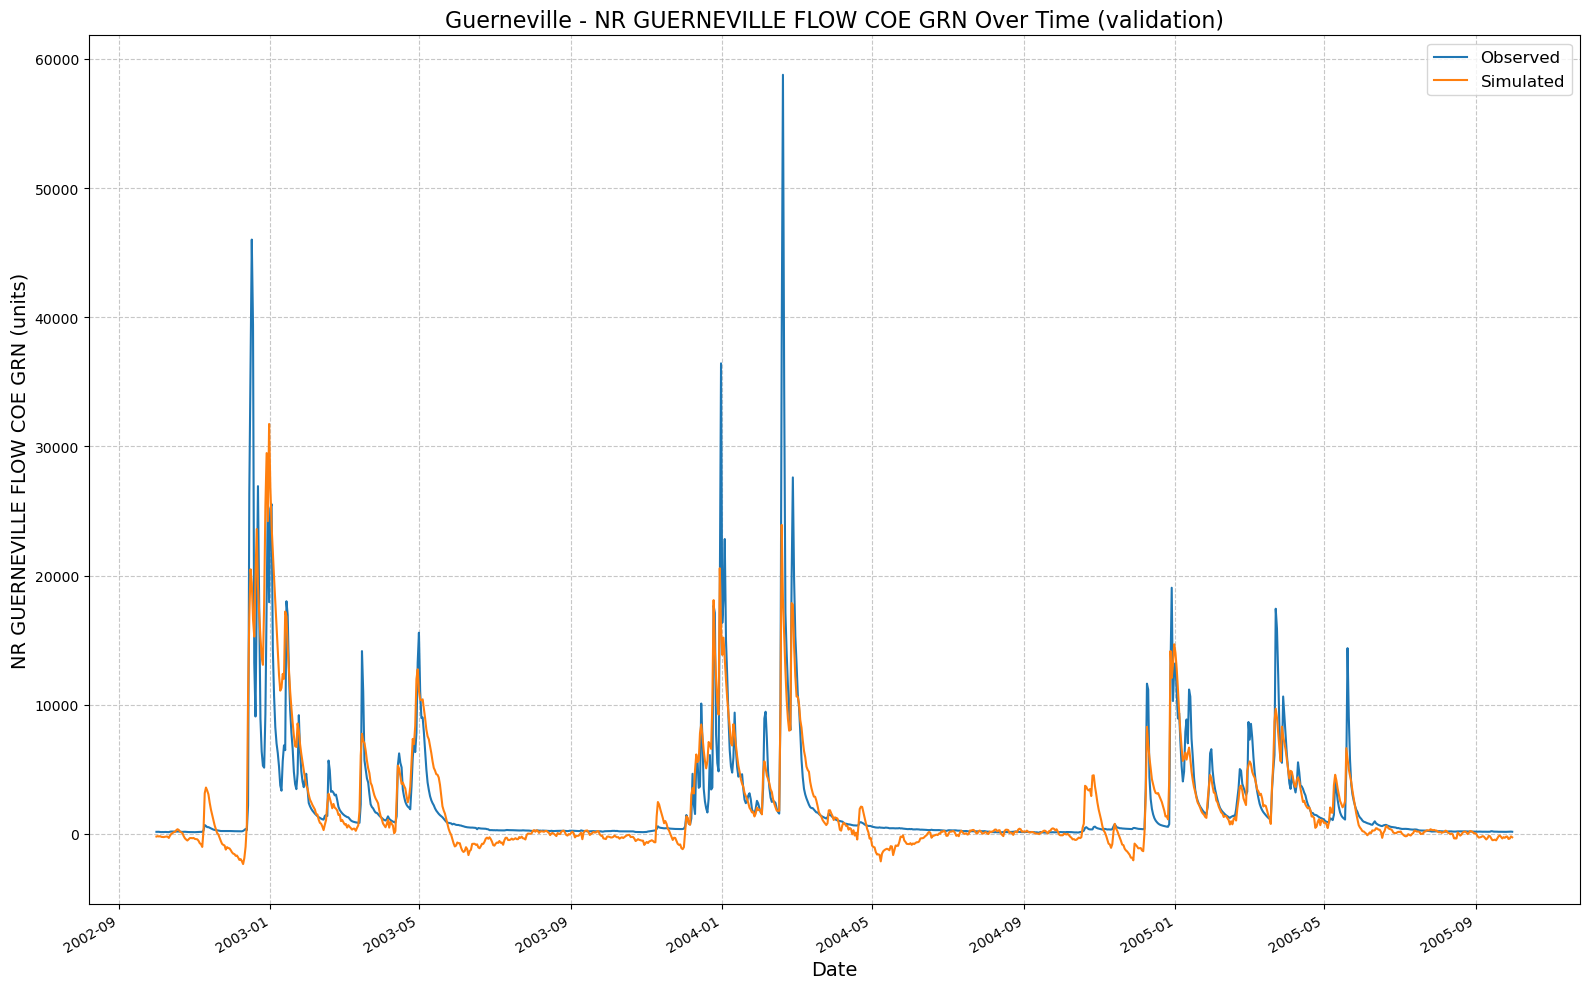

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215129/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:51:45,378: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215145/output.log initialized.
2025-02-12 21:51:45,378: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215145
2025-02-12 21:51:45,378: ### Run configurations for testing_run
2025-02-12 21:51:45,379: experiment_name: testing_run
2025-02-12 21:51:45,379: train_basin_file: guerneville
2025-02-12 21:51:45,379: validation_basin_file: guerneville
2025-02-12 21:51:45,380: test_basin_file: guerneville
2025-02-12 21:51:45,380: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:51:45,380: train_en

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 11.84it/s]
2025-02-12 21:51:45,483: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1337.04it/s]
2025-02-12 21:51:45,489: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 12.96it/s, Loss: 0.0000]
2025-02-12 21:51:46,448: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 13.31it/s, Loss: 0.0000]
2025-02-12 21:51:47,276: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 13.03it/s, Loss: 0.0000]
2025-02-12 21:51:48,123: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 13.31it/s, Loss: 0.0000]
2025-02-12 21:51:48,951: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 13.14it/s, Loss: 0.0000]
2025-02-12 21:51:49,790: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  3.79it/s]
2025-02-12 21:52:15,263: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215145/validation/model_epoch032/validation_metrics.csv
2025-02-12 21:52:15,263: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215145/validation/model_epoch032/validation_results.p
got predictions


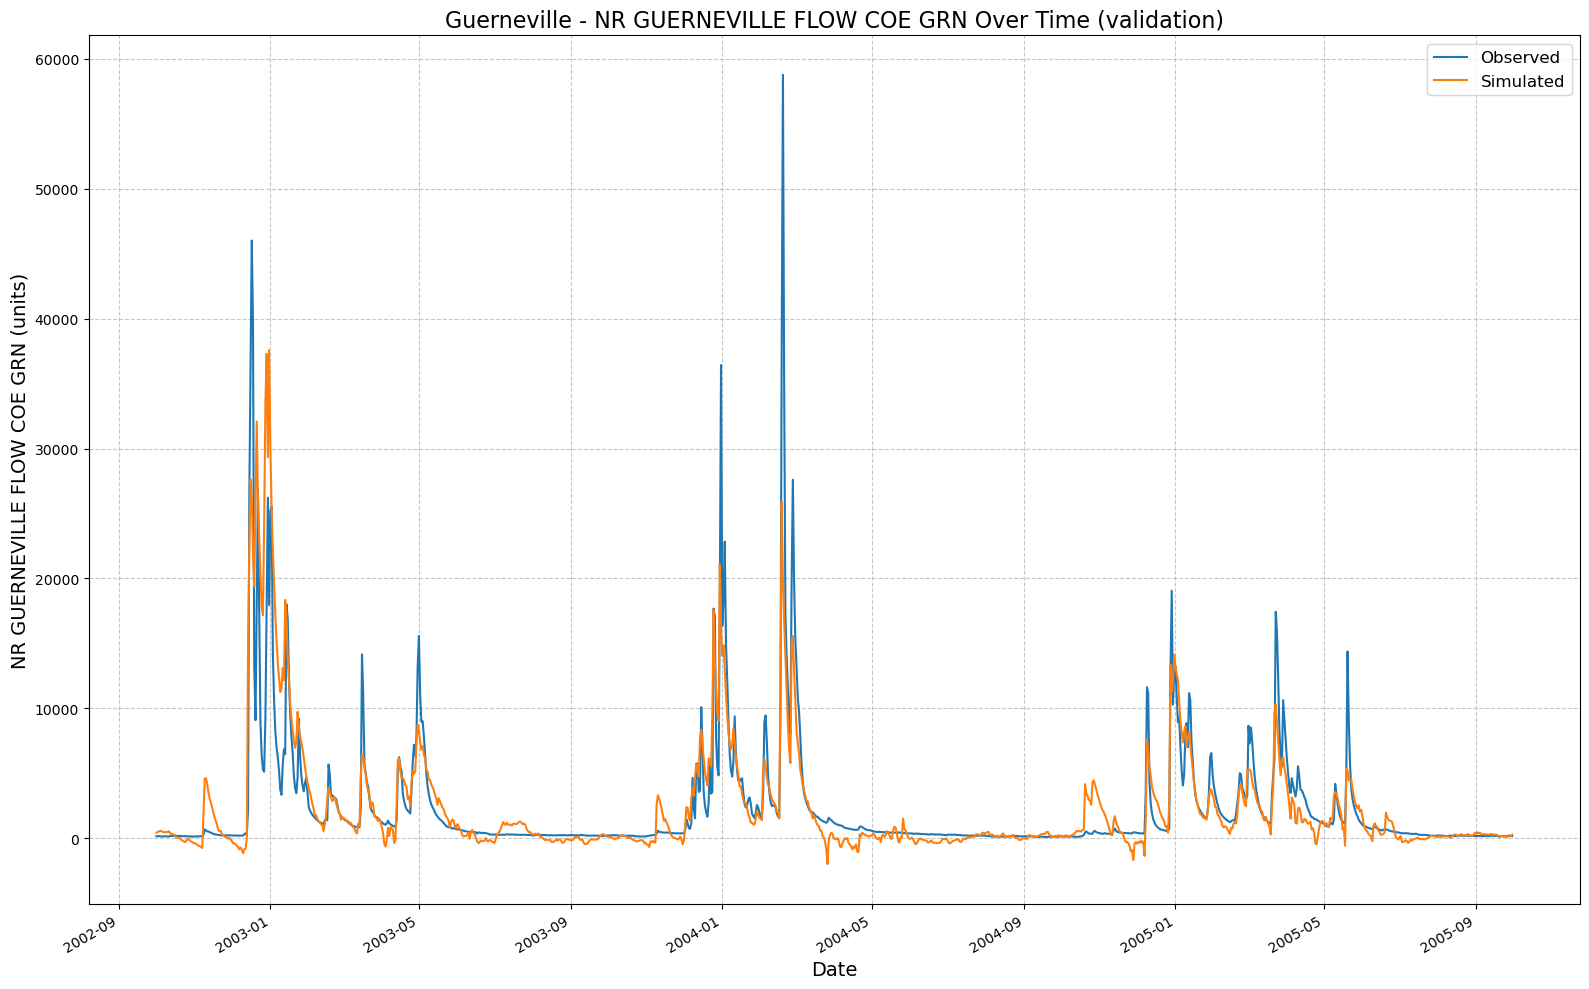

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215145/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:52:15,441: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215215/output.log initialized.
2025-02-12 21:52:15,442: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215215
2025-02-12 21:52:15,442: ### Run configurations for testing_run
2025-02-12 21:52:15,443: experiment_name: testing_run
2025-02-12 21:52:15,443: train_basin_file: guerneville
2025-02-12 21:52:15,444: validation_basin_file: guerneville
2025-02-12 21:52:15,444: test_basin_file: guerneville
2025-02-12 21:52:15,444: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:52:15,445: train_e

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 10.80it/s]
2025-02-12 21:52:15,561: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 552.83it/s]
2025-02-12 21:52:15,571: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.38it/s, Loss: 0.0000]
2025-02-12 21:52:17,433: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.97it/s, Loss: 0.0000]
2025-02-12 21:52:19,013: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.92it/s, Loss: 0.0000]
2025-02-12 21:52:20,604: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.23it/s, Loss: 0.0000]
2025-02-12 21:52:22,372: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.68it/s, Loss: 0.0000]
2025-02-12 21:52:24,021: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]
2025-02-12 21:52:44,511: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215215/validation/model_epoch016/validation_metrics.csv
2025-02-12 21:52:44,511: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215215/validation/model_epoch016/validation_results.p
got predictions


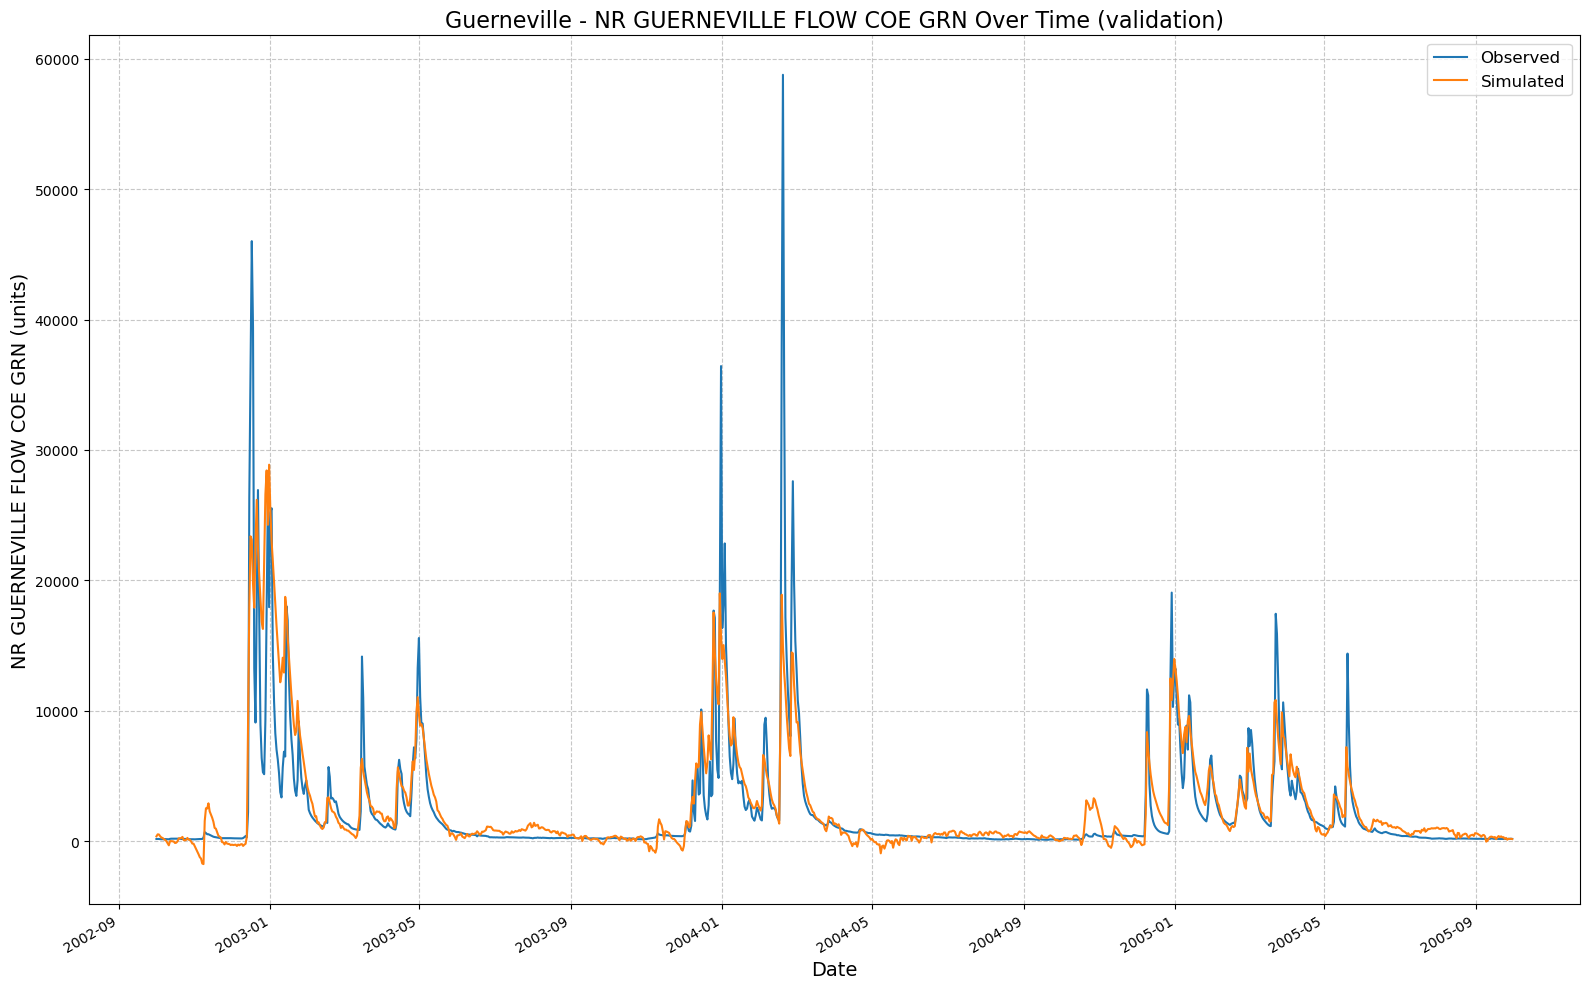

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215215/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:52:44,689: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215244/output.log initialized.
2025-02-12 21:52:44,690: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215244
2025-02-12 21:52:44,690: ### Run configurations for testing_run
2025-02-12 21:52:44,690: experiment_name: testing_run
2025-02-12 21:52:44,691: train_basin_file: guerneville
2025-02-12 21:52:44,691: validation_basin_file: guerneville
2025-02-12 21:52:44,692: test_basin_file: guerneville
2025-02-12 21:52:44,692: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:52:44,692: train_e

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 11.71it/s]
2025-02-12 21:52:44,796: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1204.91it/s]
2025-02-12 21:52:44,803: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.62it/s, Loss: 0.0000]
2025-02-12 21:52:46,589: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.75it/s, Loss: 0.0000]
2025-02-12 21:52:48,222: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.87it/s, Loss: 0.0000]
2025-02-12 21:52:49,827: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.87it/s, Loss: 0.0000]
2025-02-12 21:52:51,430: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.22it/s, Loss: 0.0000]
2025-02-12 21:52:53,200: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.83it/s]
2025-02-12 21:53:41,677: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215244/validation/model_epoch032/validation_metrics.csv
2025-02-12 21:53:41,678: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215244/validation/model_epoch032/validation_results.p
got predictions


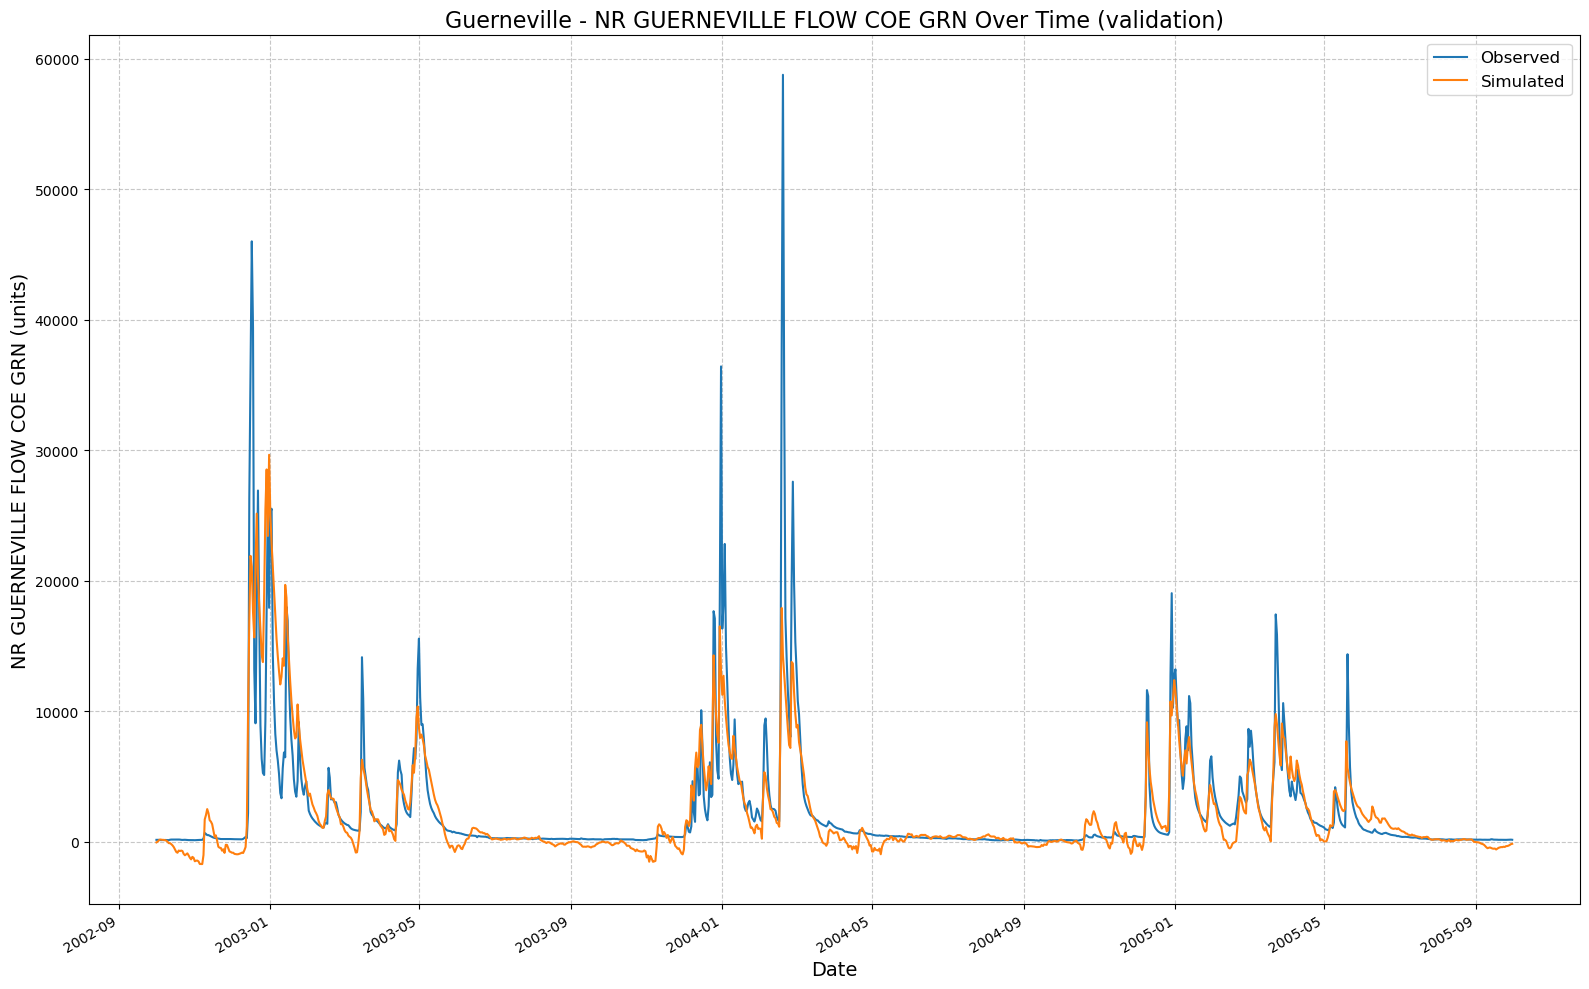

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215244/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:53:41,858: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215341/output.log initialized.
2025-02-12 21:53:41,858: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215341
2025-02-12 21:53:41,859: ### Run configurations for testing_run
2025-02-12 21:53:41,859: experiment_name: testing_run
2025-02-12 21:53:41,859: train_basin_file: guerneville
2025-02-12 21:53:41,860: validation_basin_file: guerneville
2025-02-12 21:53:41,860: test_basin_file: guerneville
2025-02-12 21:53:41,860: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:53:41,861: train_e

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 10.74it/s]
2025-02-12 21:53:41,984: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 533.02it/s]
2025-02-12 21:53:41,994: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.46it/s, Loss: 0.0000]
2025-02-12 21:53:43,851: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.89it/s, Loss: 0.0000]
2025-02-12 21:53:45,451: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.94it/s, Loss: 0.0000]
2025-02-12 21:53:47,040: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.93it/s, Loss: 0.0000]
2025-02-12 21:53:48,628: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.94it/s, Loss: 0.0000]
2025-02-12 21:53:50,216: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]
2025-02-12 21:54:11,126: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215341/validation/model_epoch016/validation_metrics.csv
2025-02-12 21:54:11,126: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215341/validation/model_epoch016/validation_results.p
got predictions


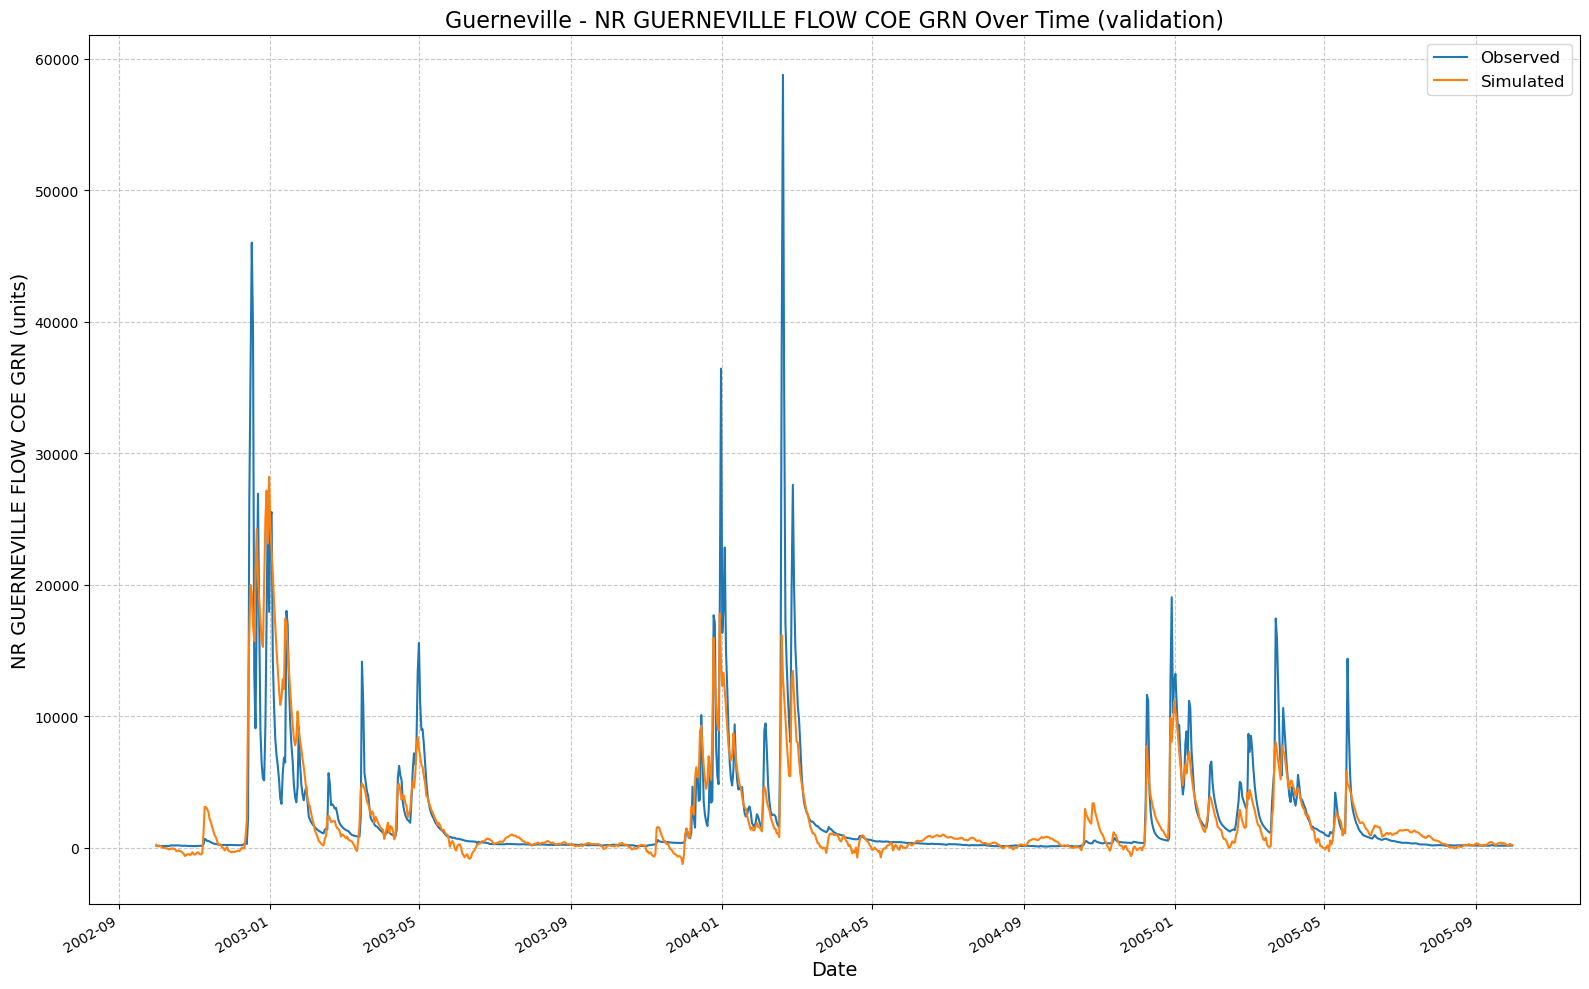

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215341/results_output_validation.csv
NoPhysics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:54:11,320: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215411/output.log initialized.
2025-02-12 21:54:11,321: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215411
2025-02-12 21:54:11,321: ### Run configurations for testing_run
2025-02-12 21:54:11,322: experiment_name: testing_run
2025-02-12 21:54:11,322: train_basin_file: guerneville
2025-02-12 21:54:11,322: validation_basin_file: guerneville
2025-02-12 21:54:11,323: test_basin_file: guerneville
2025-02-12 21:54:11,323: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:54:11,323: train_e

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 10.79it/s]
2025-02-12 21:54:11,434: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1148.18it/s]
2025-02-12 21:54:11,440: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.70it/s, Loss: 0.0000]
2025-02-12 21:54:13,220: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.88it/s, Loss: 0.0000]
2025-02-12 21:54:14,822: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.87it/s, Loss: 0.0000]
2025-02-12 21:54:16,424: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.86it/s, Loss: 0.0000]
2025-02-12 21:54:18,030: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.93it/s, Loss: 0.0000]
2025-02-12 21:54:19,618: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]
2025-02-12 21:55:07,533: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215411/validation/model_epoch032/validation_metrics.csv
2025-02-12 21:55:07,534: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215411/validation/model_epoch032/validation_results.p
got predictions


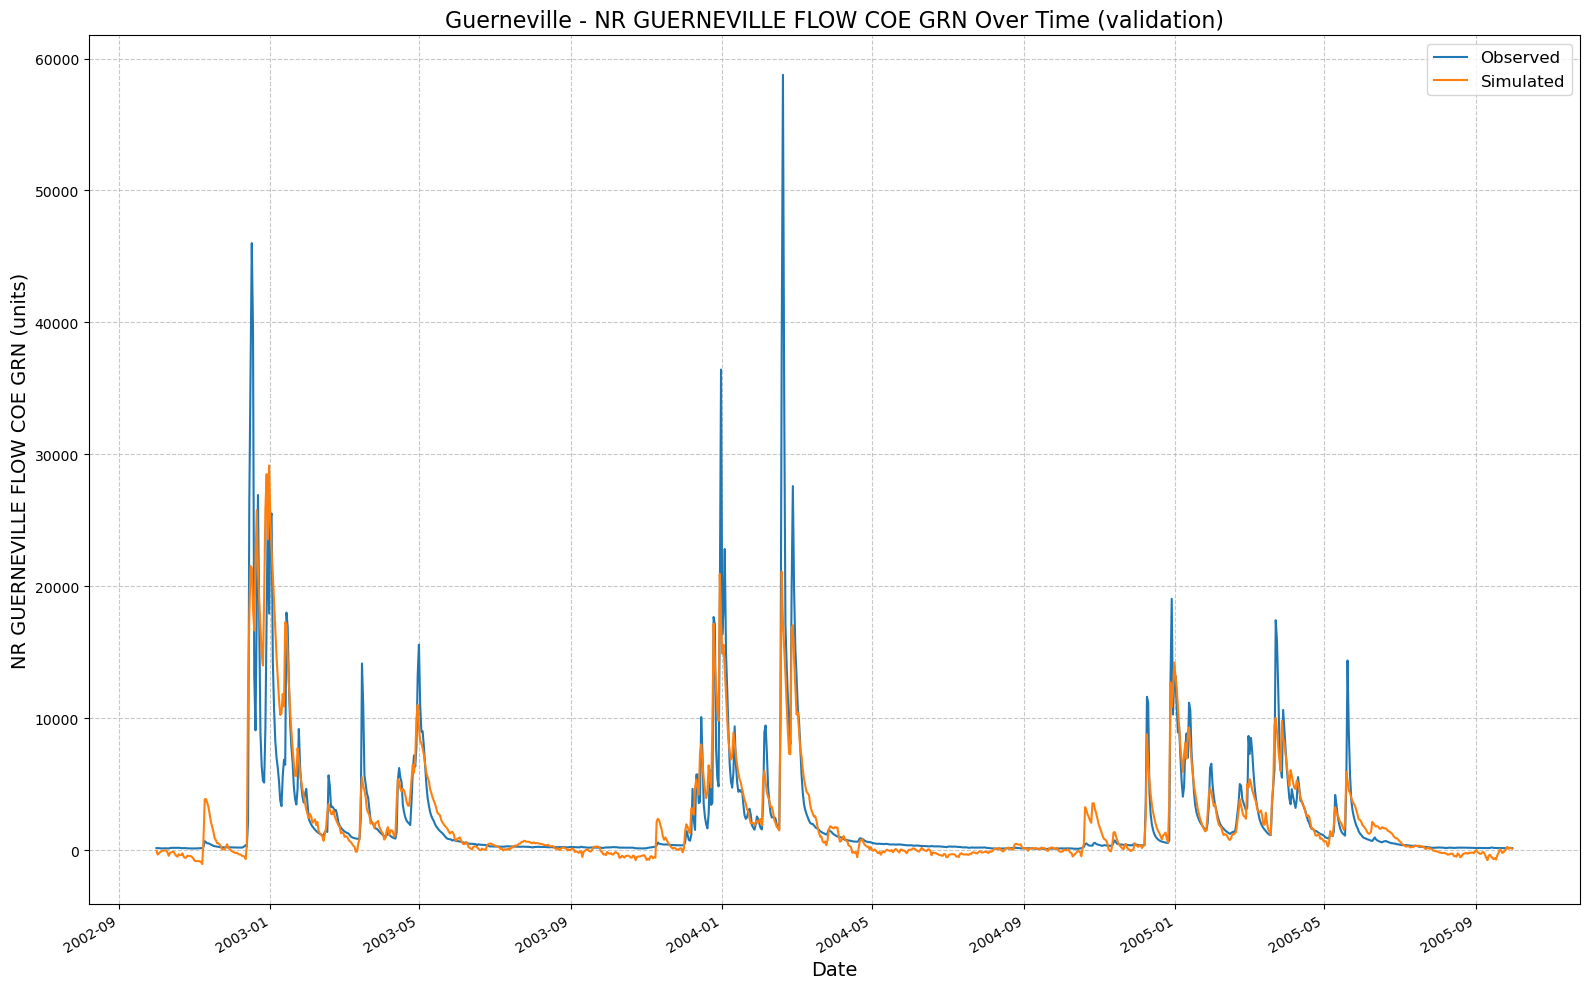

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215411/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:55:07,713: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215507/output.log initialized.
2025-02-12 21:55:07,713: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215507
2025-02-12 21:55:07,713: ### Run configurations for testing_run
2025-02-12 21:55:07,714: experiment_name: testing_run
2025-02-12 21:55:07,714: train_basin_file: guerneville
2025-02-12 21:55:07,715: validation_basin_file: guerneville
2025-02-12 21:55:07,715: test_basin_file: guerneville
2025-02-12 21:55:07,715: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:55:07,715: train_en

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  9.93it/s]
2025-02-12 21:55:07,841: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 614.55it/s]
2025-02-12 21:55:07,850: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.22it/s, Loss: 0.0000]
2025-02-12 21:55:09,795: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.25it/s, Loss: 0.0000]
2025-02-12 21:55:11,556: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.44it/s, Loss: 0.0000]
2025-02-12 21:55:13,267: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.49it/s, Loss: 0.0000]
2025-02-12 21:55:14,962: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.27it/s, Loss: 0.0000]
2025-02-12 21:55:16,718: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]
2025-02-12 21:55:38,251: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215507/validation/model_epoch016/validation_metrics.csv
2025-02-12 21:55:38,252: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215507/validation/model_epoch016/validation_results.p
got predictions


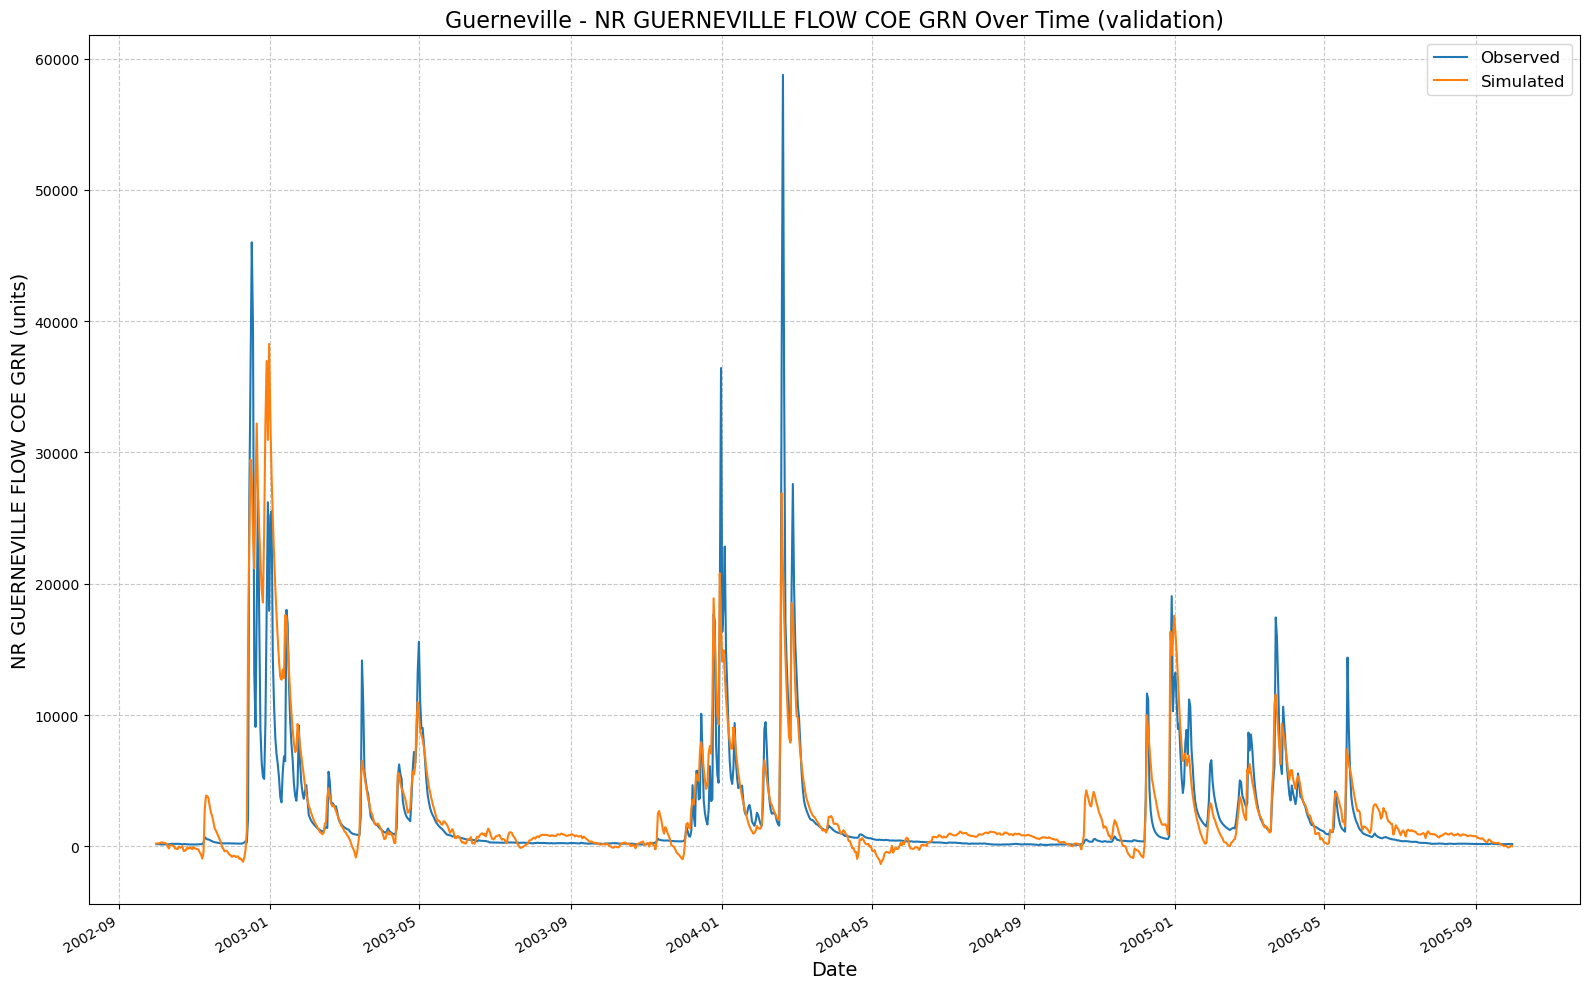

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215507/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:55:38,433: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215538/output.log initialized.
2025-02-12 21:55:38,434: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215538
2025-02-12 21:55:38,434: ### Run configurations for testing_run
2025-02-12 21:55:38,435: experiment_name: testing_run
2025-02-12 21:55:38,435: train_basin_file: guerneville
2025-02-12 21:55:38,435: validation_basin_file: guerneville
2025-02-12 21:55:38,436: test_basin_file: guerneville
2025-02-12 21:55:38,436: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:55:38,436: train_en

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 12.18it/s]
2025-02-12 21:55:38,540: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1337.04it/s]
2025-02-12 21:55:38,546: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.41it/s, Loss: 0.0000]
2025-02-12 21:55:40,400: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.48it/s, Loss: 0.0000]
2025-02-12 21:55:42,100: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.57it/s, Loss: 0.0000]
2025-02-12 21:55:43,777: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  5.86it/s, Loss: 0.0000]
2025-02-12 21:55:45,655: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.39it/s, Loss: 0.0000]
2025-02-12 21:55:47,378: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]
2025-02-12 21:56:38,148: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215538/validation/model_epoch032/validation_metrics.csv
2025-02-12 21:56:38,148: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215538/validation/model_epoch032/validation_results.p
got predictions


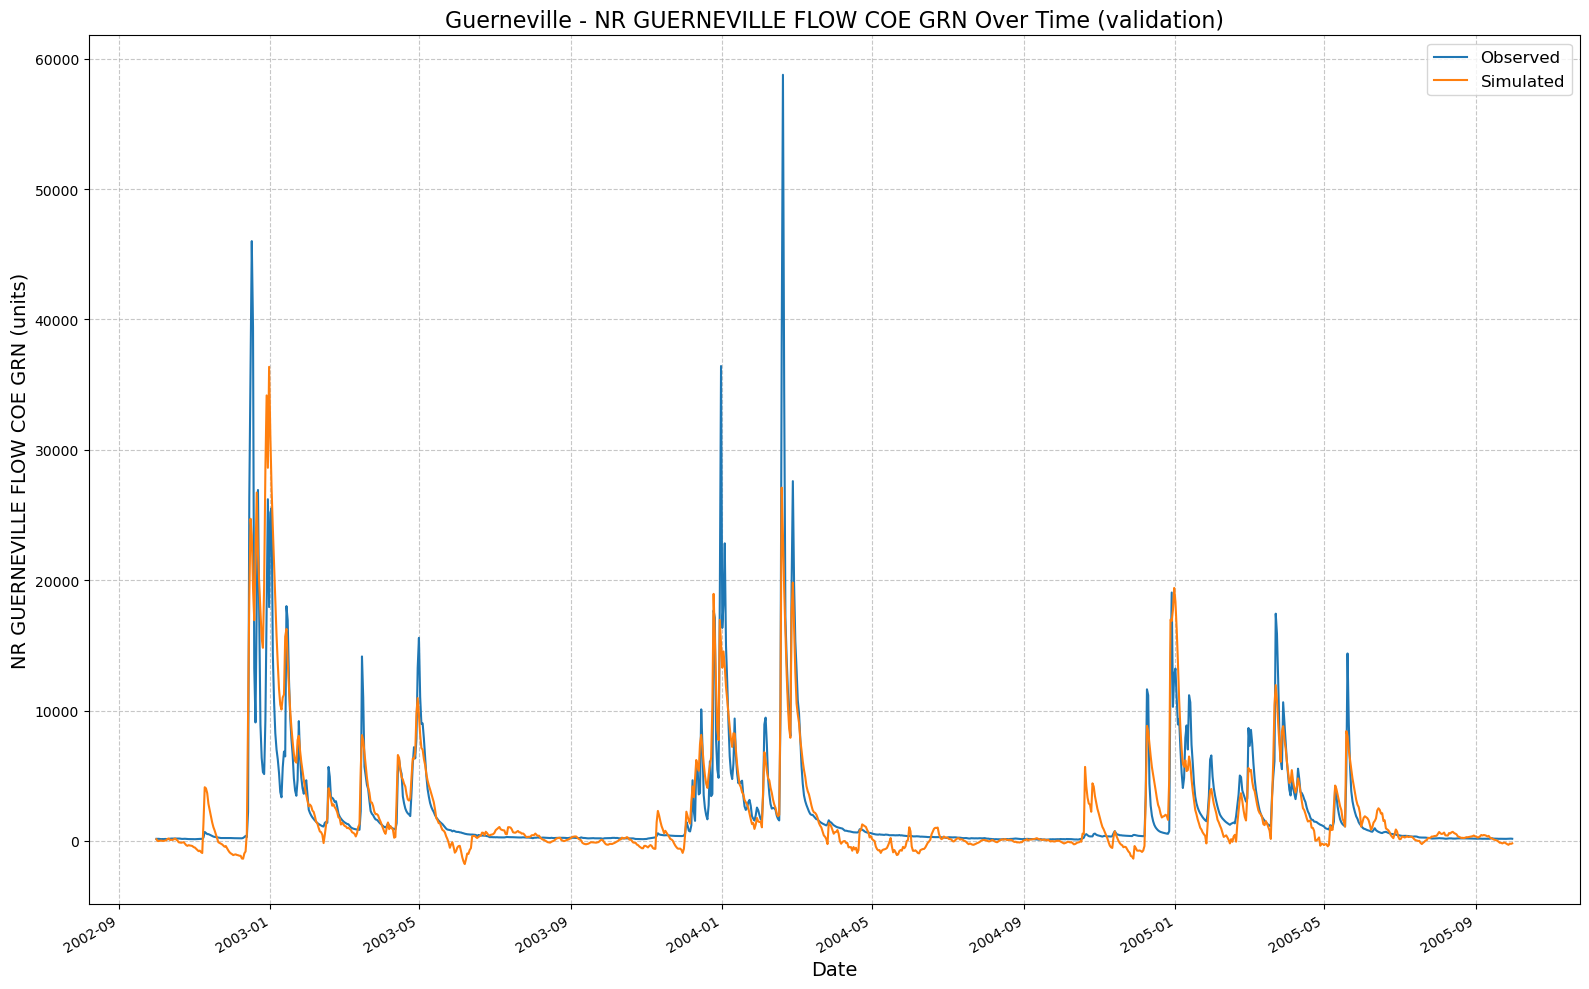

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215538/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:56:38,400: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215638/output.log initialized.
2025-02-12 21:56:38,400: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215638
2025-02-12 21:56:38,400: ### Run configurations for testing_run
2025-02-12 21:56:38,400: experiment_name: testing_run
2025-02-12 21:56:38,401: train_basin_file: guerneville
2025-02-12 21:56:38,401: validation_basin_file: guerneville
2025-02-12 21:56:38,401: test_basin_file: guerneville
2025-02-12 21:56:38,401: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:56:38,402: train_en

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  9.76it/s]
2025-02-12 21:56:38,531: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1131.15it/s]
2025-02-12 21:56:38,538: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  5.78it/s, Loss: 0.0000]
2025-02-12 21:56:40,619: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.34it/s, Loss: 0.0000]
2025-02-12 21:56:42,357: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.43it/s, Loss: 0.0000]
2025-02-12 21:56:44,069: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.27it/s, Loss: 0.0000]
2025-02-12 21:56:45,824: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.06it/s, Loss: 0.0000]
2025-02-12 21:56:47,641: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.22it/s]
2025-02-12 21:57:09,972: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215638/validation/model_epoch016/validation_metrics.csv
2025-02-12 21:57:09,973: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215638/validation/model_epoch016/validation_results.p
got predictions


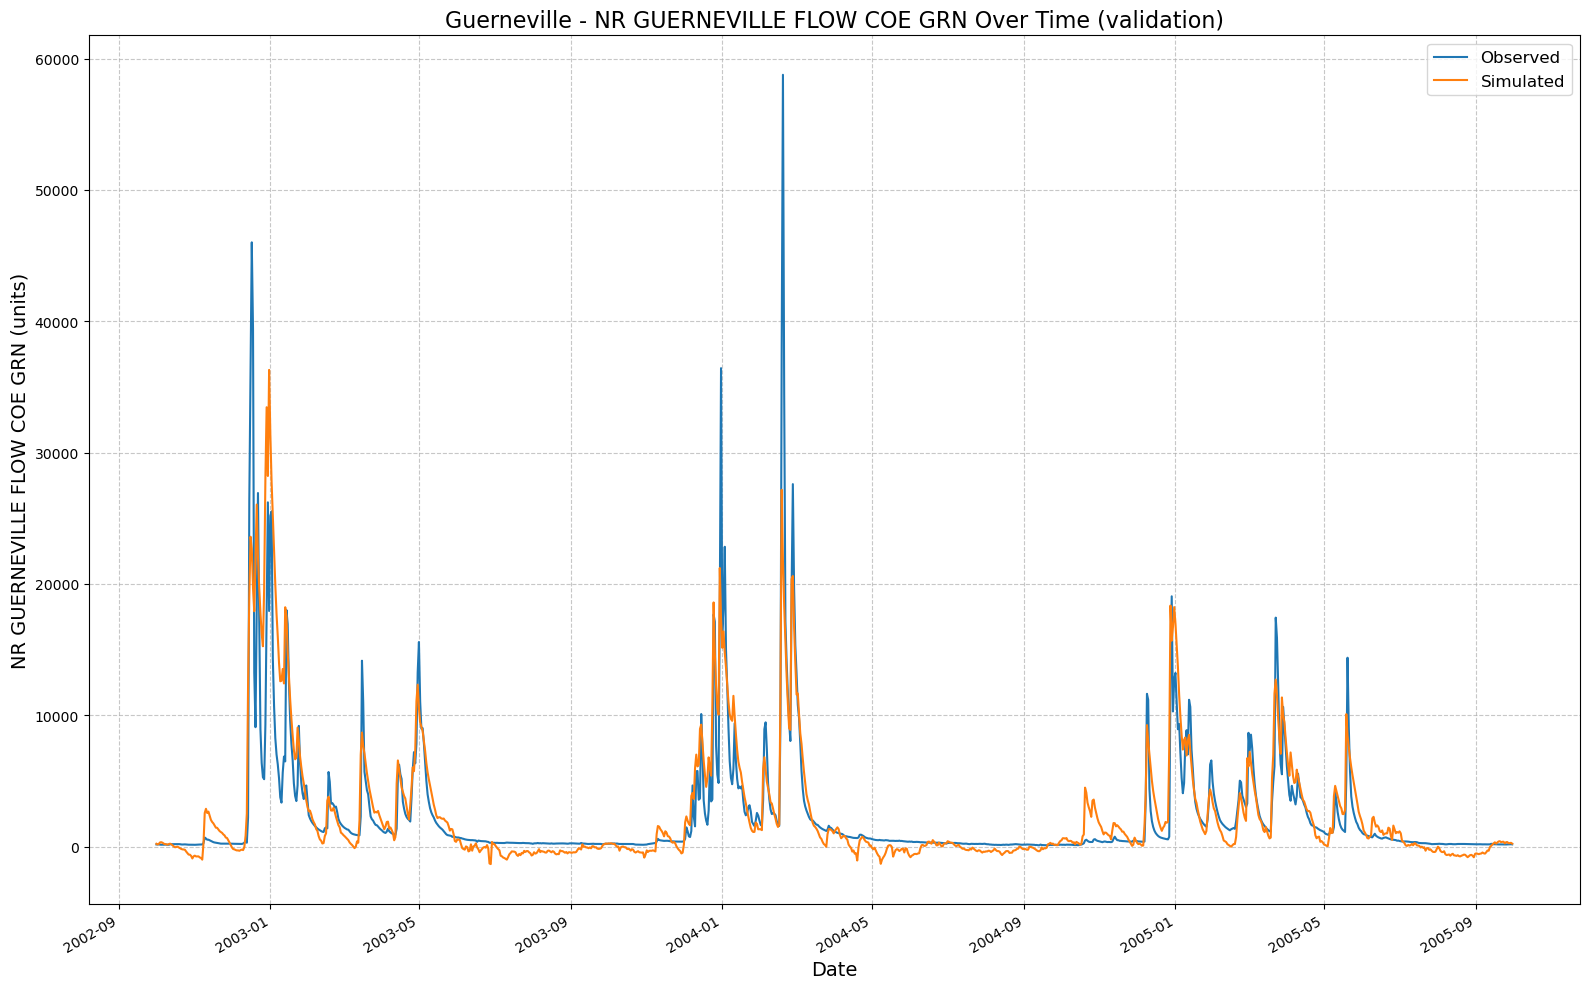

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215638/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:57:10,150: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215710/output.log initialized.
2025-02-12 21:57:10,150: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215710
2025-02-12 21:57:10,151: ### Run configurations for testing_run
2025-02-12 21:57:10,151: experiment_name: testing_run
2025-02-12 21:57:10,151: train_basin_file: guerneville
2025-02-12 21:57:10,152: validation_basin_file: guerneville
2025-02-12 21:57:10,152: test_basin_file: guerneville
2025-02-12 21:57:10,152: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:57:10,153: train_en

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 11.89it/s]
2025-02-12 21:57:10,257: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1160.25it/s]
2025-02-12 21:57:10,268: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.35it/s, Loss: 0.0000]
2025-02-12 21:57:12,133: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.66it/s, Loss: 0.0000]
2025-02-12 21:57:13,788: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.33it/s, Loss: 0.0000]
2025-02-12 21:57:15,529: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.45it/s, Loss: 0.0000]
2025-02-12 21:57:17,237: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.36it/s, Loss: 0.0000]
2025-02-12 21:57:18,968: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]
2025-02-12 21:58:11,754: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215710/validation/model_epoch032/validation_metrics.csv
2025-02-12 21:58:11,756: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215710/validation/model_epoch032/validation_results.p
got predictions


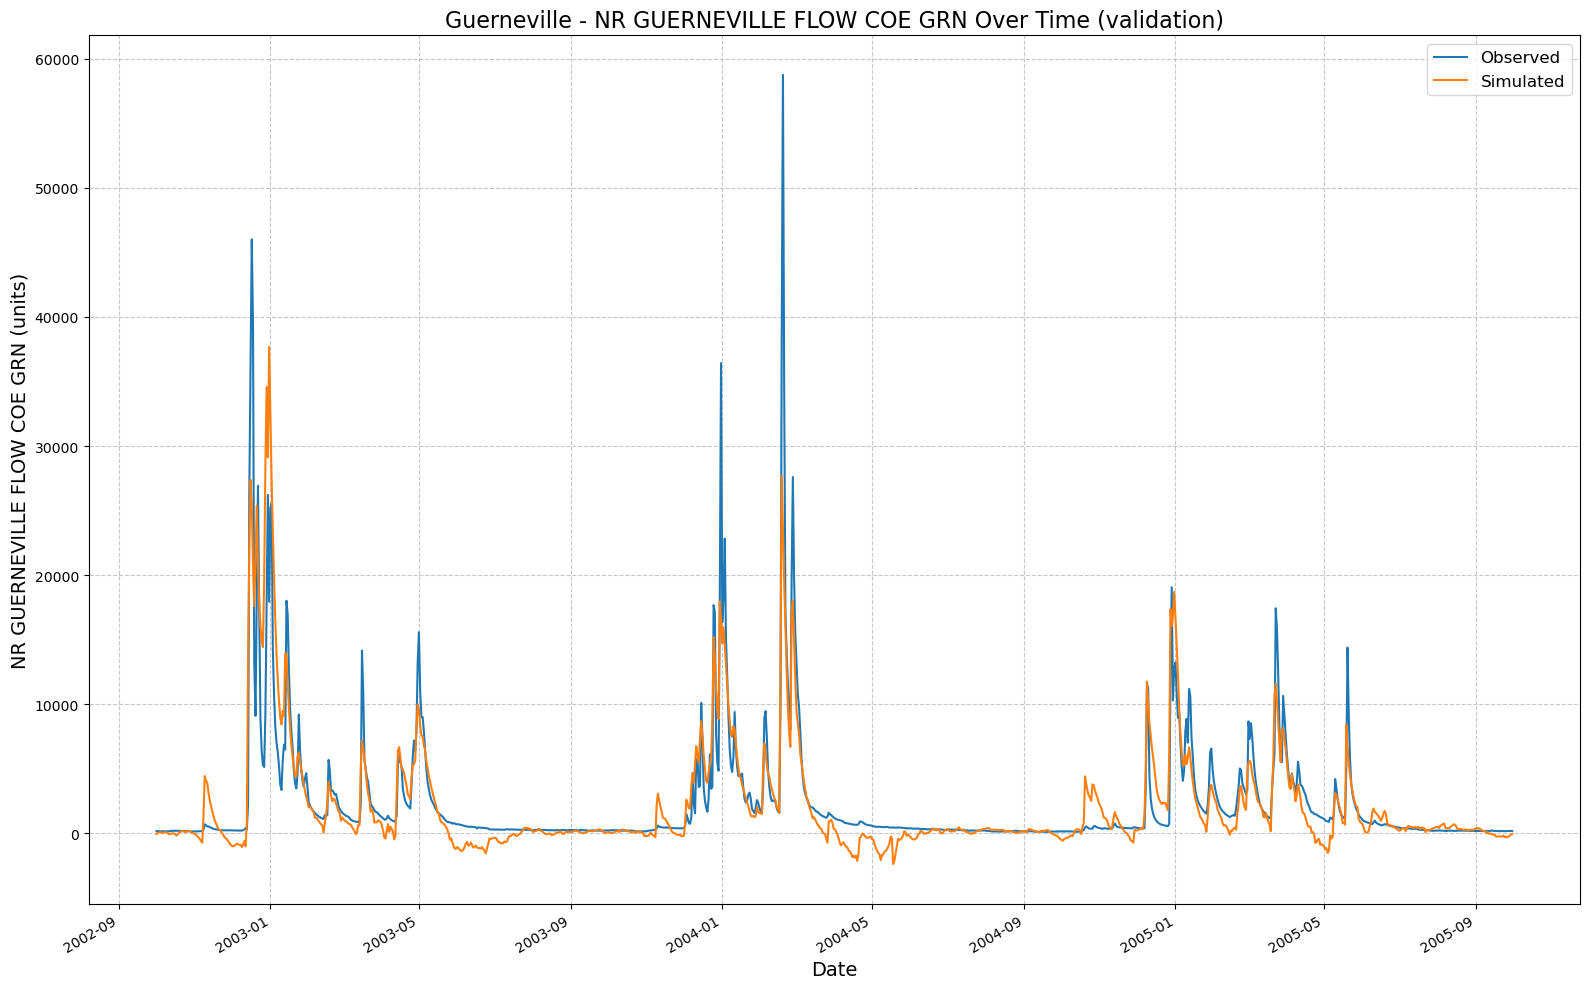

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215710/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 21:58:11,988: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215811/output.log initialized.
2025-02-12 21:58:11,988: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215811
2025-02-12 21:58:11,989: ### Run configurations for testing_run
2025-02-12 21:58:11,989: experiment_name: testing_run
2025-02-12 21:58:11,990: train_basin_file: guerneville
2025-02-12 21:58:11,990: validation_basin_file: guerneville
2025-02-12 21:58:11,991: test_basin_file: guerneville
2025-02-12 21:58:11,991: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:58:11,992: train_e

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  8.07it/s]
2025-02-12 21:58:12,140: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1330.26it/s]
2025-02-12 21:58:12,147: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:03<00:00,  2.89it/s, Loss: 0.0000]
2025-02-12 21:58:16,077: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:03<00:00,  3.19it/s, Loss: 0.0000]
2025-02-12 21:58:19,530: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:03<00:00,  3.02it/s, Loss: 0.0000]
2025-02-12 21:58:23,170: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:03<00:00,  3.06it/s, Loss: 0.0000]
2025-02-12 21:58:26,773: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:03<00:00,  3.29it/s, Loss: 0.0000]
2025-02-12 21:58:30,120: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]
2025-02-12 21:59:12,184: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215811/validation/model_epoch016/validation_metrics.csv
2025-02-12 21:59:12,185: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215811/validation/model_epoch016/validation_results.p
got predictions


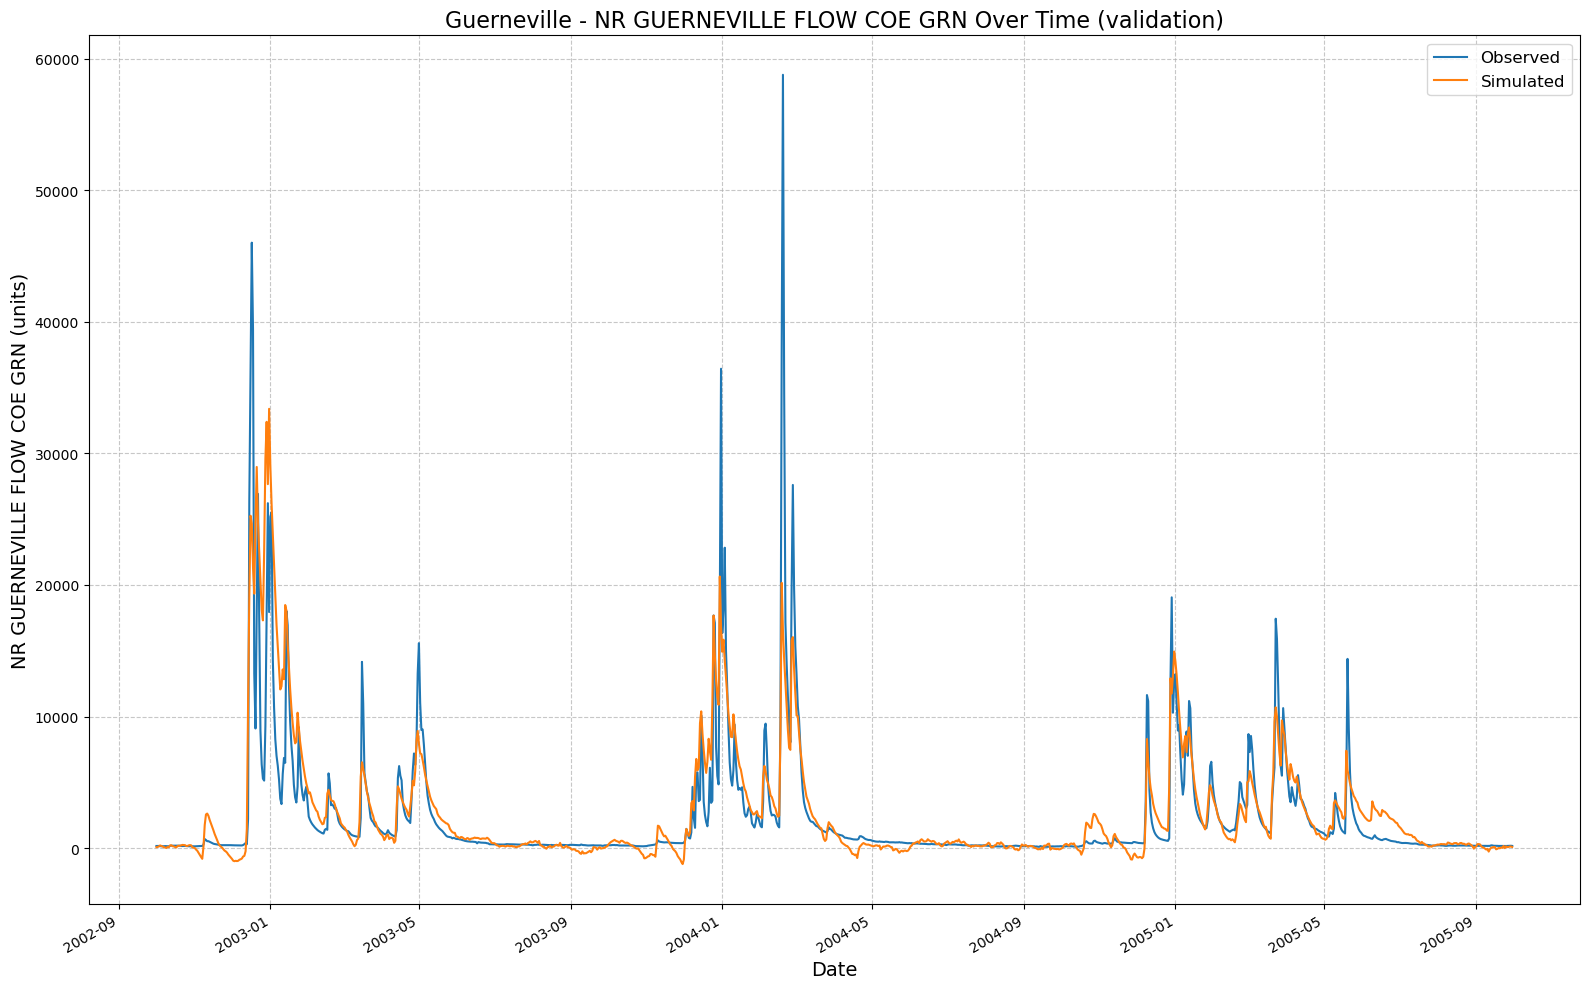

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215811/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 21:59:12,361: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215912/output.log initialized.
2025-02-12 21:59:12,361: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215912
2025-02-12 21:59:12,362: ### Run configurations for testing_run
2025-02-12 21:59:12,362: experiment_name: testing_run
2025-02-12 21:59:12,362: train_basin_file: guerneville
2025-02-12 21:59:12,363: validation_basin_file: guerneville
2025-02-12 21:59:12,363: test_basin_file: guerneville
2025-02-12 21:59:12,363: train_start_date: 1994-10-01 00:00:00
2025-02-12 21:59:12,364: train_e

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 12.09it/s]
2025-02-12 21:59:12,467: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1443.33it/s]
2025-02-12 21:59:12,473: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:03<00:00,  3.21it/s, Loss: 0.0000]
2025-02-12 21:59:16,051: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:03<00:00,  3.31it/s, Loss: 0.0000]
2025-02-12 21:59:19,376: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:03<00:00,  3.10it/s, Loss: 0.0000]
2025-02-12 21:59:22,921: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:03<00:00,  3.18it/s, Loss: 0.0000]
2025-02-12 21:59:26,380: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:03<00:00,  3.19it/s, Loss: 0.0000]
2025-02-12 21:59:29,826: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]
2025-02-12 22:01:10,624: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215912/validation/model_epoch032/validation_metrics.csv
2025-02-12 22:01:10,625: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215912/validation/model_epoch032/validation_results.p
got predictions


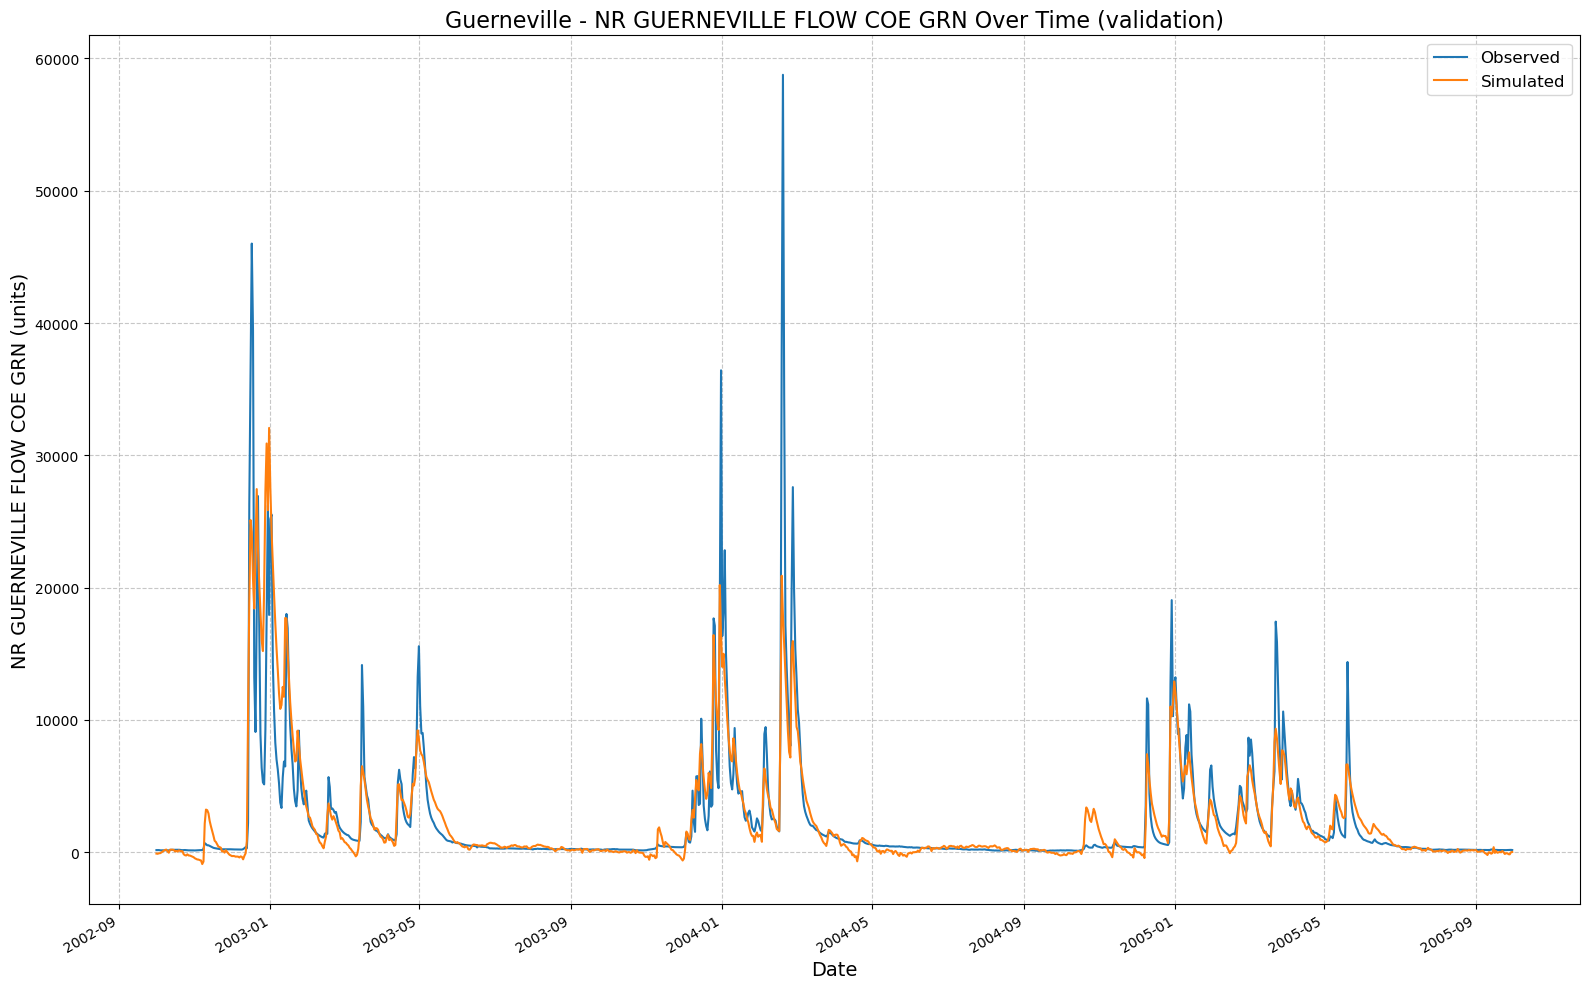

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_215912/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 22:01:10,804: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220110/output.log initialized.
2025-02-12 22:01:10,804: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220110
2025-02-12 22:01:10,804: ### Run configurations for testing_run
2025-02-12 22:01:10,805: experiment_name: testing_run
2025-02-12 22:01:10,805: train_basin_file: guerneville
2025-02-12 22:01:10,805: validation_basin_file: guerneville
2025-02-12 22:01:10,806: test_basin_file: guerneville
2025-02-12 22:01:10,806: train_start_date: 1994-10-01 00:00:00
2025-02-12 22:01:10,806: train_e

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 12.10it/s]
2025-02-12 22:01:10,910: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1205.95it/s]
2025-02-12 22:01:10,917: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:03<00:00,  3.21it/s, Loss: 0.0000]
2025-02-12 22:01:14,505: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:03<00:00,  3.34it/s, Loss: 0.0000]
2025-02-12 22:01:17,805: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:03<00:00,  3.30it/s, Loss: 0.0000]
2025-02-12 22:01:21,139: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:03<00:00,  3.14it/s, Loss: 0.0000]
2025-02-12 22:01:24,645: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:03<00:00,  3.18it/s, Loss: 0.0000]
2025-02-12 22:01:28,106: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.30it/s]
2025-02-12 22:02:09,706: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220110/validation/model_epoch016/validation_metrics.csv
2025-02-12 22:02:09,707: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220110/validation/model_epoch016/validation_results.p
got predictions


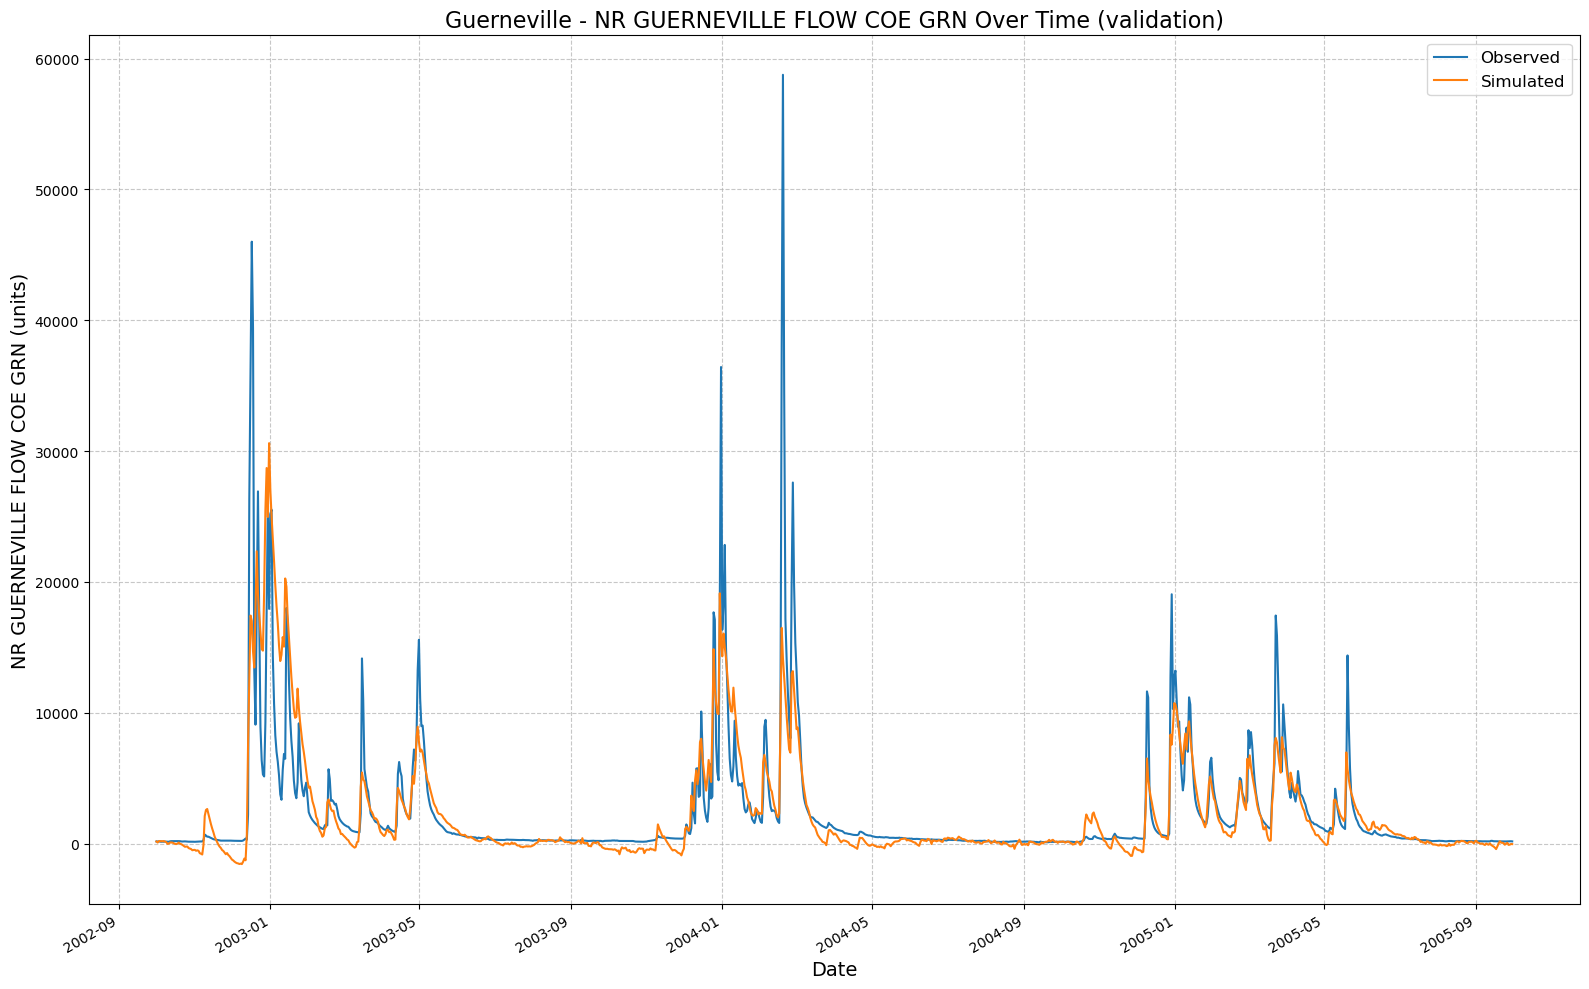

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220110/results_output_validation.csv
NoPhysics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 22:02:09,886: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220209/output.log initialized.
2025-02-12 22:02:09,886: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220209
2025-02-12 22:02:09,886: ### Run configurations for testing_run
2025-02-12 22:02:09,887: experiment_name: testing_run
2025-02-12 22:02:09,887: train_basin_file: guerneville
2025-02-12 22:02:09,887: validation_basin_file: guerneville
2025-02-12 22:02:09,888: test_basin_file: guerneville
2025-02-12 22:02:09,888: train_start_date: 1994-10-01 00:00:00
2025-02-12 22:02:09,888: train_e

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00, 12.04it/s]
2025-02-12 22:02:09,992: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 1370.24it/s]
2025-02-12 22:02:09,998: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:03<00:00,  3.23it/s, Loss: 0.0000]
2025-02-12 22:02:13,552: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:03<00:00,  3.31it/s, Loss: 0.0000]
2025-02-12 22:02:16,878: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:03<00:00,  3.19it/s, Loss: 0.0000]
2025-02-12 22:02:20,330: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:04<00:00,  2.68it/s, Loss: 0.0000]
2025-02-12 22:02:24,440: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:03<00:00,  3.16it/s, Loss: 0.0000]
2025-02-12 22:02:27,918: Epoch 5 avera

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]
2025-02-12 22:04:19,231: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220209/validation/model_epoch032/validation_metrics.csv
2025-02-12 22:04:19,232: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220209/validation/model_epoch032/validation_results.p
got predictions


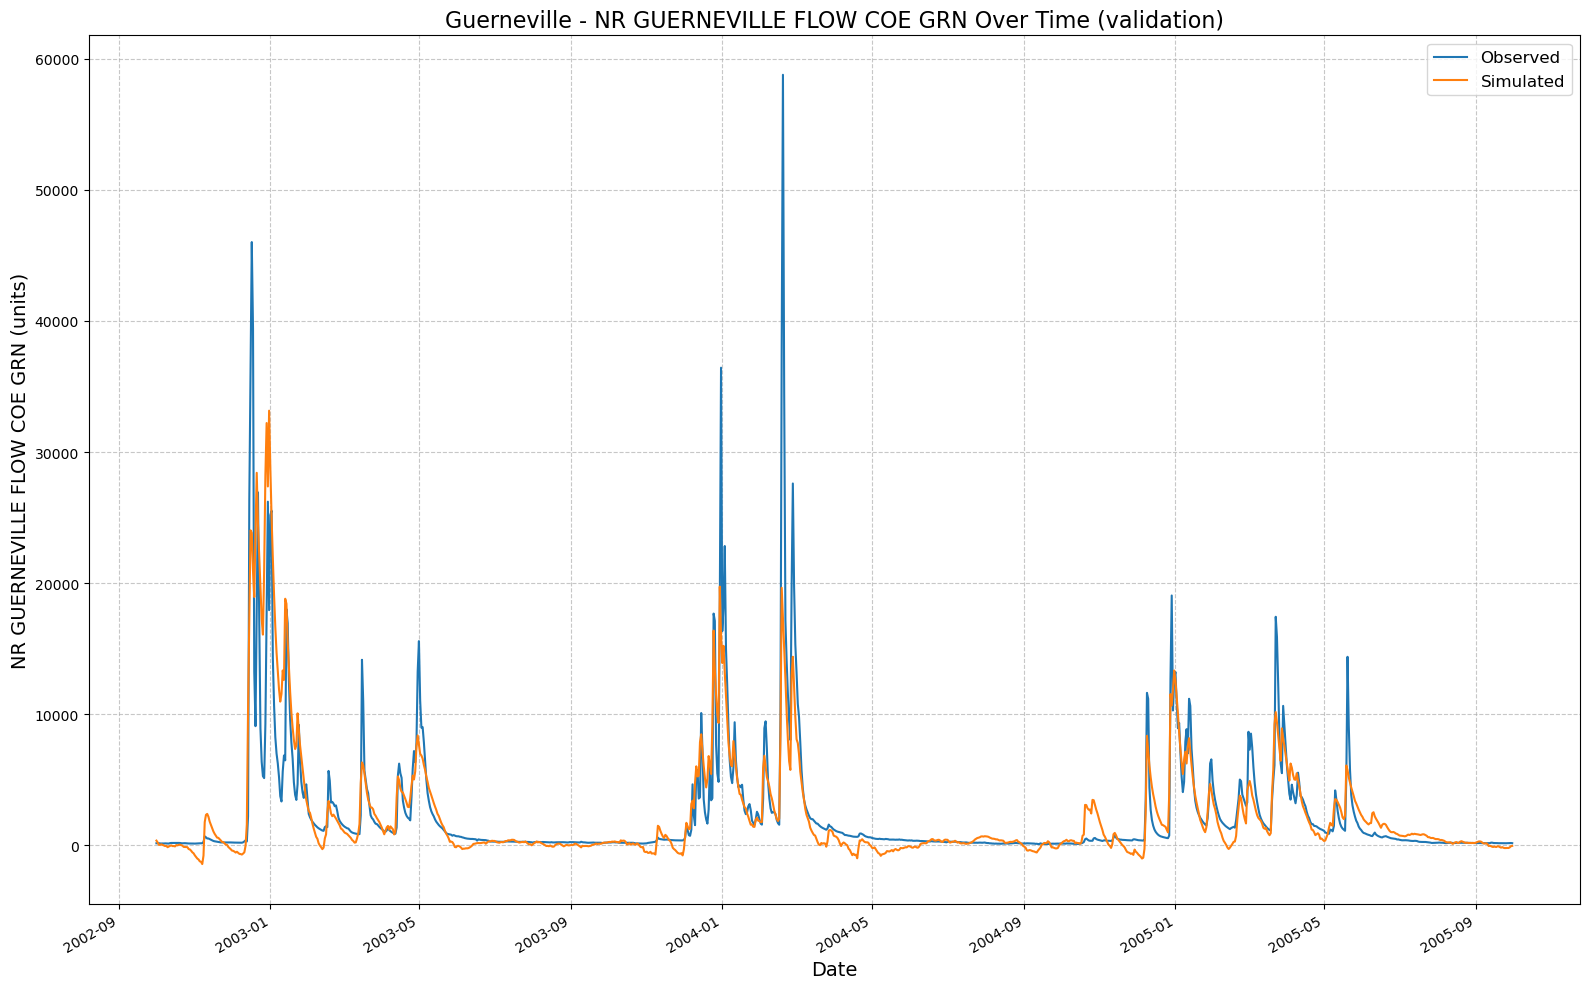

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220209/results_output_validation.csv


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


In [8]:
if run_gridsearch or not os.path.exists(hyperparam_csv_file):
    for (hs, seq, nl, ep) in itertools.product(
            hyperparam_space["hidden_size"],
            hyperparam_space["seq_length"],
            hyperparam_space["num_layers"],
            hyperparam_space["epochs"]
    ):
        hp = {
            "hidden_size": hs,
            "seq_length": seq,
            "num_layers": nl,
            "epochs": ep,
            "output_dropout": fixed_dropout,
        }
        print(f"NoPhysics: {hp}")
        trainer = UCB_trainer(
            path_to_csv_folder=path_to_csv,
            yaml_path=path_to_yaml,
            hyperparams=hp,
            input_features=None,
            physics_informed=False,
            physics_data_file=None,
            hourly=True,
            extend_train_period=False,
            gpu=-1
        )
        trainer.train()
        csv_path, metrics_dict = trainer.results()
        row_data = {"hidden_size": hs, "seq_length": seq, "num_layers": nl, "epochs": ep, "output_dropout": fixed_dropout}
        for k, v in metrics_dict.items():
            row_data[k] = v
        no_physics_results.append(row_data)
    df_no_physics = pd.DataFrame(no_physics_results)
    df_no_physics.sort_values(by="NSE", ascending=False, inplace=True)
    df_no_physics.reset_index(drop=True, inplace=True)
else:
    print("Skipping Grid-Search")

Physics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 22:04:19,423: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220419/output.log initialized.
2025-02-12 22:04:19,424: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220419
2025-02-12 22:04:19,424: ### Run configurations for testing_run
2025-02-12 22:04:19,425: experiment_name: testing_run
2025-02-12 22:04:19,425: train_basin_file: guerneville
2025-02-12 22:04:19,425: validation_basin_file: guerneville
2025-02-12 22:04:19,426: test_basin_file: guerneville
2025-02-12 22:04:19,426: train_start_date: 1994-10-01 00:00:00
2025-02-12 22:04:19,426: train_end_date: 2002-09-30 00:00:00
2025-02-12 22:04:19,427: validation_start_date: 2002-10-01 00:00:00
2025-02-12 22:04:19,427: validation_end_date: 2005-09-30 00:00:00
20

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]
2025-02-12 22:04:36,739: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220419/validation/model_epoch016/validation_metrics.csv
2025-02-12 22:04:36,740: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220419/validation/model_epoch016/validation_results.p
got predictions


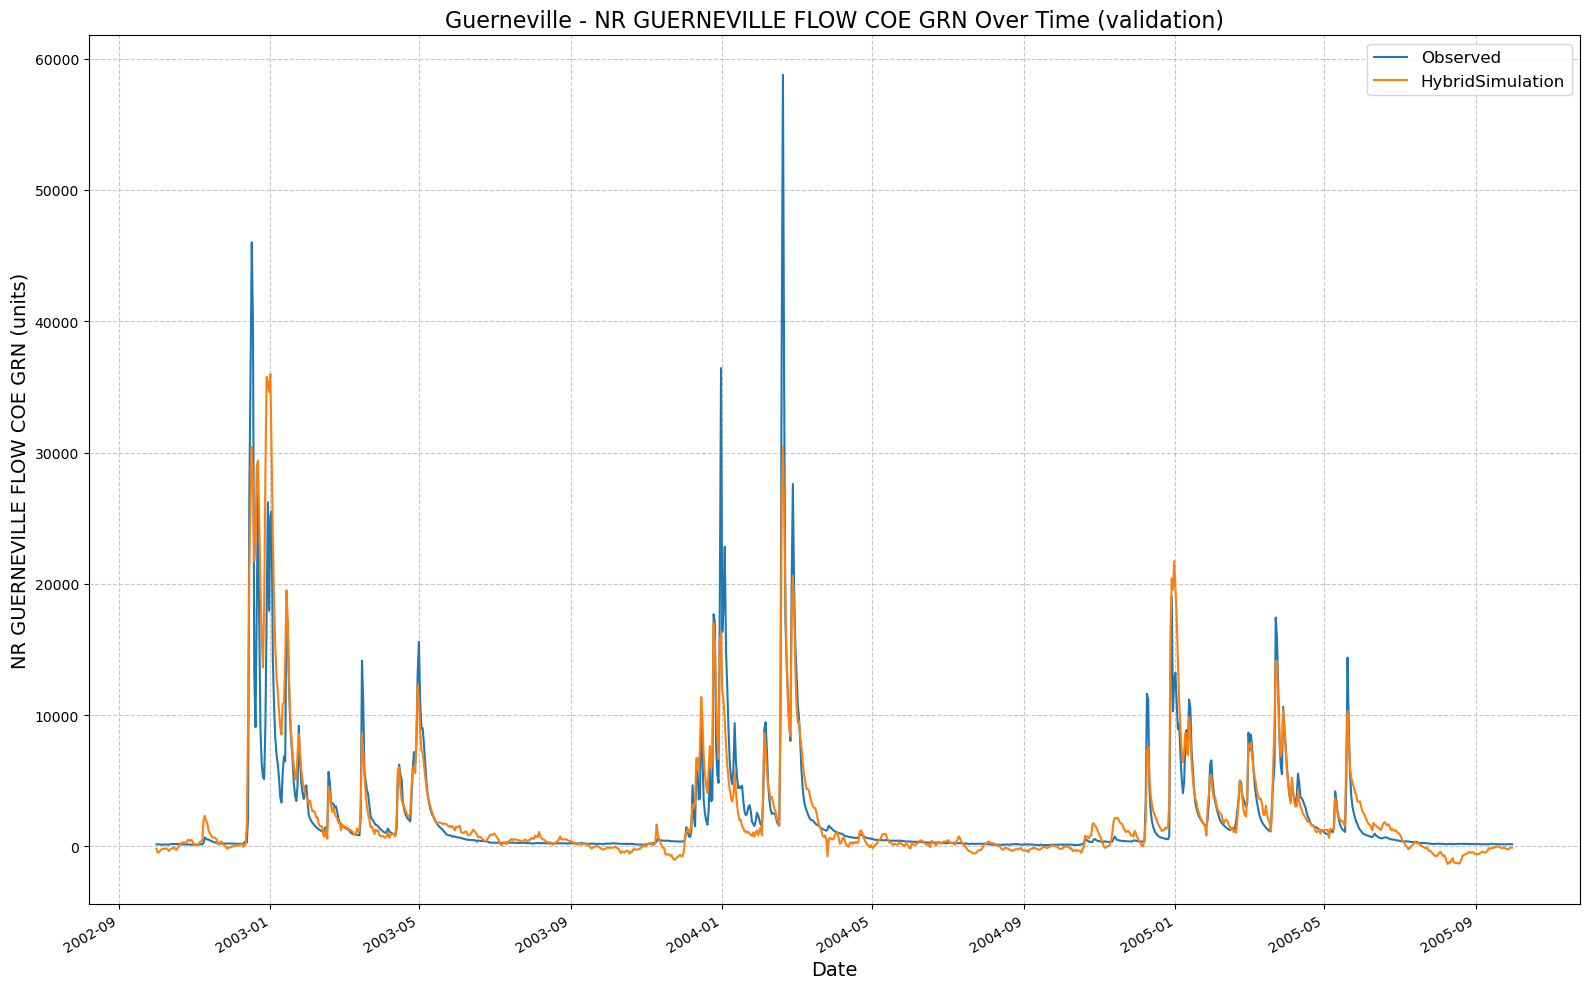

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220419/results_output_validation.csv
Physics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 22:04:36,919: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220436/output.log initialized.
2025-02-12 22:04:36,919: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220436
2025-02-12 22:04:36,919: ### Run configurations for testing_run
2025-02-12 22:04:36,920: experiment_name: testing_run
2025-02-12 22:04:36,920: train_basin_file: guerneville
2025-02-12 22:04:36,921: validation_basin_file: guerneville
2025-02-12 22:04:36,921: test_basin_file: guerneville
2025-02-12 22:04:36,921: train_start_date: 1994-10-01 00:00:00
2025-02-12 22:04:36,922: train_end_

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.35it/s]
2025-02-12 22:04:37,176: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 715.26it/s]
2025-02-12 22:04:37,191: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 12.35it/s, Loss: 0.0000]
2025-02-12 22:04:38,265: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 11.61it/s, Loss: 0.0000]
2025-02-12 22:04:39,214: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 12.52it/s, Loss: 0.0000]
2025-02-12 22:04:40,095: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 12.58it/s, Loss: 0.0000]
2025-02-12 22:04:40,971: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 12.72it/s, Loss: 0.0000]
2025-02-12 22:04:41,838: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]
2025-02-12 22:05:09,082: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220436/validation/model_epoch032/validation_metrics.csv
2025-02-12 22:05:09,083: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220436/validation/model_epoch032/validation_results.p
got predictions


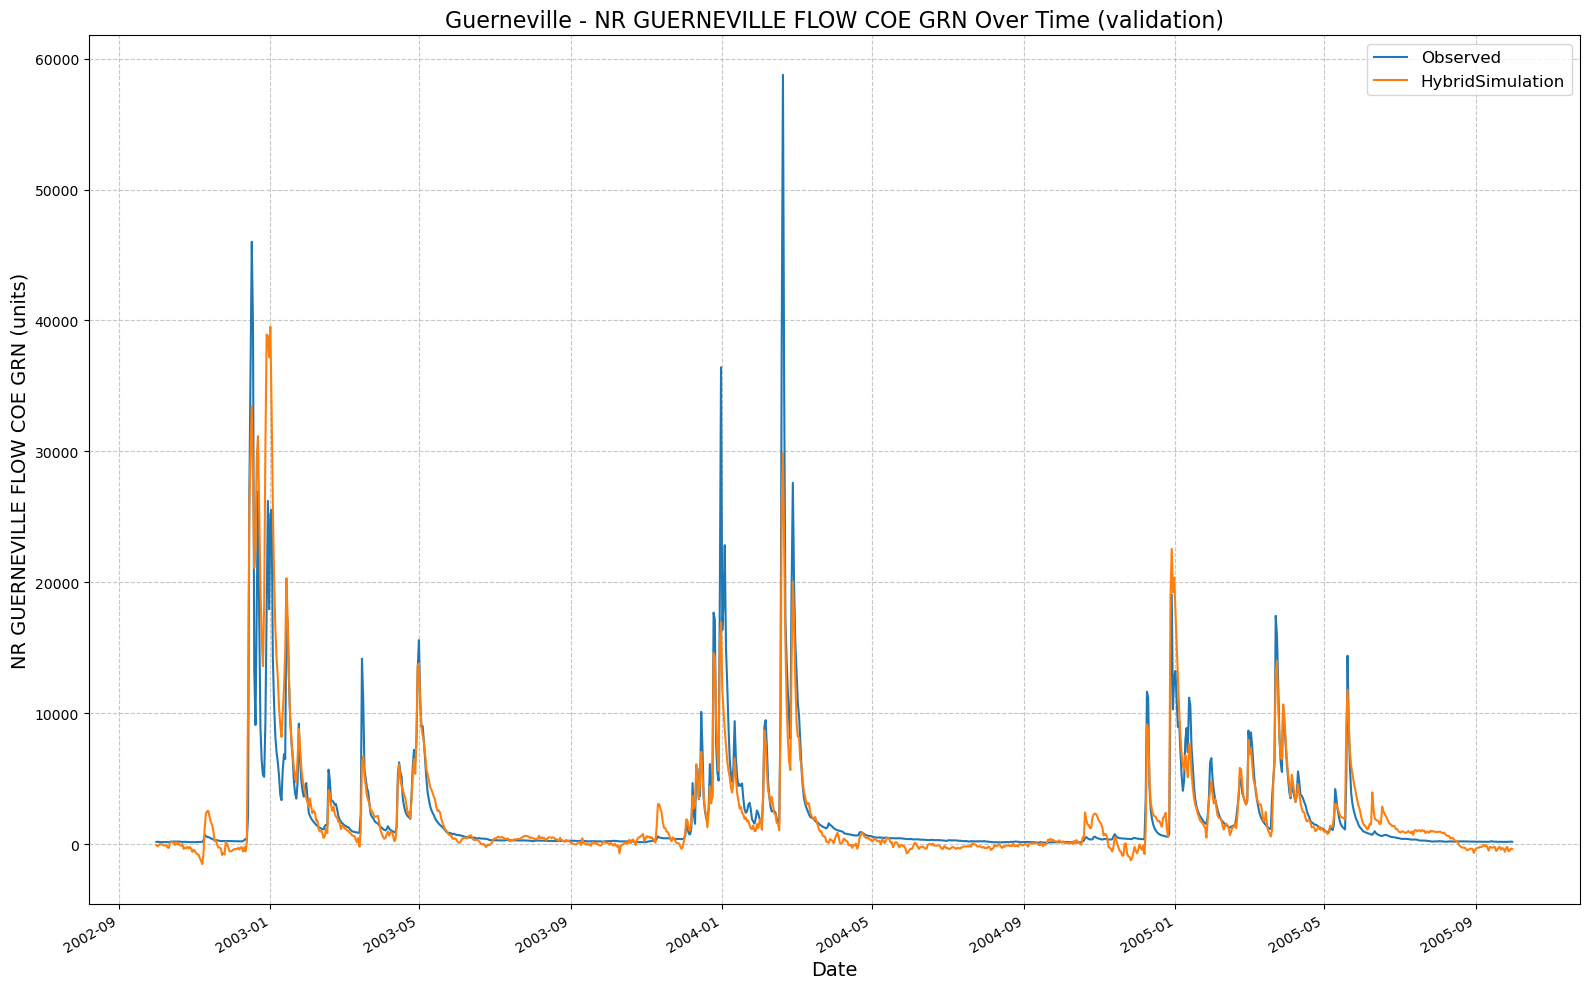

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220436/results_output_validation.csv
Physics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 22:05:09,271: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220509/output.log initialized.
2025-02-12 22:05:09,271: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220509
2025-02-12 22:05:09,272: ### Run configurations for testing_run
2025-02-12 22:05:09,272: experiment_name: testing_run
2025-02-12 22:05:09,272: train_basin_file: guerneville
2025-02-12 22:05:09,273: validation_basin_file: guerneville
2025-02-12 22:05:09,273: test_basin_file: guerneville
2025-02-12 22:05:09,273: train_start_date: 1994-10-01 00:00:00
2025-02-12 22:05:09,274: train_end_

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.64it/s]
2025-02-12 22:05:09,591: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 679.35it/s]
2025-02-12 22:05:09,606: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 12.27it/s, Loss: 0.0000]
2025-02-12 22:05:10,808: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 12.52it/s, Loss: 0.0000]
2025-02-12 22:05:11,689: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 12.65it/s, Loss: 0.0000]
2025-02-12 22:05:12,561: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 12.61it/s, Loss: 0.0000]
2025-02-12 22:05:13,435: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 12.42it/s, Loss: 0.0000]
2025-02-12 22:05:14,322: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]
2025-02-12 22:05:25,918: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220509/validation/model_epoch016/validation_metrics.csv
2025-02-12 22:05:25,919: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220509/validation/model_epoch016/validation_results.p
got predictions


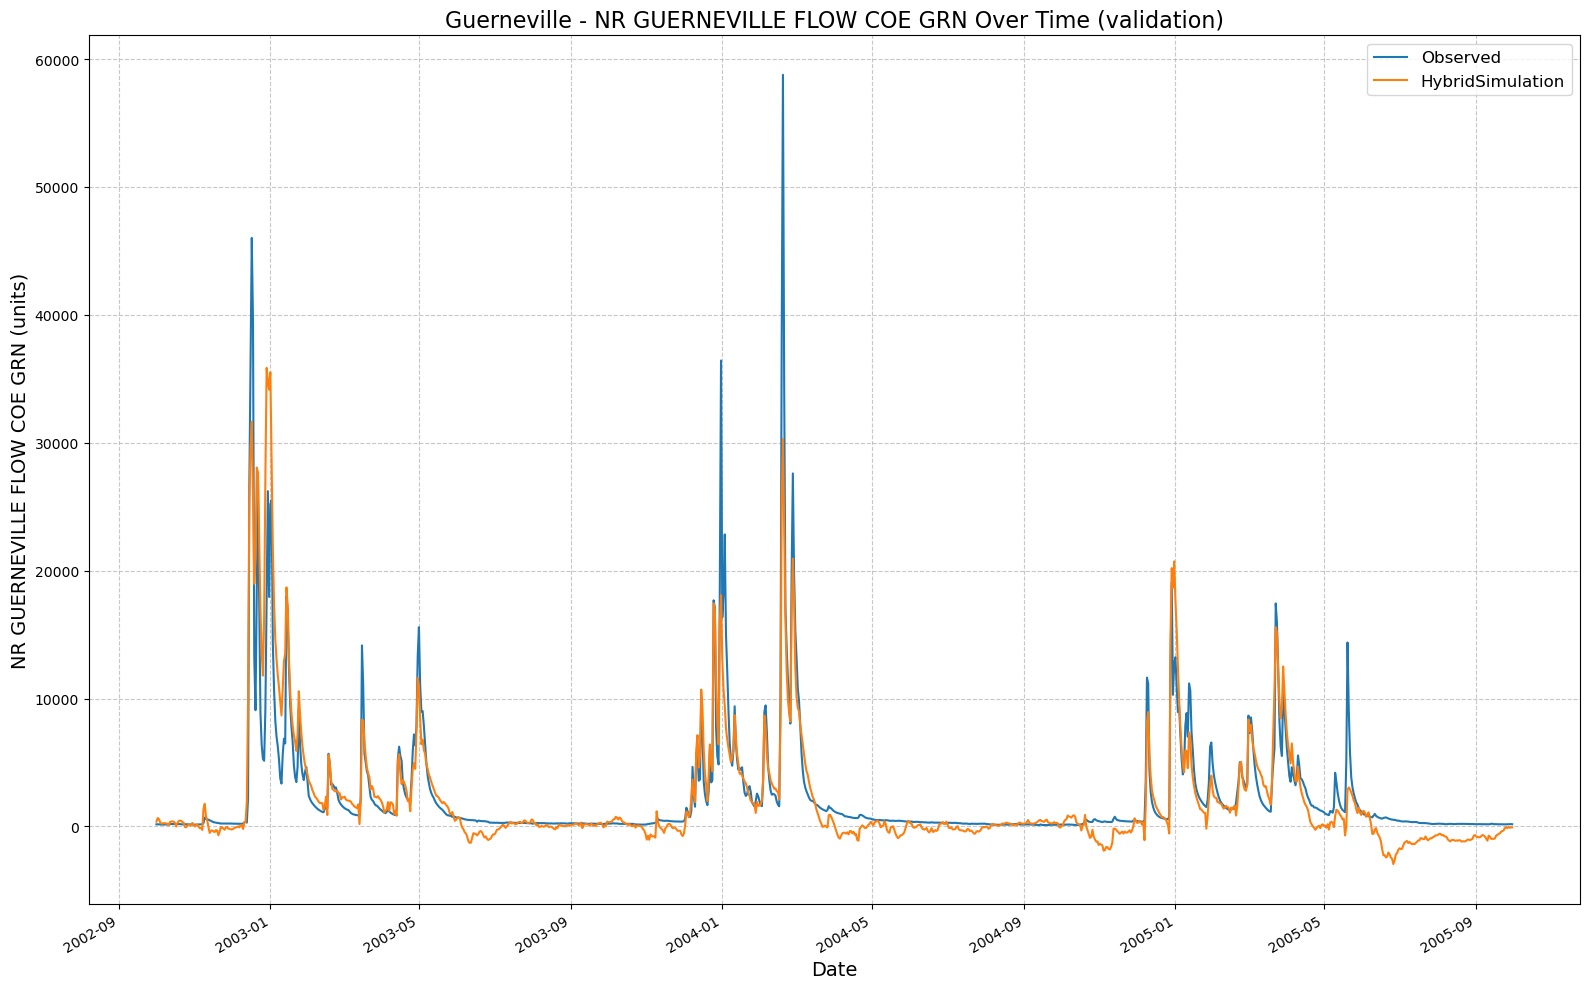

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220509/results_output_validation.csv
Physics: {'hidden_size': 128, 'seq_length': 90, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 22:05:26,099: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220526/output.log initialized.
2025-02-12 22:05:26,099: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220526
2025-02-12 22:05:26,099: ### Run configurations for testing_run
2025-02-12 22:05:26,100: experiment_name: testing_run
2025-02-12 22:05:26,100: train_basin_file: guerneville
2025-02-12 22:05:26,100: validation_basin_file: guerneville
2025-02-12 22:05:26,101: test_basin_file: guerneville
2025-02-12 22:05:26,101: train_start_date: 1994-10-01 00:00:00
2025-02-12 22:05:26,101: train_end_

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.42it/s]
2025-02-12 22:05:26,352: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 733.01it/s]
2025-02-12 22:05:26,365: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:00<00:00, 12.15it/s, Loss: 0.0000]
2025-02-12 22:05:27,438: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:00<00:00, 12.73it/s, Loss: 0.0000]
2025-02-12 22:05:28,304: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:00<00:00, 12.53it/s, Loss: 0.0000]
2025-02-12 22:05:29,183: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:00<00:00, 12.66it/s, Loss: 0.0000]
2025-02-12 22:05:30,054: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:00<00:00, 12.64it/s, Loss: 0.0000]
2025-02-12 22:05:30,926: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]
2025-02-12 22:05:58,465: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220526/validation/model_epoch032/validation_metrics.csv
2025-02-12 22:05:58,466: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220526/validation/model_epoch032/validation_results.p
got predictions


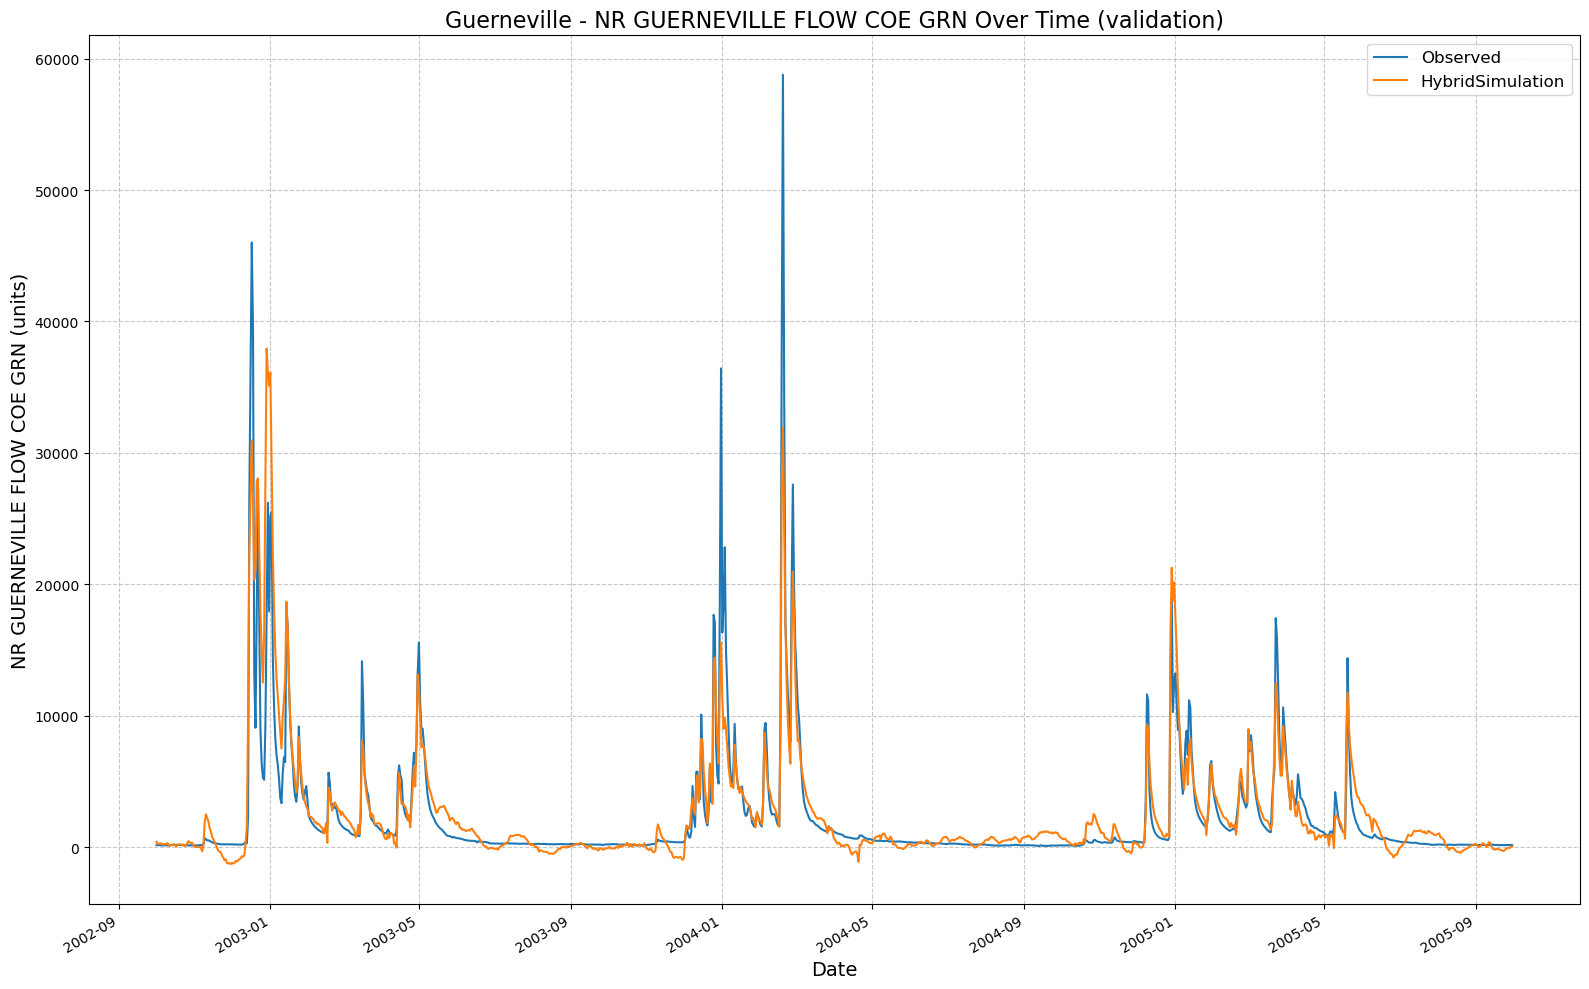

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220526/results_output_validation.csv
Physics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 22:05:58,646: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220558/output.log initialized.
2025-02-12 22:05:58,647: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220558
2025-02-12 22:05:58,647: ### Run configurations for testing_run
2025-02-12 22:05:58,648: experiment_name: testing_run
2025-02-12 22:05:58,648: train_basin_file: guerneville
2025-02-12 22:05:58,648: validation_basin_file: guerneville
2025-02-12 22:05:58,648: test_basin_file: guerneville
2025-02-12 22:05:58,649: train_start_date: 1994-10-01 00:00:00
2025-02-12 22:05:58,649: train_end

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.40it/s]
2025-02-12 22:05:58,901: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 793.17it/s]
2025-02-12 22:05:58,916: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.37it/s, Loss: 0.0000]
2025-02-12 22:06:00,851: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.43it/s, Loss: 0.0000]
2025-02-12 22:06:02,564: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.72it/s, Loss: 0.0000]
2025-02-12 22:06:04,204: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.71it/s, Loss: 0.0000]
2025-02-12 22:06:05,844: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.73it/s, Loss: 0.0000]
2025-02-12 22:06:07,482: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]
2025-02-12 22:06:28,880: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220558/validation/model_epoch016/validation_metrics.csv
2025-02-12 22:06:28,882: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220558/validation/model_epoch016/validation_results.p
got predictions


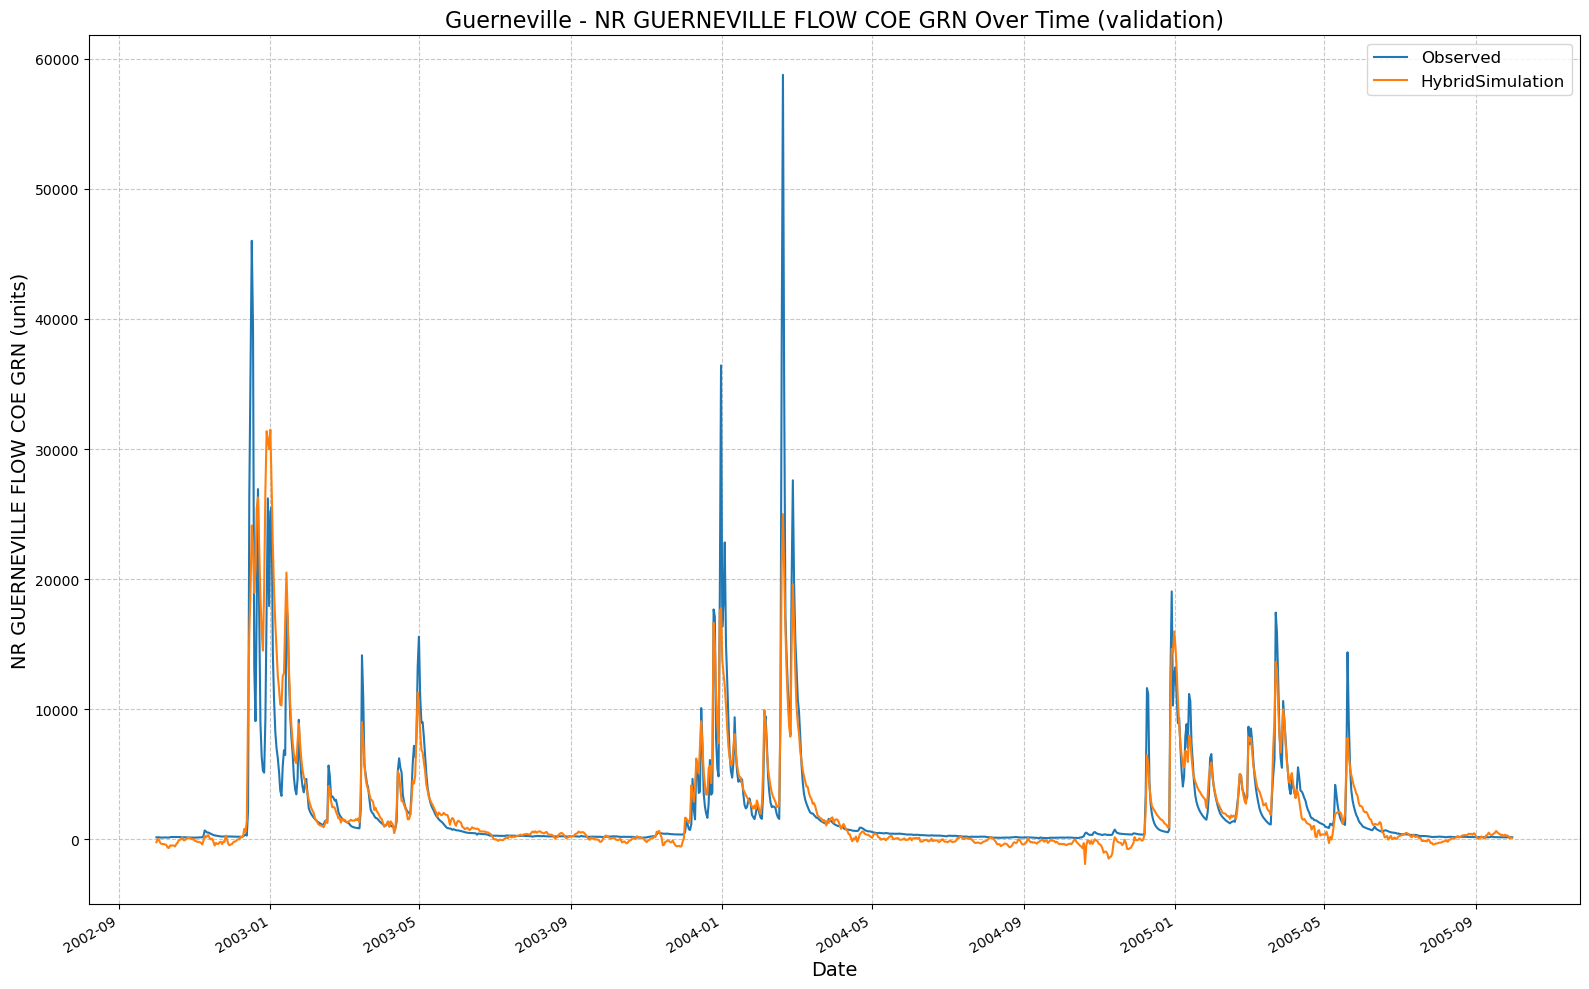

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220558/results_output_validation.csv
Physics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 22:06:29,061: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220629/output.log initialized.
2025-02-12 22:06:29,061: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220629
2025-02-12 22:06:29,061: ### Run configurations for testing_run
2025-02-12 22:06:29,062: experiment_name: testing_run
2025-02-12 22:06:29,062: train_basin_file: guerneville
2025-02-12 22:06:29,063: validation_basin_file: guerneville
2025-02-12 22:06:29,063: test_basin_file: guerneville
2025-02-12 22:06:29,063: train_start_date: 1994-10-01 00:00:00
2025-02-12 22:06:29,063: train_end

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.46it/s]
2025-02-12 22:06:29,314: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 793.02it/s]
2025-02-12 22:06:29,328: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.69it/s, Loss: 0.0000]
2025-02-12 22:06:31,184: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.62it/s, Loss: 0.0000]
2025-02-12 22:06:32,847: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.78it/s, Loss: 0.0000]
2025-02-12 22:06:34,471: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.67it/s, Loss: 0.0000]
2025-02-12 22:06:36,122: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.70it/s, Loss: 0.0000]
2025-02-12 22:06:37,765: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]
2025-02-12 22:07:27,593: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220629/validation/model_epoch032/validation_metrics.csv
2025-02-12 22:07:27,593: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220629/validation/model_epoch032/validation_results.p
got predictions


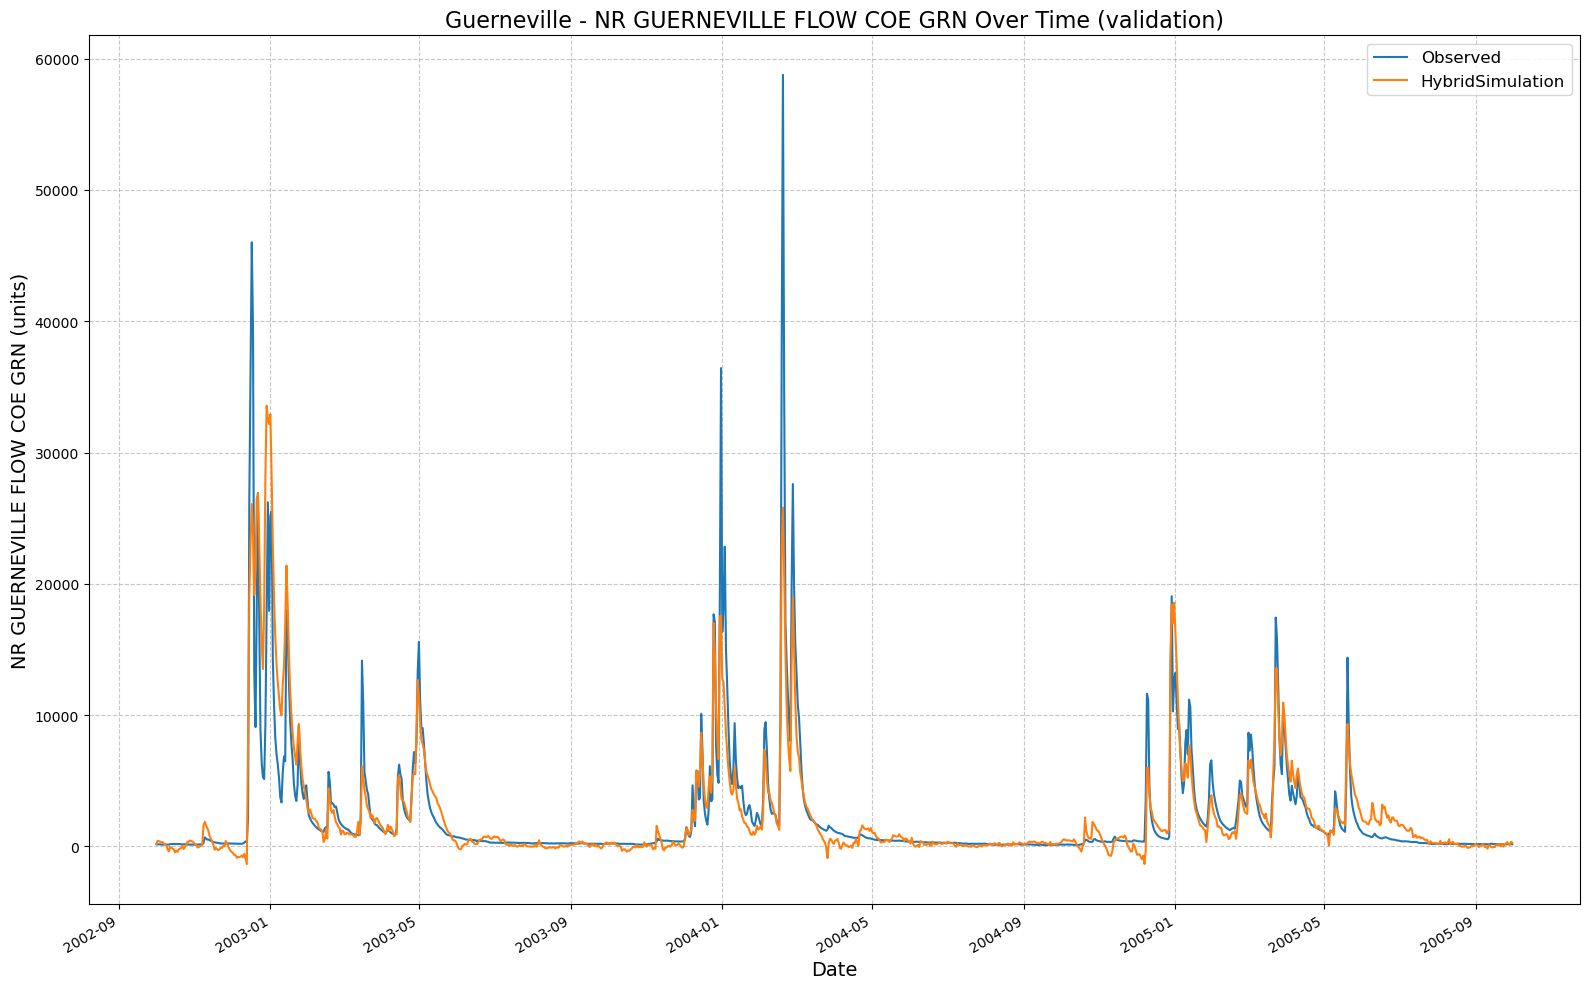

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220629/results_output_validation.csv
Physics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 22:07:27,773: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220727/output.log initialized.
2025-02-12 22:07:27,773: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220727
2025-02-12 22:07:27,773: ### Run configurations for testing_run
2025-02-12 22:07:27,774: experiment_name: testing_run
2025-02-12 22:07:27,774: train_basin_file: guerneville
2025-02-12 22:07:27,775: validation_basin_file: guerneville
2025-02-12 22:07:27,775: test_basin_file: guerneville
2025-02-12 22:07:27,775: train_start_date: 1994-10-01 00:00:00
2025-02-12 22:07:27,775: train_end

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.37it/s]
2025-02-12 22:07:28,035: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 818.40it/s]
2025-02-12 22:07:28,048: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.49it/s, Loss: 0.0000]
2025-02-12 22:07:29,946: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.68it/s, Loss: 0.0000]
2025-02-12 22:07:31,595: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.70it/s, Loss: 0.0000]
2025-02-12 22:07:33,239: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.73it/s, Loss: 0.0000]
2025-02-12 22:07:34,876: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.71it/s, Loss: 0.0000]
2025-02-12 22:07:36,517: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.63it/s]
2025-02-12 22:07:57,707: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220727/validation/model_epoch016/validation_metrics.csv
2025-02-12 22:07:57,708: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220727/validation/model_epoch016/validation_results.p
got predictions


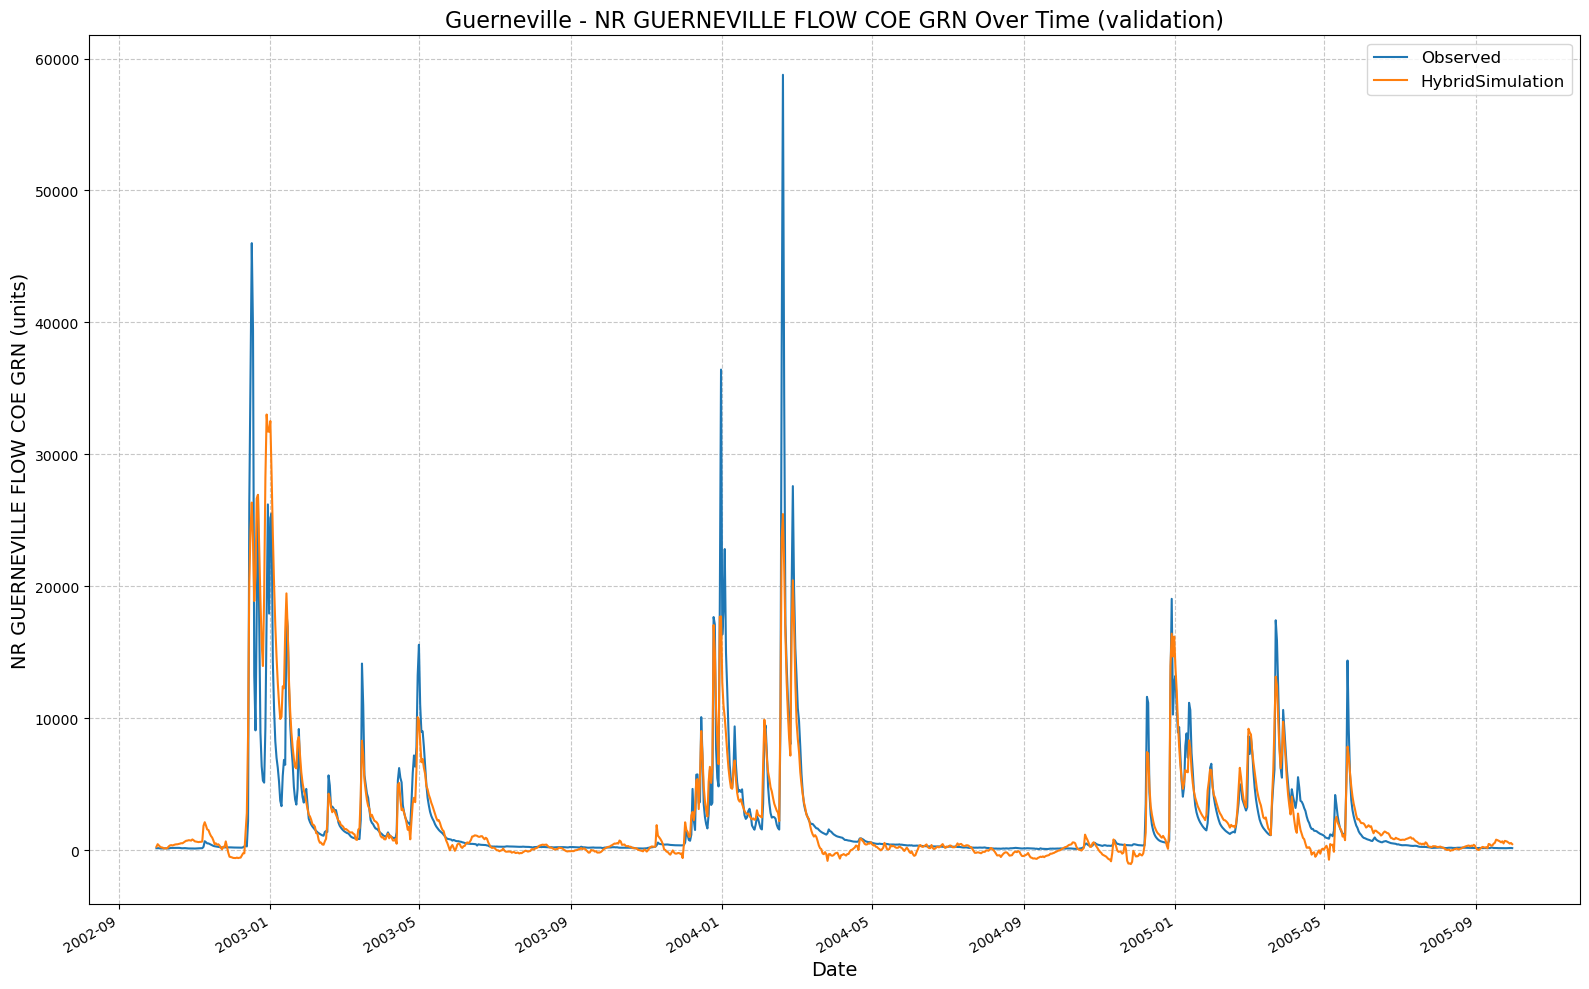

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220727/results_output_validation.csv
Physics: {'hidden_size': 128, 'seq_length': 180, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 22:07:57,893: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220757/output.log initialized.
2025-02-12 22:07:57,893: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220757
2025-02-12 22:07:57,893: ### Run configurations for testing_run
2025-02-12 22:07:57,893: experiment_name: testing_run
2025-02-12 22:07:57,894: train_basin_file: guerneville
2025-02-12 22:07:57,894: validation_basin_file: guerneville
2025-02-12 22:07:57,895: test_basin_file: guerneville
2025-02-12 22:07:57,895: train_start_date: 1994-10-01 00:00:00
2025-02-12 22:07:57,895: train_end

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.19it/s]
2025-02-12 22:07:58,242: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 487.54it/s]
2025-02-12 22:07:58,258: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.45it/s, Loss: 0.0000]
2025-02-12 22:08:00,173: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.65it/s, Loss: 0.0000]
2025-02-12 22:08:01,829: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.68it/s, Loss: 0.0000]
2025-02-12 22:08:03,478: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.71it/s, Loss: 0.0000]
2025-02-12 22:08:05,119: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.68it/s, Loss: 0.0000]
2025-02-12 22:08:06,768: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]
2025-02-12 22:08:56,491: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220757/validation/model_epoch032/validation_metrics.csv
2025-02-12 22:08:56,491: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220757/validation/model_epoch032/validation_results.p
got predictions


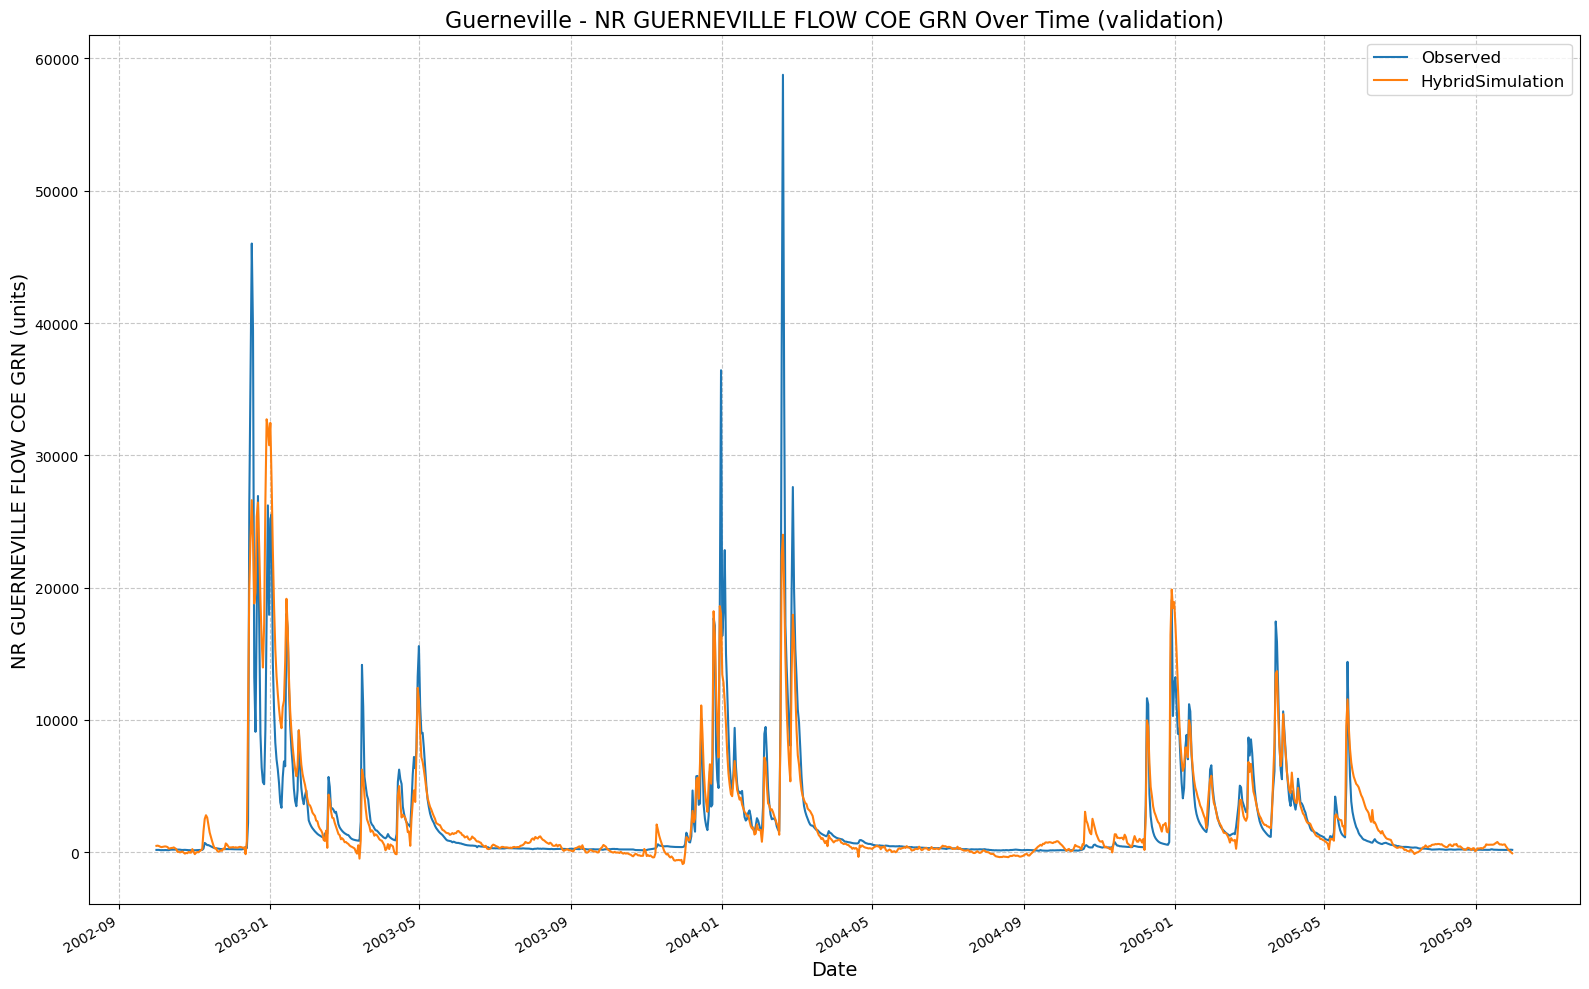

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220757/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 22:08:56,674: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220856/output.log initialized.
2025-02-12 22:08:56,674: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220856
2025-02-12 22:08:56,675: ### Run configurations for testing_run
2025-02-12 22:08:56,675: experiment_name: testing_run
2025-02-12 22:08:56,675: train_basin_file: guerneville
2025-02-12 22:08:56,675: validation_basin_file: guerneville
2025-02-12 22:08:56,676: test_basin_file: guerneville
2025-02-12 22:08:56,676: train_start_date: 1994-10-01 00:00:00
2025-02-12 22:08:56,676: train_end_

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.39it/s]
2025-02-12 22:08:57,002: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 658.76it/s]
2025-02-12 22:08:57,016: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.08it/s, Loss: 0.0000]
2025-02-12 22:08:59,008: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.27it/s, Loss: 0.0000]
2025-02-12 22:09:00,763: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.26it/s, Loss: 0.0000]
2025-02-12 22:09:02,522: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.38it/s, Loss: 0.0000]
2025-02-12 22:09:04,249: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.42it/s, Loss: 0.0000]
2025-02-12 22:09:05,965: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]
2025-02-12 22:09:27,707: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220856/validation/model_epoch016/validation_metrics.csv
2025-02-12 22:09:27,708: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220856/validation/model_epoch016/validation_results.p
got predictions


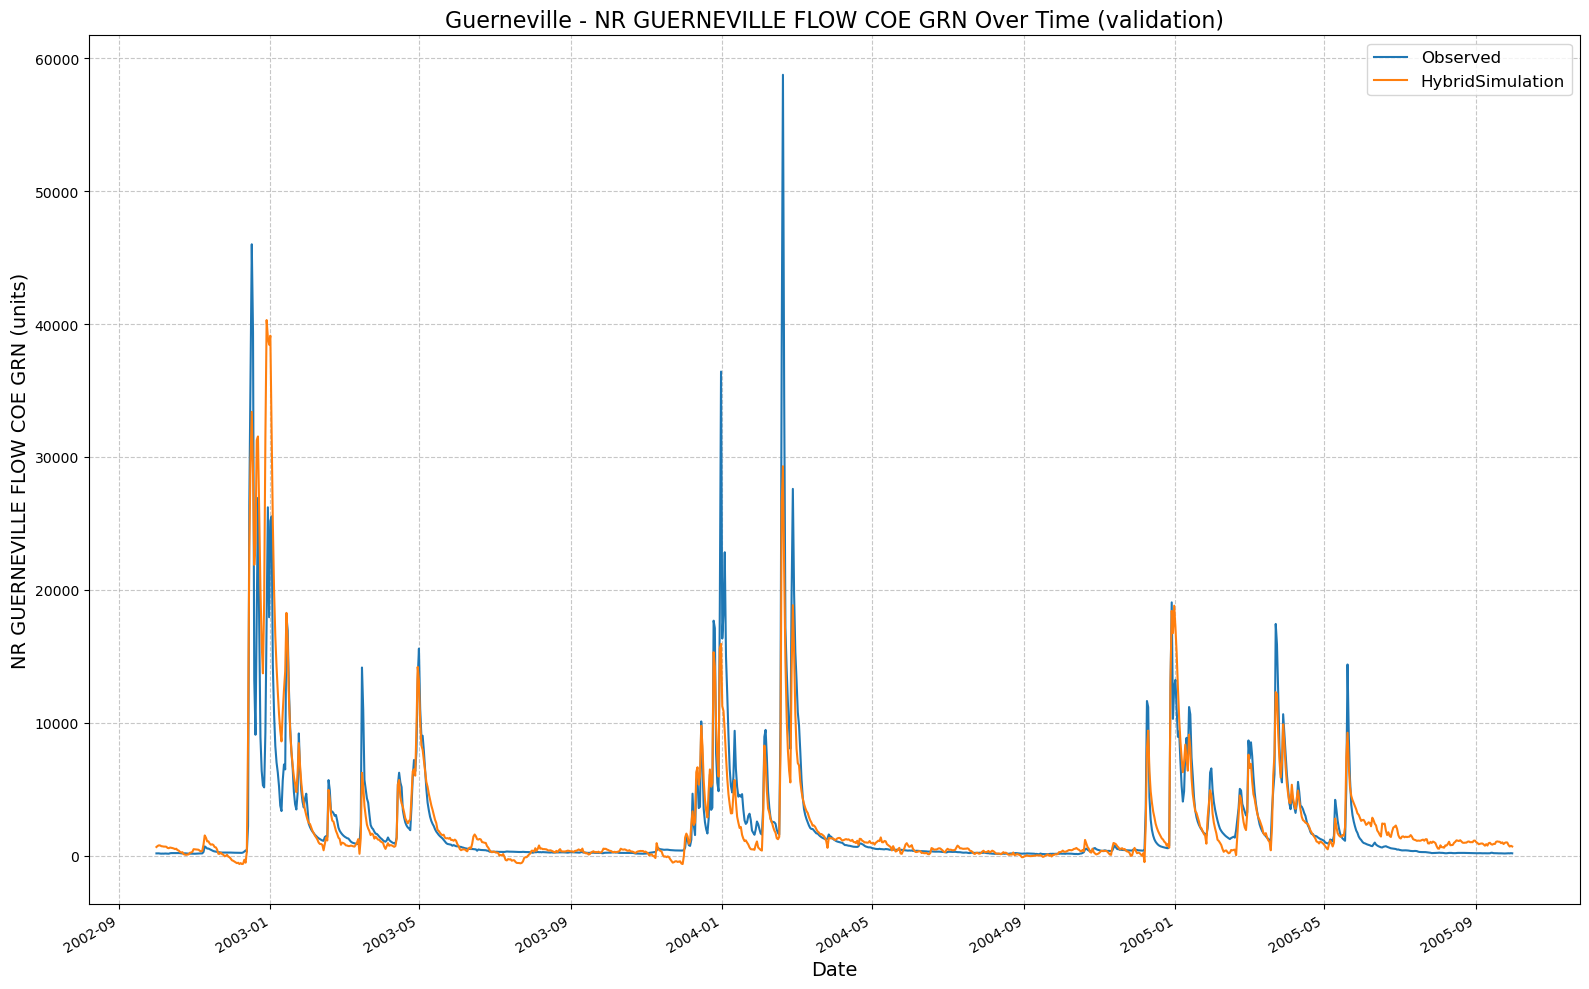

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220856/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 22:09:27,887: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220927/output.log initialized.
2025-02-12 22:09:27,887: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220927
2025-02-12 22:09:27,887: ### Run configurations for testing_run
2025-02-12 22:09:27,888: experiment_name: testing_run
2025-02-12 22:09:27,888: train_basin_file: guerneville
2025-02-12 22:09:27,888: validation_basin_file: guerneville
2025-02-12 22:09:27,888: test_basin_file: guerneville
2025-02-12 22:09:27,889: train_start_date: 1994-10-01 00:00:00
2025-02-12 22:09:27,889: train_end_

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.32it/s]
2025-02-12 22:09:28,147: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 755.32it/s]
2025-02-12 22:09:28,162: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.22it/s, Loss: 0.0000]
2025-02-12 22:09:30,106: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.32it/s, Loss: 0.0000]
2025-02-12 22:09:31,848: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.26it/s, Loss: 0.0000]
2025-02-12 22:09:33,606: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.37it/s, Loss: 0.0000]
2025-02-12 22:09:35,334: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.27it/s, Loss: 0.0000]
2025-02-12 22:09:37,091: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]
2025-02-12 22:10:29,359: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220927/validation/model_epoch032/validation_metrics.csv
2025-02-12 22:10:29,359: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220927/validation/model_epoch032/validation_results.p
got predictions


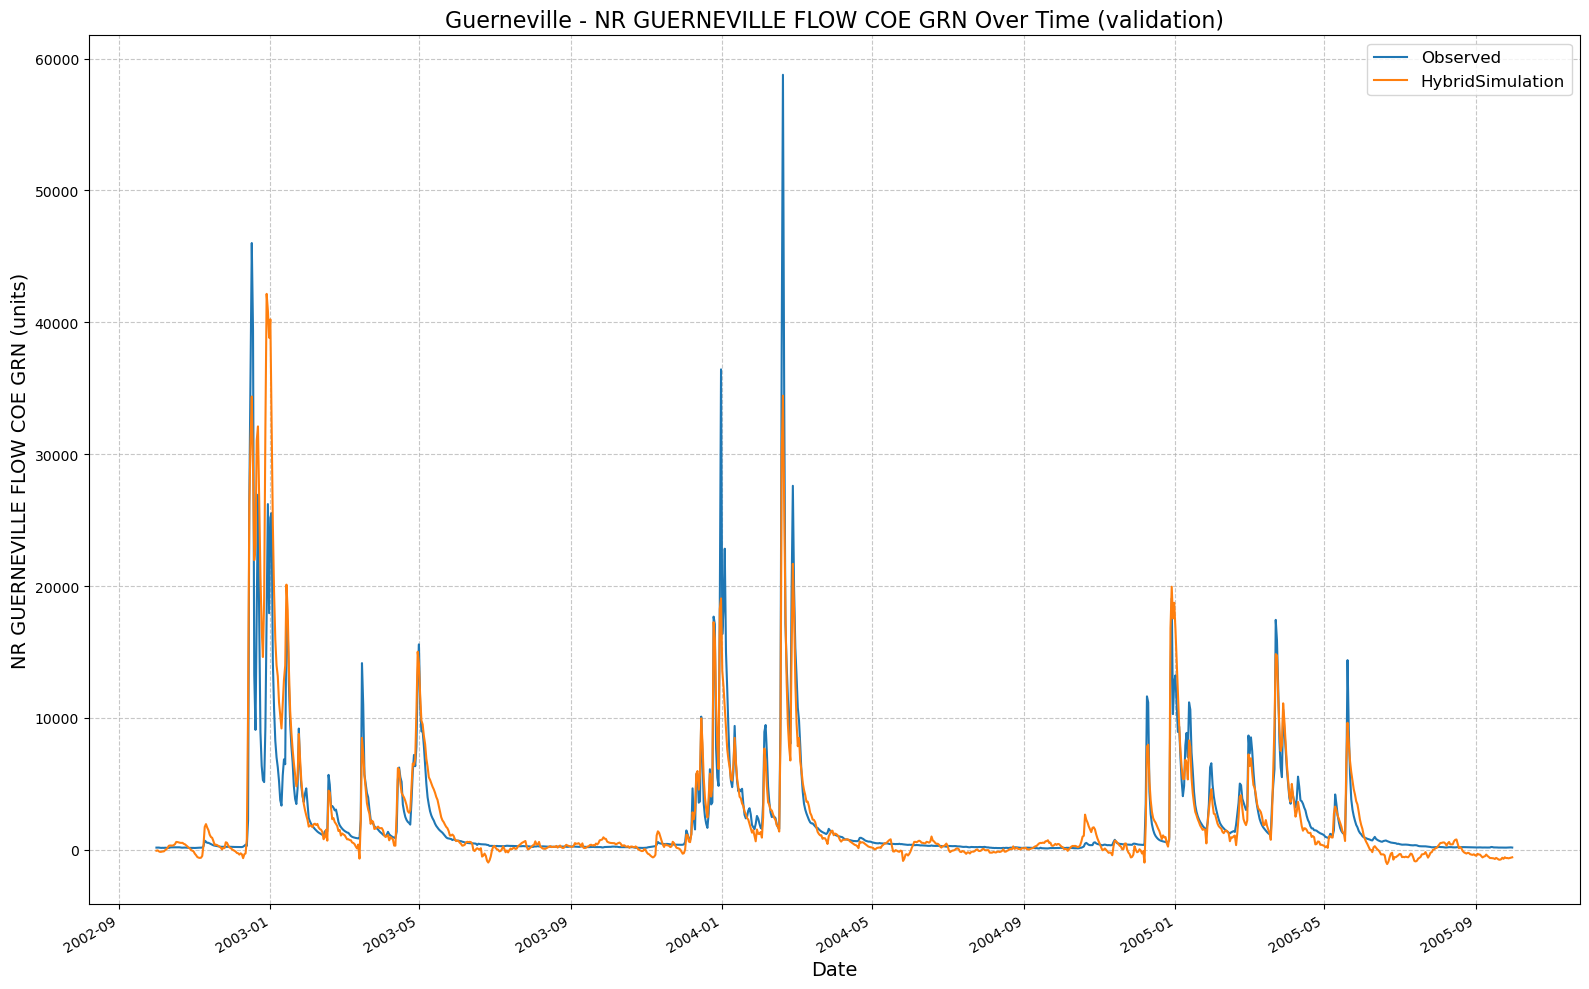

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_220927/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 22:10:29,538: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221029/output.log initialized.
2025-02-12 22:10:29,538: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221029
2025-02-12 22:10:29,539: ### Run configurations for testing_run
2025-02-12 22:10:29,539: experiment_name: testing_run
2025-02-12 22:10:29,539: train_basin_file: guerneville
2025-02-12 22:10:29,540: validation_basin_file: guerneville
2025-02-12 22:10:29,540: test_basin_file: guerneville
2025-02-12 22:10:29,540: train_start_date: 1994-10-01 00:00:00
2025-02-12 22:10:29,540: train_end_

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.02it/s]
2025-02-12 22:10:29,831: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 320.42it/s]
2025-02-12 22:10:29,864: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  5.98it/s, Loss: 0.0000]
2025-02-12 22:10:31,907: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.16it/s, Loss: 0.0000]
2025-02-12 22:10:33,697: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.08it/s, Loss: 0.0000]
2025-02-12 22:10:35,507: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:01<00:00,  6.10it/s, Loss: 0.0000]
2025-02-12 22:10:37,314: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.24it/s, Loss: 0.0000]
2025-02-12 22:10:39,078: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.42it/s]
2025-02-12 22:11:01,626: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221029/validation/model_epoch016/validation_metrics.csv
2025-02-12 22:11:01,626: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221029/validation/model_epoch016/validation_results.p
got predictions


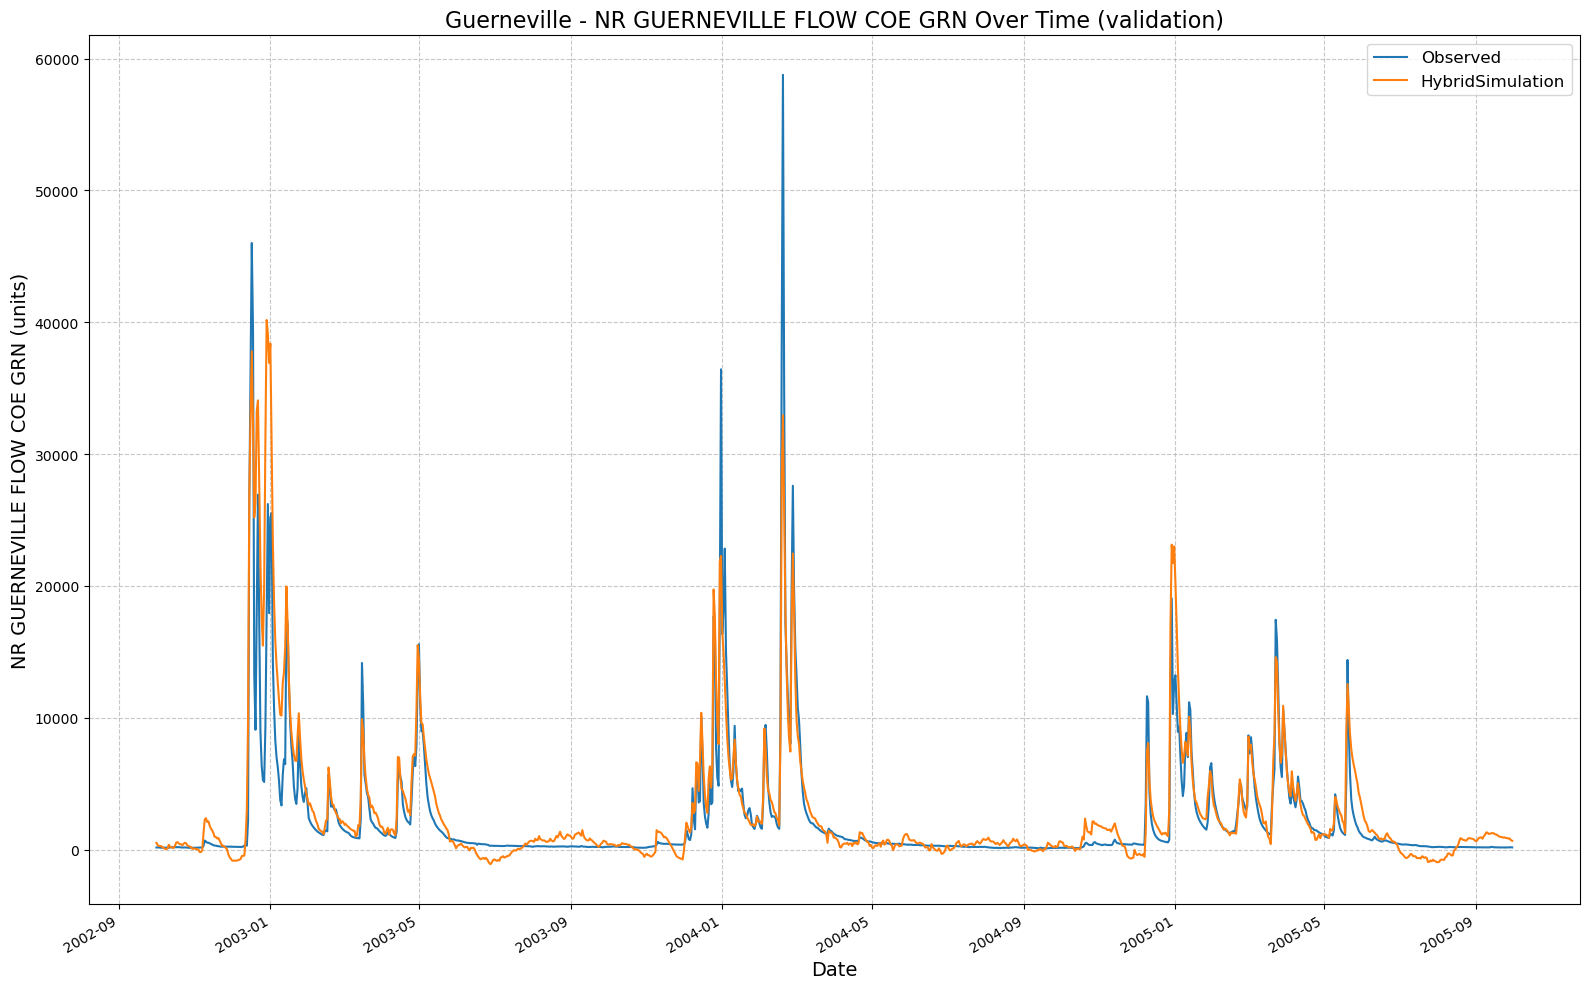

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221029/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 90, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 22:11:01,808: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221101/output.log initialized.
2025-02-12 22:11:01,808: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221101
2025-02-12 22:11:01,809: ### Run configurations for testing_run
2025-02-12 22:11:01,809: experiment_name: testing_run
2025-02-12 22:11:01,809: train_basin_file: guerneville
2025-02-12 22:11:01,810: validation_basin_file: guerneville
2025-02-12 22:11:01,810: test_basin_file: guerneville
2025-02-12 22:11:01,810: train_start_date: 1994-10-01 00:00:00
2025-02-12 22:11:01,810: train_end_

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.27it/s]
2025-02-12 22:11:02,073: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 801.97it/s]
2025-02-12 22:11:02,087: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:01<00:00,  6.04it/s, Loss: 0.0000]
2025-02-12 22:11:04,085: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:01<00:00,  6.13it/s, Loss: 0.0000]
2025-02-12 22:11:05,882: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:01<00:00,  6.20it/s, Loss: 0.0000]
2025-02-12 22:11:08,420: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:02<00:00,  5.32it/s, Loss: 0.0000]
2025-02-12 22:11:10,696: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:01<00:00,  6.29it/s, Loss: 0.0000]
2025-02-12 22:11:12,497: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.55it/s]
2025-02-12 22:12:05,975: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221101/validation/model_epoch032/validation_metrics.csv
2025-02-12 22:12:05,976: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221101/validation/model_epoch032/validation_results.p
got predictions


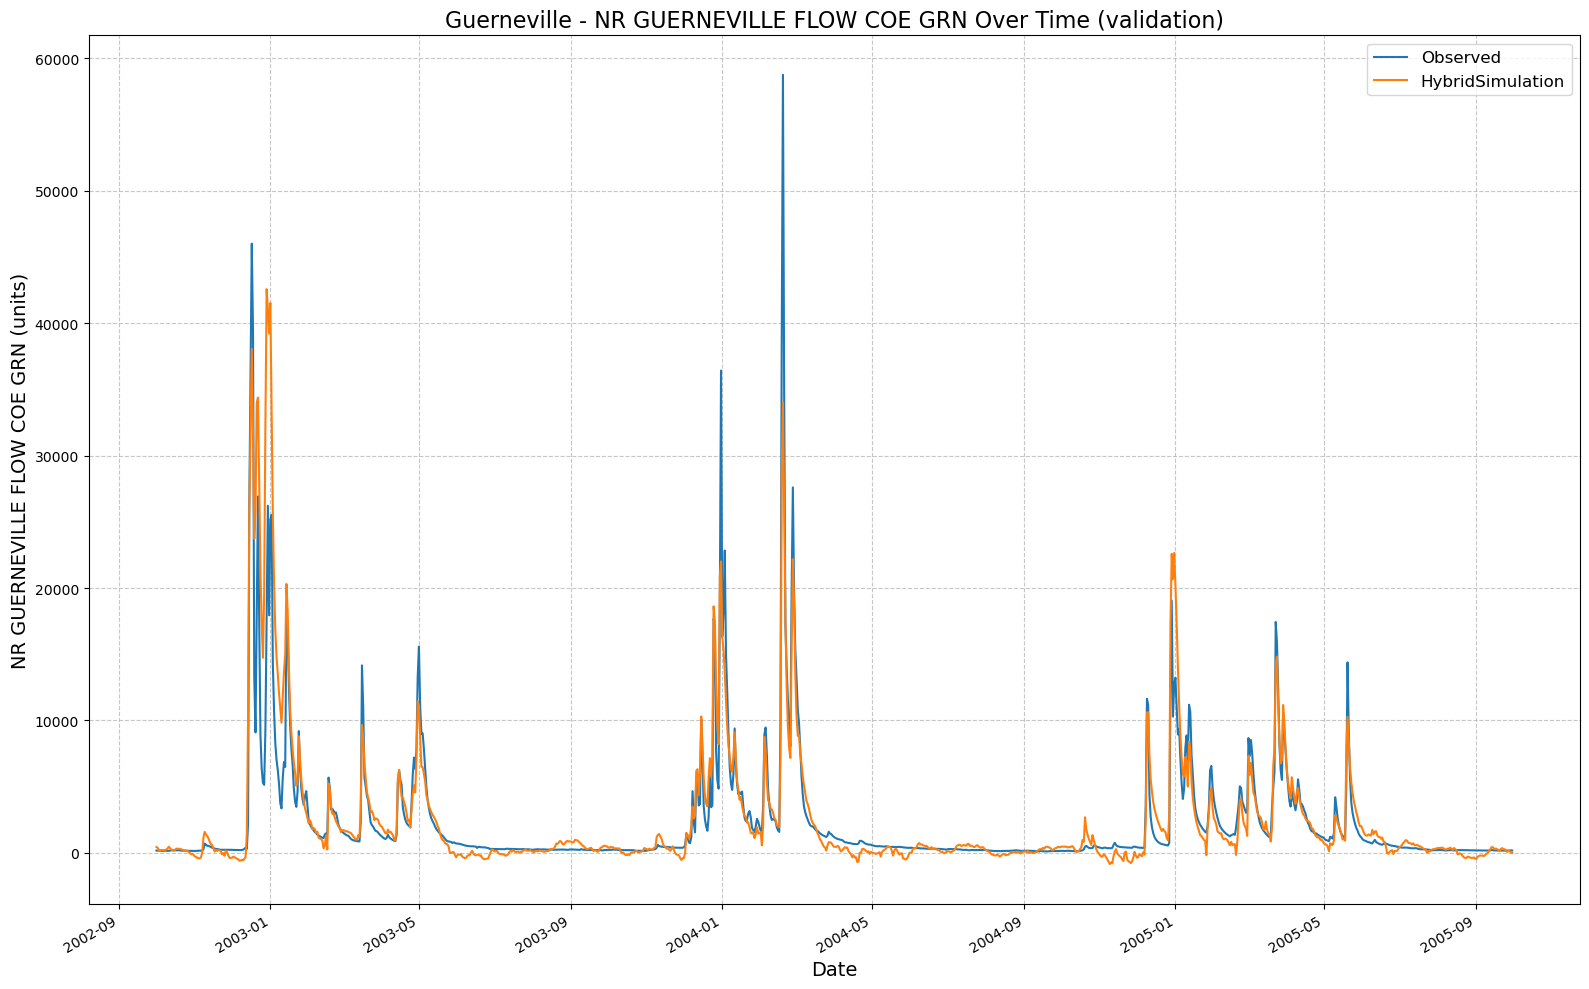

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221101/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 1, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 22:12:06,171: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221206/output.log initialized.
2025-02-12 22:12:06,172: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221206
2025-02-12 22:12:06,172: ### Run configurations for testing_run
2025-02-12 22:12:06,173: experiment_name: testing_run
2025-02-12 22:12:06,173: train_basin_file: guerneville
2025-02-12 22:12:06,173: validation_basin_file: guerneville
2025-02-12 22:12:06,174: test_basin_file: guerneville
2025-02-12 22:12:06,174: train_start_date: 1994-10-01 00:00:00
2025-02-12 22:12:06,174: train_end

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.59it/s]
2025-02-12 22:12:06,503: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 569.41it/s]
2025-02-12 22:12:06,541: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:03<00:00,  2.80it/s, Loss: 0.0000]
2025-02-12 22:12:10,711: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:03<00:00,  3.00it/s, Loss: 0.0000]
2025-02-12 22:12:14,377: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:03<00:00,  3.06it/s, Loss: 0.0000]
2025-02-12 22:12:17,975: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:03<00:00,  3.08it/s, Loss: 0.0000]
2025-02-12 22:12:21,550: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:03<00:00,  2.76it/s, Loss: 0.0000]
2025-02-12 22:12:25,543: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]
2025-02-12 22:13:10,649: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221206/validation/model_epoch016/validation_metrics.csv
2025-02-12 22:13:10,650: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221206/validation/model_epoch016/validation_results.p
got predictions


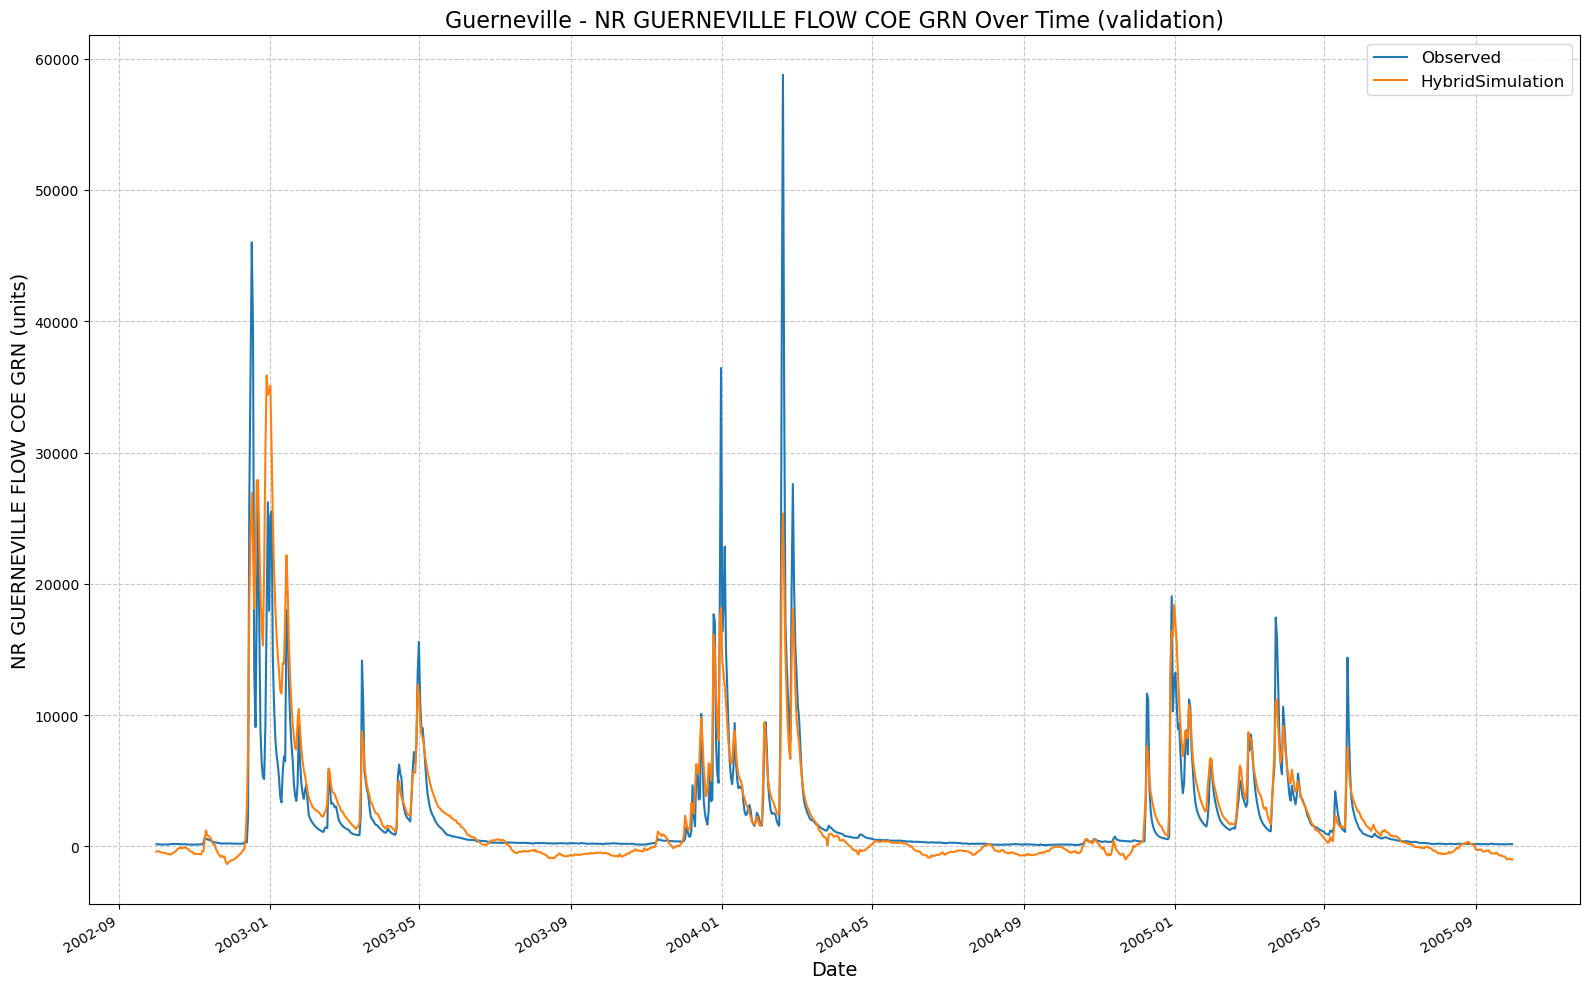

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221206/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 1, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 22:13:10,836: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221310/output.log initialized.
2025-02-12 22:13:10,836: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221310
2025-02-12 22:13:10,836: ### Run configurations for testing_run
2025-02-12 22:13:10,837: experiment_name: testing_run
2025-02-12 22:13:10,837: train_basin_file: guerneville
2025-02-12 22:13:10,837: validation_basin_file: guerneville
2025-02-12 22:13:10,838: test_basin_file: guerneville
2025-02-12 22:13:10,838: train_start_date: 1994-10-01 00:00:00
2025-02-12 22:13:10,838: train_end

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  4.30it/s]
2025-02-12 22:13:11,101: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 699.75it/s]
2025-02-12 22:13:11,115: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:03<00:00,  2.87it/s, Loss: 0.0000]
2025-02-12 22:13:15,218: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:03<00:00,  3.07it/s, Loss: 0.0000]
2025-02-12 22:13:18,804: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:03<00:00,  3.06it/s, Loss: 0.0000]
2025-02-12 22:13:22,397: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:03<00:00,  2.75it/s, Loss: 0.0000]
2025-02-12 22:13:26,392: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:03<00:00,  2.95it/s, Loss: 0.0000]
2025-02-12 22:13:30,128: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]
2025-02-12 22:15:16,687: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221310/validation/model_epoch032/validation_metrics.csv
2025-02-12 22:15:16,688: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221310/validation/model_epoch032/validation_results.p
got predictions


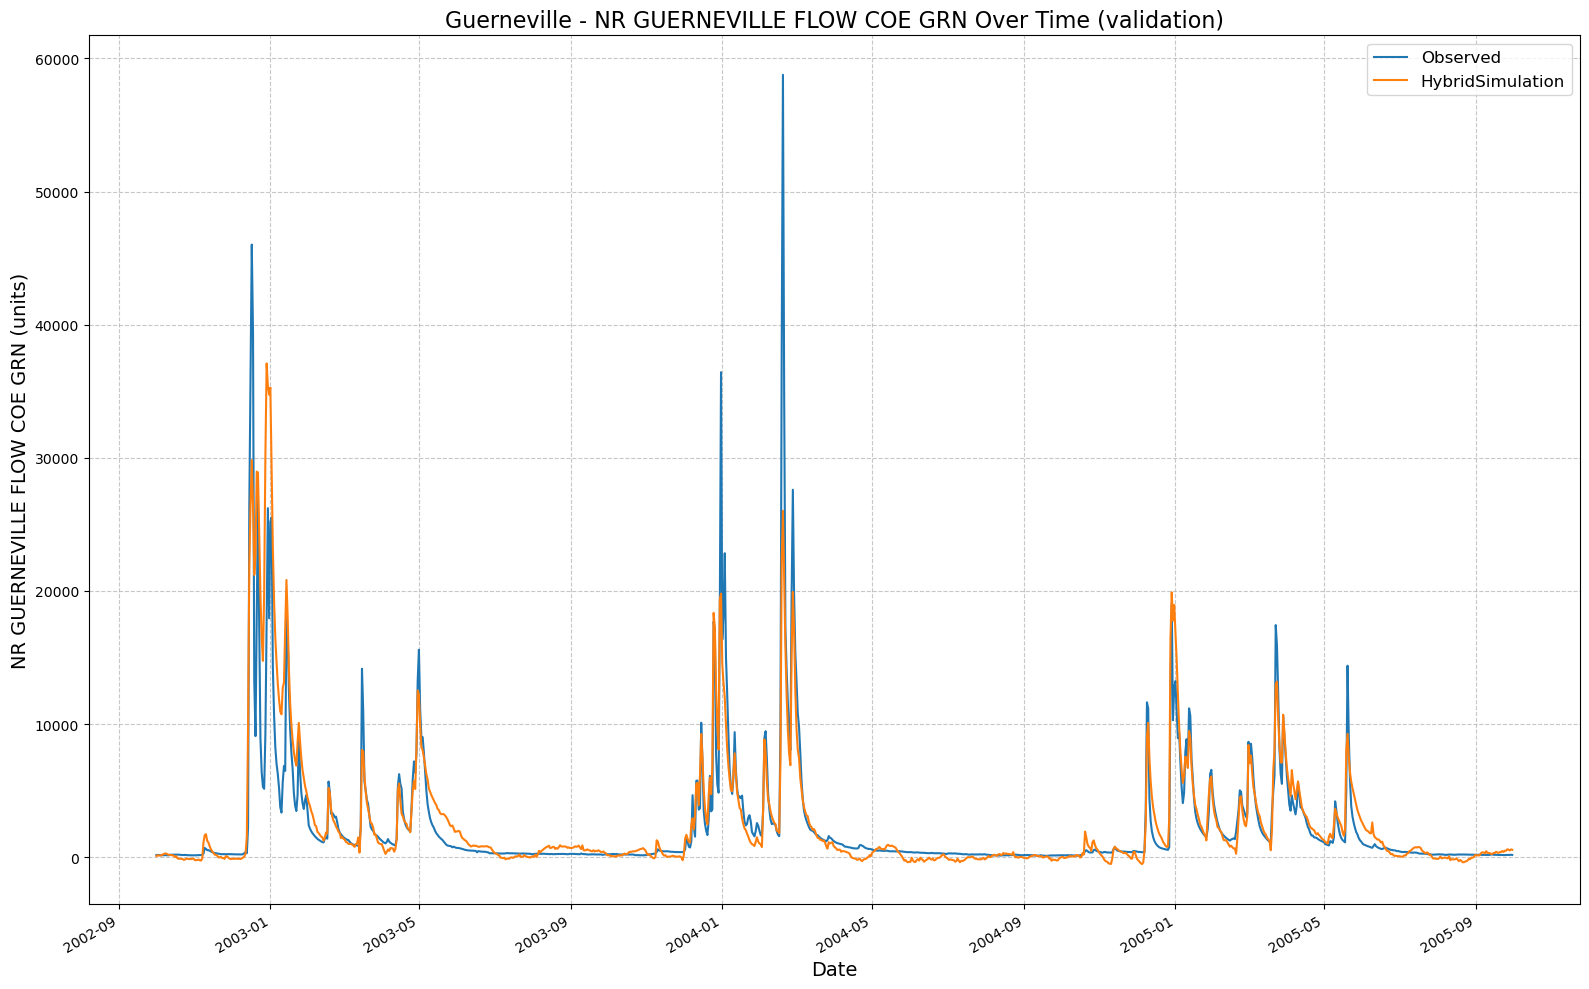

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221310/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 2, 'epochs': 16, 'output_dropout': 0.4, 'save_weights_every': 16}
2025-02-12 22:15:16,874: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221516/output.log initialized.
2025-02-12 22:15:16,874: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221516
2025-02-12 22:15:16,874: ### Run configurations for testing_run
2025-02-12 22:15:16,875: experiment_name: testing_run
2025-02-12 22:15:16,875: train_basin_file: guerneville
2025-02-12 22:15:16,875: validation_basin_file: guerneville
2025-02-12 22:15:16,875: test_basin_file: guerneville
2025-02-12 22:15:16,876: train_start_date: 1994-10-01 00:00:00
2025-02-12 22:15:16,876: train_end

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.46it/s]
2025-02-12 22:15:17,191: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 717.96it/s]
2025-02-12 22:15:17,206: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:03<00:00,  2.93it/s, Loss: 0.0000]
2025-02-12 22:15:21,241: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:03<00:00,  2.90it/s, Loss: 0.0000]
2025-02-12 22:15:25,031: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:03<00:00,  2.84it/s, Loss: 0.0000]
2025-02-12 22:15:28,902: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:03<00:00,  3.09it/s, Loss: 0.0000]
2025-02-12 22:15:32,468: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:03<00:00,  3.04it/s, Loss: 0.0000]
2025-02-12 22:15:36,094: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.03it/s]
2025-02-12 22:16:20,354: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221516/validation/model_epoch016/validation_metrics.csv
2025-02-12 22:16:20,355: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221516/validation/model_epoch016/validation_results.p
got predictions


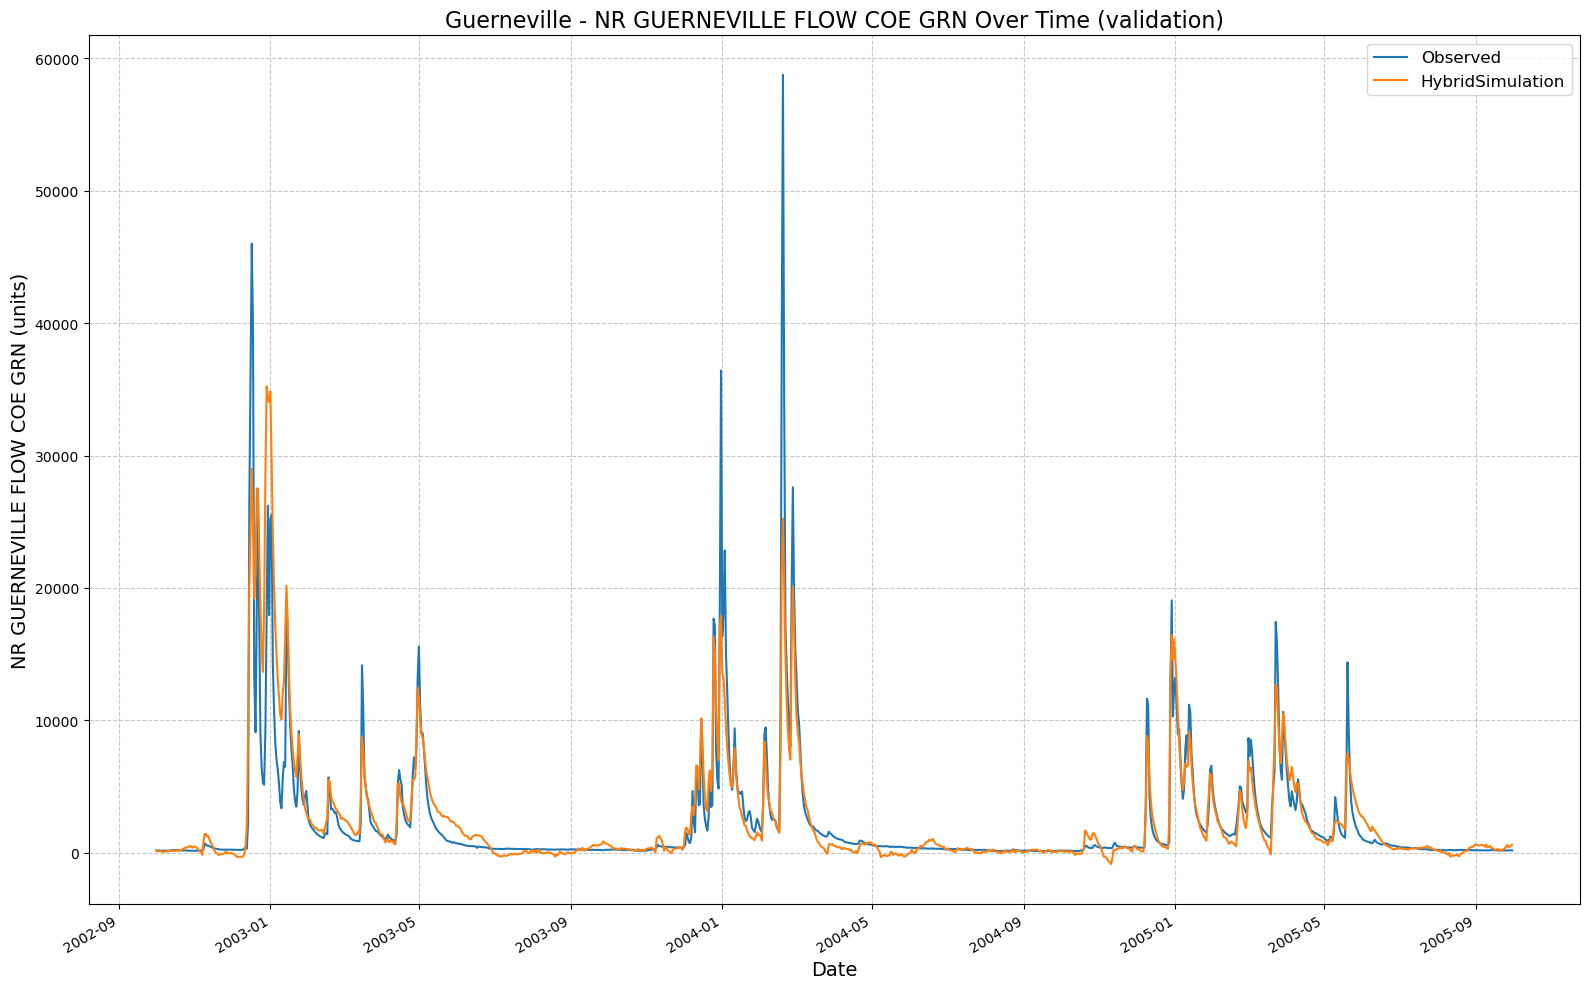

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221516/results_output_validation.csv
Physics: {'hidden_size': 256, 'seq_length': 180, 'num_layers': 2, 'epochs': 32, 'output_dropout': 0.4, 'save_weights_every': 32}
2025-02-12 22:16:20,598: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221620/output.log initialized.
2025-02-12 22:16:20,599: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221620
2025-02-12 22:16:20,599: ### Run configurations for testing_run
2025-02-12 22:16:20,599: experiment_name: testing_run
2025-02-12 22:16:20,600: train_basin_file: guerneville
2025-02-12 22:16:20,600: validation_basin_file: guerneville
2025-02-12 22:16:20,600: test_basin_file: guerneville
2025-02-12 22:16:20,601: train_start_date: 1994-10-01 00:00:00
2025-02-12 22:16:20,601: train_end

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


100%|██████████| 1/1 [00:00<00:00,  3.54it/s]
2025-02-12 22:16:20,916: Calculating target variable stds per basin
100%|██████████| 1/1 [00:00<00:00, 615.45it/s]
2025-02-12 22:16:20,931: Create lookup table and convert to pytorch tensor
# Epoch 1: 100%|██████████| 11/11 [00:03<00:00,  2.80it/s, Loss: 0.0000]
2025-02-12 22:16:25,094: Epoch 1 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 2: 100%|██████████| 11/11 [00:03<00:00,  2.91it/s, Loss: 0.0000]
2025-02-12 22:16:28,876: Epoch 2 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 3: 100%|██████████| 11/11 [00:03<00:00,  3.05it/s, Loss: 0.0000]
2025-02-12 22:16:32,483: Epoch 3 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 4: 100%|██████████| 11/11 [00:03<00:00,  3.08it/s, Loss: 0.0000]
2025-02-12 22:16:36,058: Epoch 4 average loss: avg_loss: 0.00000, avg_total_loss: 0.00000
# Epoch 5: 100%|██████████| 11/11 [00:03<00:00,  2.97it/s, Loss: 0.0000]
2025-02-12 22:16:39,770: Epoch 5 averag

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.04it/s]
2025-02-12 22:18:24,071: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221620/validation/model_epoch032/validation_metrics.csv
2025-02-12 22:18:24,071: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221620/validation/model_epoch032/validation_results.p
got predictions


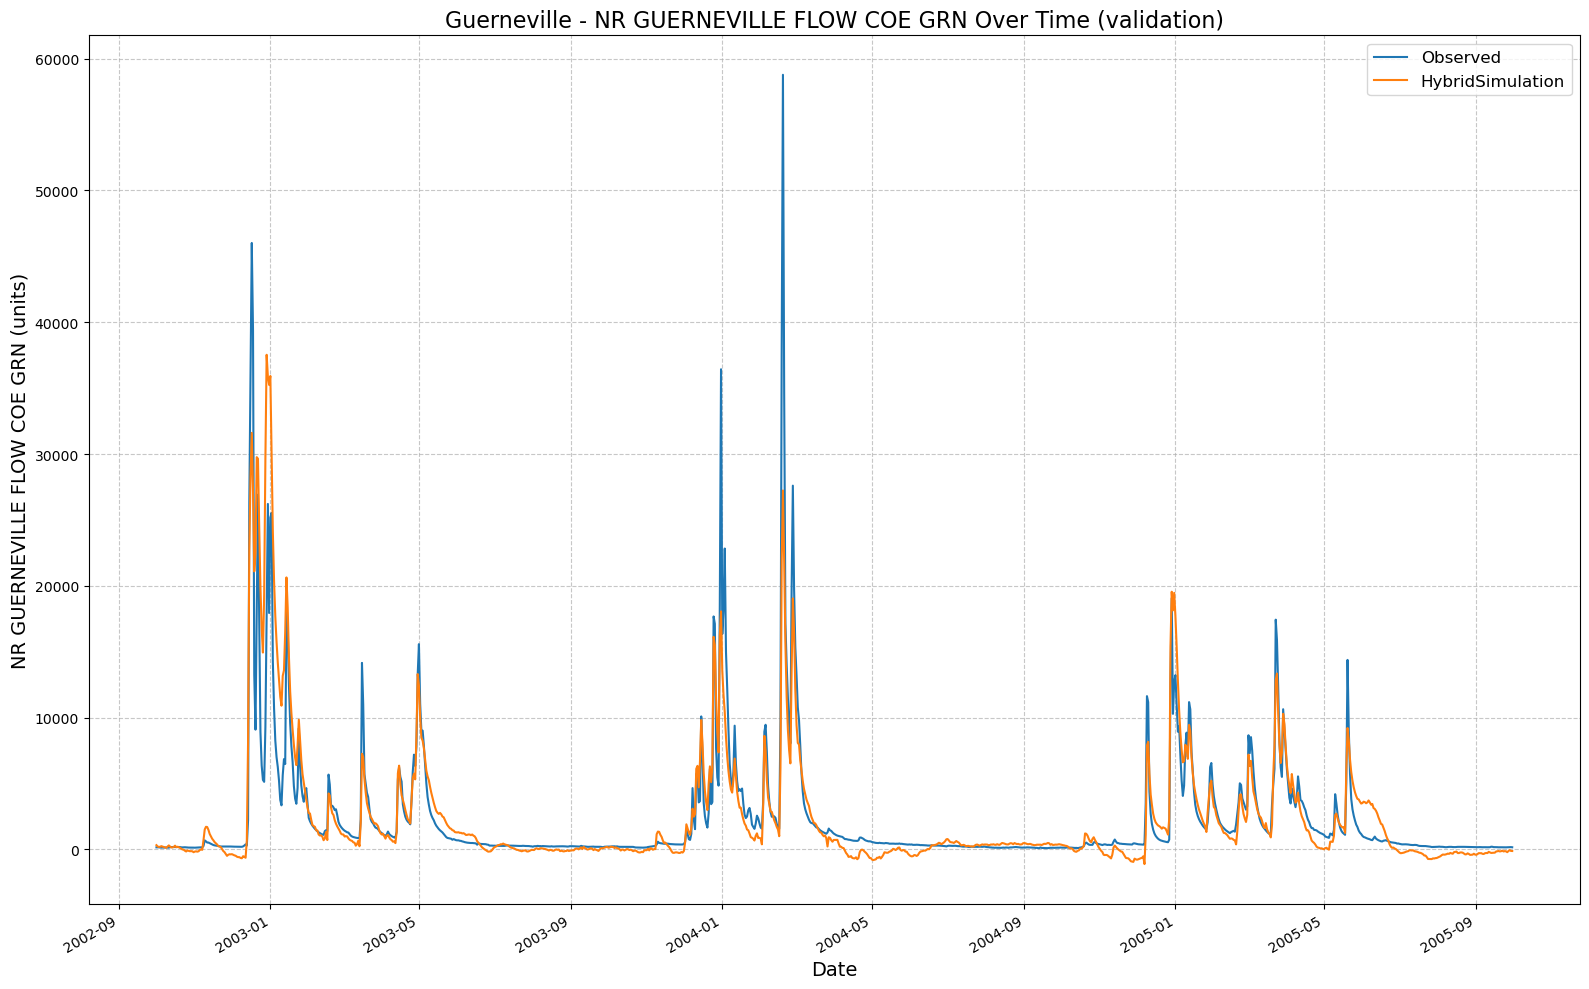

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_221620/results_output_validation.csv


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


In [9]:
if run_gridsearch or not os.path.exists(hyperparam_csv_file):
    for (hs, seq, nl, ep) in itertools.product(
            hyperparam_space["hidden_size"],
            hyperparam_space["seq_length"],
            hyperparam_space["num_layers"],
            hyperparam_space["epochs"]
    ):
        hp = {
            "hidden_size": hs,
            "seq_length": seq,
            "num_layers": nl,
            "epochs": ep,
            "output_dropout": fixed_dropout,
        }
        print(f"Physics: {hp}")
        trainer = UCB_trainer(
            path_to_csv_folder=path_to_csv,
            yaml_path=path_to_yaml,
            hyperparams=hp,
            input_features=features_with_physics,
            physics_informed=True,
            physics_data_file=path_to_physics_data,
            hourly=True,
            extend_train_period=False,
            gpu=-1
        )
        trainer.train()
        csv_path, metrics_dict = trainer.results()
        row_data = {"hidden_size": hs, "seq_length": seq, "num_layers": nl, "epochs": ep, "output_dropout": fixed_dropout}
        for k, v in metrics_dict.items():
            row_data[k] = v
        physics_results.append(row_data)
    df_physics = pd.DataFrame(physics_results)
    df_physics.sort_values(by="NSE", ascending=False, inplace=True)
    df_physics.reset_index(drop=True, inplace=True)
    best_no_phys = df_no_physics.iloc[0].to_dict()
    best_phys = df_physics.iloc[0].to_dict()
    best_no_phys["model_type"] = "no_physics"
    best_phys["model_type"] = "physics"
    best_params_df = pd.DataFrame([best_no_phys, best_phys])
    best_params_df.to_csv(hyperparam_csv_file, index=False)
else:
    print("Skipping Grid-Search")

In [12]:
if os.path.exists(hyperparam_csv_file):
    best_params_df = pd.read_csv(hyperparam_csv_file)
    best_no_phys = best_params_df.query("model_type == 'no_physics'").iloc[0].to_dict()
    best_phys = best_params_df.query("model_type == 'physics'").iloc[0].to_dict()

    best_no_physics_params = {
        "epochs": int(best_no_phys["epochs"]),
        "hidden_size": int(best_no_phys["hidden_size"]),
        "seq_length": int(best_no_phys["seq_length"]),
        "num_layers": int(best_no_phys["num_layers"]),
        "output_dropout": float(best_no_phys["output_dropout"]),
    }

    best_physics_params = {
        "epochs": int(best_phys["epochs"]),
        "hidden_size": int(best_phys["hidden_size"]),
        "seq_length": int(best_phys["seq_length"]),
        "num_layers": int(best_phys["num_layers"]),
        "output_dropout": float(best_phys["output_dropout"]),
    }

hidden_size  seq_length  num_layers  epochs  output_dropout       NSE  \
0           128          90           2      32             0.4  0.790140   
1           128          90           2      16             0.4  0.779083   
2           128          90           1      16             0.4  0.775918   
3           256          90           1      32             0.4  0.770408   
4           256         180           2      16             0.4  0.768694   
5           128         180           2      16             0.4  0.767918   
6           128         180           2      32             0.4  0.766528   
7           128         180           1      16             0.4  0.764671   
8           256          90           2      16             0.4  0.761357   
9           128         180           1      32             0.4  0.760360   
10          256         180           1      32             0.4  0.758710   
11          128          90           1      32             0.4  0.756410   
12          256          90           2      32             0.4  0.755035   
13          256         180           2      32             0.4  0.747334   
14          256          90           1      16             0.4  0.742400   
15          256         180           1      16             0.4  0.724905   

          MSE         RMSE       KGE  Alpha-NSE  Beta-KGE  Beta-NSE  \
0   5195225.5  2279.303731  0.870140   0.958150  1.058381  0.028178   
1   5468946.5  2338.577880  0.844995   0.999107  0.889941 -0.053121   
2   5547300.5  2355.270791  0.881948   0.993198  1.034661  0.016729   
3   5683695.0  2384.050125  0.876487   1.060525  1.015883  0.007666   
4   5726140.5  2392.935540  0.861163   0.939571  1.031248  0.015082   
5   5745350.5  2396.946078  0.853285   0.923563  0.973496 -0.012792   
6   5779761.0  2404.113350  0.842573   0.912241  1.042736  0.020627   
7   5825730.5  2413.655008  0.842117   0.906836  0.974473 -0.012321   
8   5907757.0  2430.587789  0.773640   1.088322  1.181455  0.087580   
9   5932457.5  2435.663667  0.848857   0.918482  0.989281 -0.005174   
10  5973296.0  2444.032733  0.859435   0.985539  1.068748  0.033182   
11  6030236.5  2455.653986  0.879146   1.012862  1.000424  0.000205   
12  6064274.5  2462.574770  0.838489   1.101861  1.066925  0.032302   
13  6254905.0  2500.980808  0.873372   0.998950  0.993557 -0.003110   
14  6377061.0  2525.284340  0.862504   0.984241  1.040186  0.019396   
15  6810163.0  2609.628901  0.860419   0.991612  1.013700  0.006613   

    Pearson-r        FHV         FMS          FLV  Peak-Timing  Peak-MAPE  
0    0.891815  -3.350712   -0.217381 -1435.141650          0.2  25.997207  
1    0.890855  -4.751934  767.659255    99.999999          0.4  39.046919  
2    0.887356  -2.589383   19.586655  -696.270316          0.2  29.209626  
3    0.893511   6.624518   16.745597  -884.601751          0.2  22.760313  
4    0.878973  -8.715609    8.227881 -1720.850282          0.2  35.888362  
5    0.877607 -10.881188   14.679988  -964.117098          0.2  39.062917  
6    0.876488 -13.234237   -7.371123 -1958.168940          0.2  30.356436  
7    0.875116 -15.054969   60.134570  -273.295362          0.2  41.793637  
8    0.897470   8.532201  -10.275249 -1567.310246          0.2  20.676742  
9    0.873177 -11.379017   10.631250 -1634.684862          0.2  32.934537  
10   0.878249  -5.359194   25.068592 -1094.998212          0.2  30.495317  
11   0.879833   2.229562   40.728550  -420.169108          0.0  24.866943  
12   0.894022  10.707472   17.342129 -1183.924050          0.2  27.132235  
13   0.873540  -3.444757   87.516554   -72.733396          0.2  28.710294  
14   0.869455   1.973406  -21.757990 -2415.476007          0.2  26.428165  
15   0.861347  -8.009299  775.960742    99.999999          0.2  36.861117

In [ ]:
if run_gridsearch:
    print(df_no_physics.iloc[0:4])
    df_no_physics.to_csv("guerneville_hourly_no_physics_gridsearch.csv", index=False)

In [ ]:
if run_gridsearch:
    print(df_physics.iloc[0:4])
    df_physics.to_csv("guerneville_hourly_physics_gridsearch.csv", index=False)

### Re-run validation with the best hyperparameters

In [ ]:
lstmNoPhysicsValBest = UCB_trainer(
    path_to_csv_folder=path_to_csv,
    yaml_path=path_to_yaml,
    hyperparams=best_no_physics_params,
    input_features=None,
    physics_informed=False,
    physics_data_file=None,
    hourly=True,
    extend_train_period=False,
    gpu=-1
)
lstmNoPhysicsValBest.train()
no_physics_val_csv, no_physics_val_metrics = lstmNoPhysicsValBest.results()
no_physics_val_metrics

In [ ]:
lstmPhysicsValBest = UCB_trainer(
    path_to_csv_folder=path_to_csv,
    yaml_path=path_to_yaml,
    hyperparams=best_physics_params,
    input_features=features_with_physics,
    physics_informed=True,
    physics_data_file=path_to_physics_data,
    hourly=True,
    extend_train_period=False,
    gpu=-1
)
lstmPhysicsValBest.train()
physics_val_csv, physics_val_metrics = lstmPhysicsValBest.results()
physics_val_metrics

In [ ]:
combinedPlot(
    lstm_results=no_physics_val_csv,
    lstmPhysics_results=physics_val_csv,
    HMS_results=path_to_physics_data,
    title="Guerneville Basin Hourly Model Comparison (Validation)",
    fName="guerneville_hourly_val_metrics.csv",
    plot_filename="guerneville_hourly_val_model_comparison.png"
)

In [ ]:
fancyCombinedPlot(
    lstm_results=no_physics_val_csv,
    lstmPhysics_results=physics_val_csv,
    HMS_results=path_to_physics_data,
    title='Guerneville Basin Hourly Model Comparison (Validation)',
    fName="guerneville_hourly_val_metrics.csv"
)

### Re-run testing with the best hyperparameters

2025-02-12 22:57:44,722: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_225744/output.log initialized.
2025-02-12 22:57:44,723: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_225744
2025-02-12 22:57:44,724: ### Run configurations for testing_run
2025-02-12 22:57:44,726: experiment_name: testing_run
2025-02-12 22:57:44,727: train_basin_file: guerneville
2025-02-12 22:57:44,728: validation_basin_file: guerneville
2025-02-12 22:57:44,729: test_basin_file: guerneville
2025-02-12 22:57:44,733: train_start_date: 1994-10-01 00:00:00
2025-02-12 22:57:44,733: train_end_date: 2005-09-30 00:00:00
2025-02-12 22:57:44,734: validation_start_date: 2002-10-01 00:00:00
2025-02-12 22:57:44,734: validation_end_date: 2005-09-30 00:00:00
2025-02-12 22:57:44,735: test_start_date: 2005-10-01 00:00:00
2025-02-12 22:57:44,736: test_end_date: 2009-09-29 00:00:00
2025-02-

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]
2025-02-12 22:59:40,852: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_225744/validation/model_epoch032/validation_metrics.csv
2025-02-12 22:59:40,853: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_225744/validation/model_epoch032/validation_results.p
2025-02-12 22:59:40,870: Using the model weights from /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_225744/model_epoch032.pt


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]
2025-02-12 22:59:41,618: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_225744/test/model_epoch032/test_metrics.csv
2025-02-12 22:59:41,618: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_225744/test/model_epoch032/test_results.p
got predictions


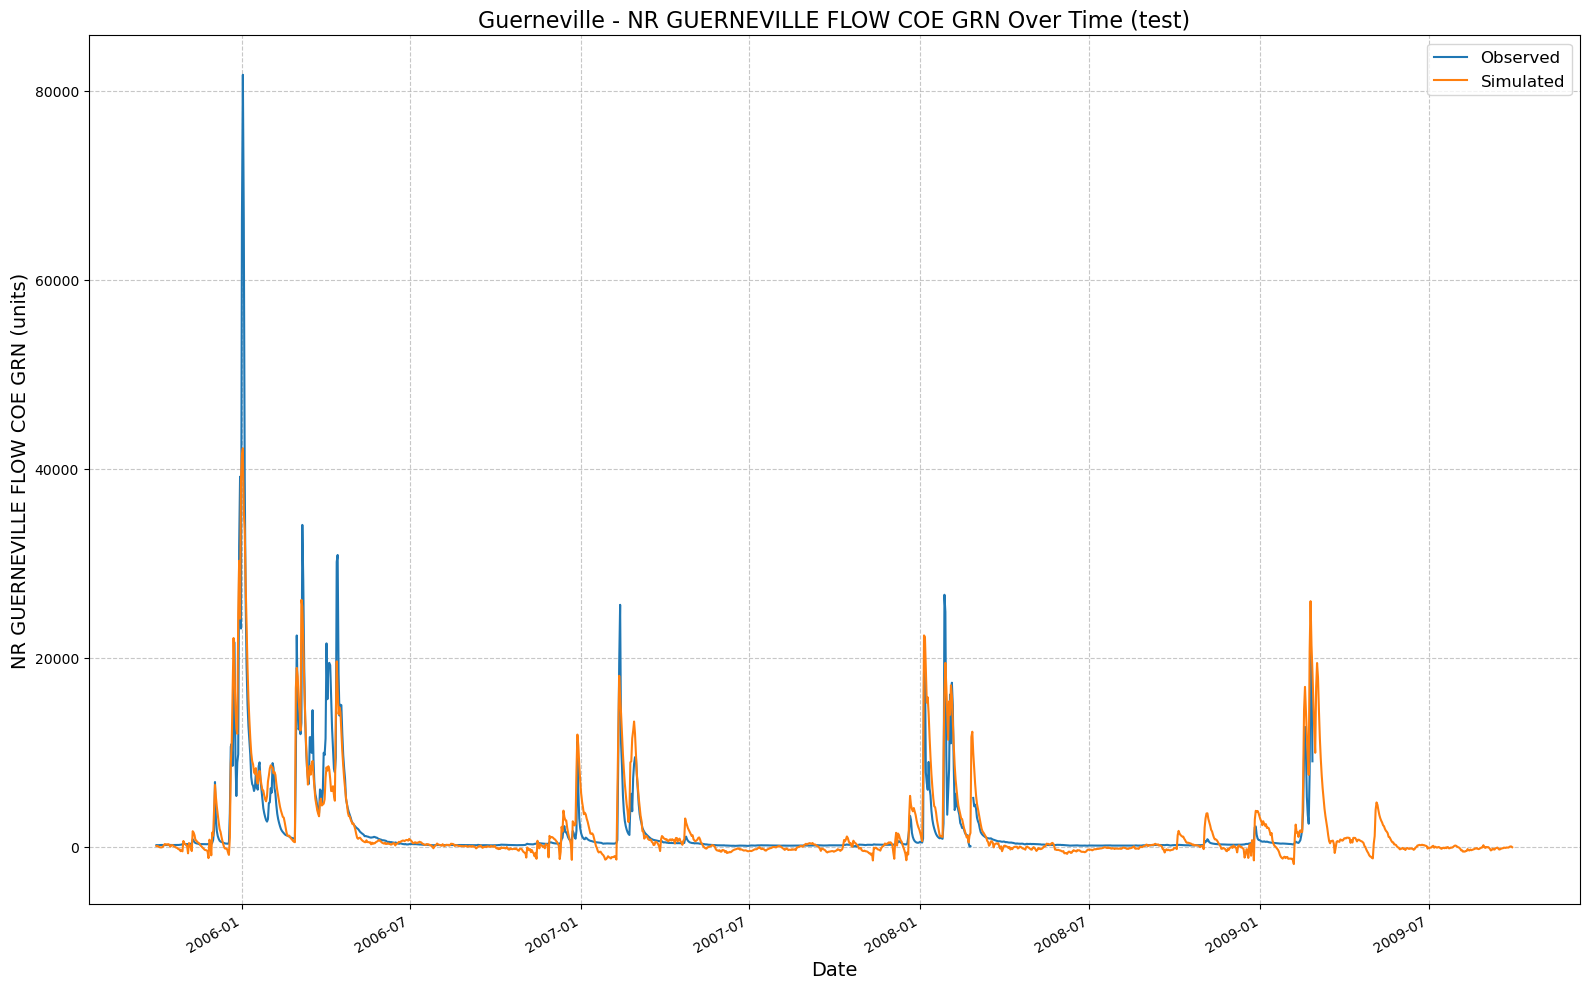

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_225744/results_output_test.csv


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


{'NSE': 0.7762186527252197,
 'MSE': 6888374.5,
 'RMSE': 2624.571298326643,
 'KGE': 0.8343917867269092,
 'Alpha-NSE': 0.8864046582456191,
 'Beta-KGE': 1.0194697380065918,
 'Beta-NSE': 0.0068148589037277775,
 'Pearson-r': 0.8810752004955837,
 'FHV': -17.117127776145935,
 'FMS': 971.5706170527806,
 'FLV': 99.99999998545248,
 'Peak-Timing': 0.75,
 'Peak-MAPE': 39.573872089385986}

In [14]:
lstmNoPhysicsExtBest = UCB_trainer(
    path_to_csv_folder=path_to_csv,
    yaml_path=path_to_yaml,
    hyperparams=best_no_physics_params,
    input_features=None,
    physics_informed=False,
    physics_data_file=None,
    hourly=True,
    extend_train_period=True,  
    gpu=-1
)

lstmNoPhysicsExtBest.train()
no_physics_test_csv, no_physics_test_metrics = lstmNoPhysicsExtBest.results('test')
no_physics_test_metrics

2025-02-12 22:59:41,848: Logging to /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_225941/output.log initialized.
2025-02-12 22:59:41,849: ### Folder structure created at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_225941
2025-02-12 22:59:41,849: ### Run configurations for testing_run
2025-02-12 22:59:41,850: experiment_name: testing_run
2025-02-12 22:59:41,850: train_basin_file: guerneville
2025-02-12 22:59:41,850: validation_basin_file: guerneville
2025-02-12 22:59:41,851: test_basin_file: guerneville
2025-02-12 22:59:41,851: train_start_date: 1994-10-01 00:00:00
2025-02-12 22:59:41,852: train_end_date: 2005-09-30 00:00:00
2025-02-12 22:59:41,852: validation_start_date: 2002-10-01 00:00:00
2025-02-12 22:59:41,852: validation_end_date: 2005-09-30 00:00:00
2025-02-12 22:59:41,853: test_start_date: 2005-10-01 00:00:00
2025-02-12 22:59:41,853: test_end_date: 2009-09-29 00:00:00
2025-02-

/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Validation: 100%|██████████| 1/1 [00:00<00:00,  1.76it/s]
2025-02-12 23:00:44,492: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_225941/validation/model_epoch032/validation_metrics.csv
2025-02-12 23:00:44,493: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_225941/validation/model_epoch032/validation_results.p
2025-02-12 23:00:44,533: Using the model weights from /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_225941/model_epoch032.pt


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/evaluation/tester.py:133: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experi

# Evaluation: 100%|██████████| 1/1 [00:00<00:00,  1.37it/s]
2025-02-12 23:00:45,265: Stored metrics at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_225941/test/model_epoch032/test_metrics.csv
2025-02-12 23:00:45,266: Stored results at /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_225941/test/model_epoch032/test_results.p
got predictions


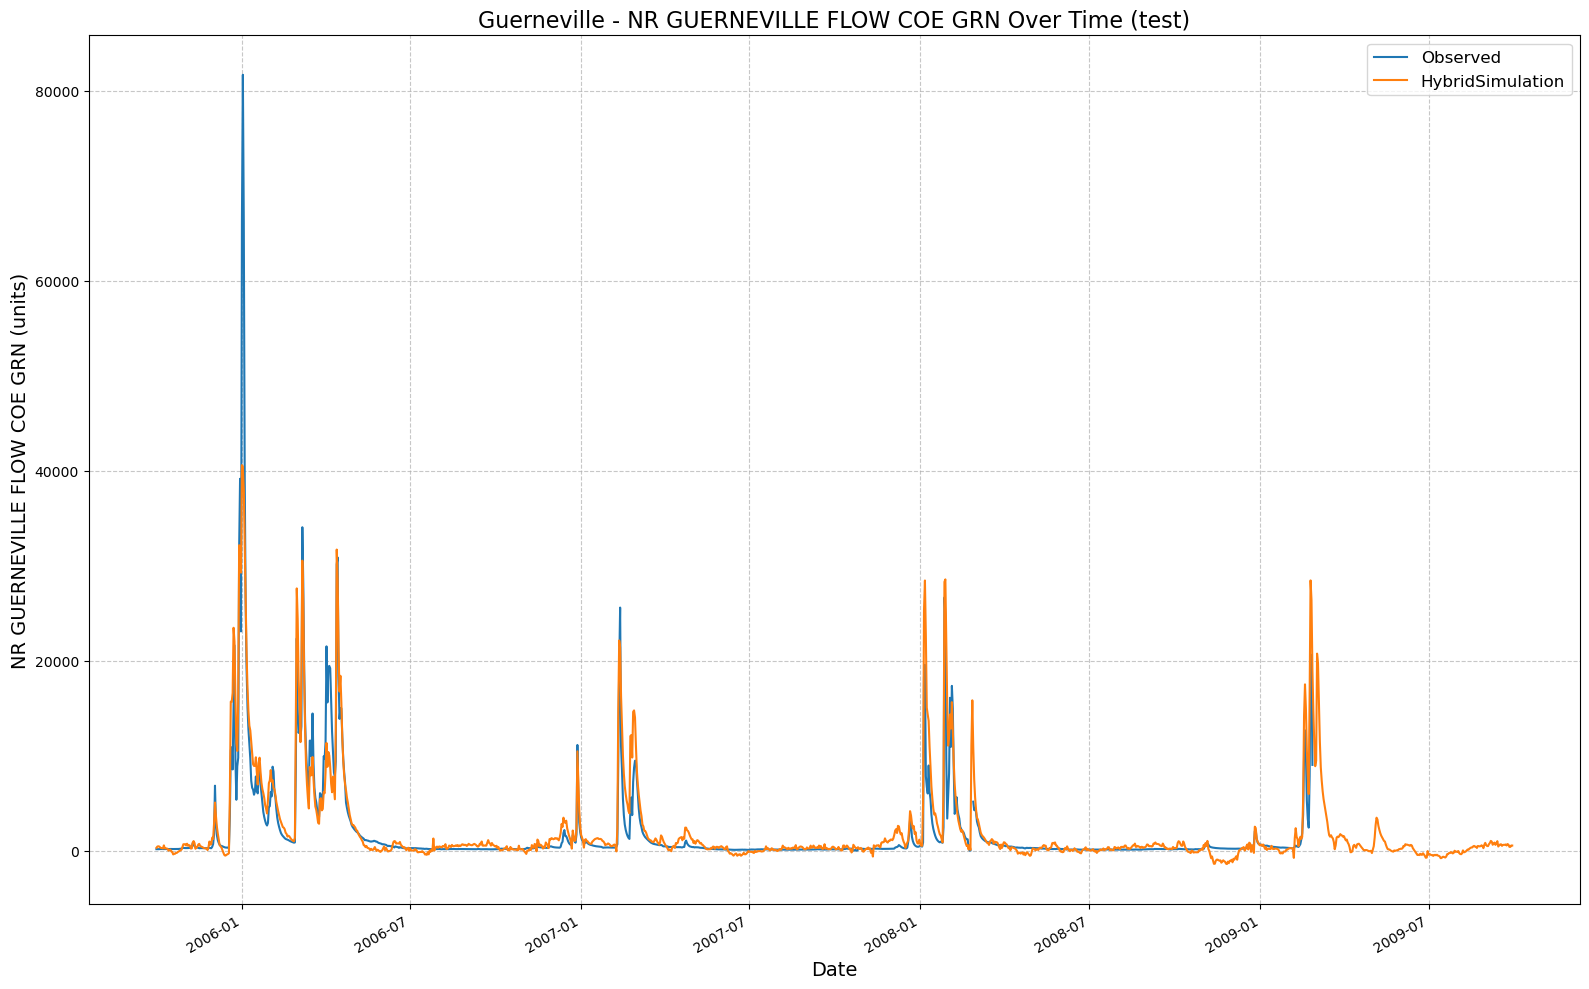

[INFO] CSV output saved at: /Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/runs/testing_run_1202_225941/results_output_test.csv


/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:339: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  offset_one = to_offset(freq_one)
/Users/canruso/Desktop/UCB-USACE-LSTMs/UCB_training/models/guerneville_all/../../../../UCB-USACE-LSTMs/neuralhydrology/datautils/utils.py:382: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  factor = pd.to_timedelta(freq_one) / pd.to_timedelta(freq_two)


{'NSE': 0.8185991644859314,
 'MSE': 5583829.0,
 'RMSE': 2363.0126956916674,
 'KGE': 0.8169565867104072,
 'Alpha-NSE': 0.9288259926613375,
 'Beta-KGE': 1.1402615308761597,
 'Beta-NSE': 0.04909480793986497,
 'Pearson-r': 0.9063738562989118,
 'FHV': -7.672911882400513,
 'FMS': 14.246724113995453,
 'FLV': 51.6185260410173,
 'Peak-Timing': 1.0,
 'Peak-MAPE': 23.63119125366211}

In [15]:
lstmPhysicsExtBest = UCB_trainer(
    path_to_csv_folder=path_to_csv,
    yaml_path=path_to_yaml,
    hyperparams=best_physics_params,
    input_features=features_with_physics,
    physics_informed=True,
    physics_data_file=path_to_physics_data,
    hourly=True,
    extend_train_period=True,
    gpu=-1
)

lstmPhysicsExtBest.train()
physics_test_csv, physics_test_metrics = lstmPhysicsExtBest.results('test')
physics_test_metrics

In [ ]:
combinedPlot(
    lstm_results=no_physics_test_csv,
    lstmPhysics_results=physics_test_csv,
    HMS_results=path_to_physics_data,
    title="Guerneville Basin Hourly Model Comparison",
    fName="guerneville_hourly_metrics.csv",
    plot_filename="guerneville_hourly_model_comparison.png"
)

In [ ]:
fancyCombinedPlot(lstm_results=no_physics_test_csv, lstmPhysics_results= physics_test_csv, HMS_results=path_to_physics_data, title='Guerneville Basin Hourly Model Comparison', fName = "guerneville_hourly_metrics.csv")